# Kaggle DS and ML Survey 2020

In [1]:
%%HTML
<style type="text/css">

div.h2 {
    background-color: firebrick; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;
}

</style>

![](https://www.gammanalytics.com/assets/img/services/DataScience.png)

Image: https://www.gammanalytics.com

In [2]:
%%HTML
<style type="text/css">

div.h3 {
    background-color: dodgerblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 20px; 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;
}

</style>

<div class=h2>Overview</div>

This year, 20,036 Kaggle users told us how they learn and level up, which tools they’re using, and what they recommend. The results include raw numbers about who is working with data, what’s happening with machine learning in different industries, and the best ways for new data scientists to break into the field.

<div class=h2>Key Results</div>

### Here are a few of the top takeaways from this year’s results.

* Python, the fastest-growing major programming language, is the most used programming language on the survey, followed by SQL, which is standing as the second most used language.
* The overwhelming majority of respondents are still men, although this situation is slowly changing.
* Around half of respondents reside in Asia. This fact makes Asia the continent with the highest number of Kaggle users.
* The most prevailing occupation role is student and the most common degrees respondents have are master's and bachelor's degrees.
* India is on top of the countries on the survey, followed by the USA, while countries like Ghana and Ireland are among the ones that have the lowest number of respondents.
* When thinking about work experience, we can see that more than half of respondents have experience of less than 5 years.
* Respondents were asked about their age. The data indicates that Kaggle users are mostly people in the age from 18 to 30.

In [3]:
pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 3.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.3.1
    Uninstalling pip-20.3.1:
      Successfully uninstalled pip-20.3.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn --upgrade

     |████████████████████████████████| 285 kB 3.0 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install pycountry_convert

     |████████████████████████████████| 242 kB 3.1 MB/s 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Seaborn version', sns.__version__)
import os
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import pycountry
import pycountry_convert as pc
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
import textwrap

Seaborn version 0.11.1


In [7]:
data = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
data.head()

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                1838                        35-39   
2                              289287                        30-34   
3                                 860                        35-39   
4                                 507                        30-34   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                   Colombia   
2                   United States of America   
3                                  Argentina   
4                   United States of America   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Doctoral degree   
2                                    Master’s degree   
3                                  Bachelor’s degree   
4                                    Master’s degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                            Student   
2                                      Data Engineer   
3                                  Software Engineer   
4                                     Data Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                         5-10 years   
3                                        10-20 years   
4                                         5-10 years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                             Python   
3                                                NaN   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                  R   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  ...  \
0  What programming languages do you use on a reg...  ...   
1                                                SQL  ...   
2                                                SQL  ...   
3                                                NaN  ...   
4                                                SQL  ...   

                                        Q35_B_Part_2  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_3  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_4  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4              

In [8]:
questions = data.iloc[0, :].T
data = data.iloc[1:, :]

<div class=h2>Kagglers Profile</div>

### What we know about Kaggle users

In [9]:
data['Time from Start to Finish (seconds)'].median()/60

10.433333333333334

<div class=h2>Geography</div>

In [10]:
Map=data.Q3.value_counts().to_frame()
def alpha3code(column):
    CODE=[]
    for country in column:
      if country !='Other': 
        try:
            code=pycountry.countries.search_fuzzy(country)[0].alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
      else:
        CODE.append('Other')
    return CODE
# create a column for code 
Map['CODE']=alpha3code(Map.index)
Map.head()

Q3   CODE
India                     5851    IND
United States of America  2237    USA
Other                     1388  Other
Brazil                     694    BRA
Japan                      638    JPN

In [11]:
import geopandas
from geopandas import GeoDataFrame
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(Map,world, how='right', on='CODE')
# merge['Q3'] = merge['Q3'].fillna(0)
merge = GeoDataFrame(merge).sort_values(by='Q3',ascending=False)
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').reset_index()
merge.head()

index      Q3 CODE     pop_est      continent                      name  \
0      0  5851.0  IND  1281935911           Asia                     India   
1      1  2237.0  USA   326625791  North America  United States of America   
2      2   694.0  BRA   207353391  South America                    Brazil   
3      3   638.0  JPN   126451398           Asia                     Japan   
4      4   582.0  RUS   142257519         Europe                    Russia   

   gdp_md_est                                           geometry   latitude  \
0   8721000.0  POLYGON ((97.327 28.262, 97.403 27.883, 97.052...  20.593684   
1  18560000.0  MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...  37.090240   
2   3081000.0  POLYGON ((-53.374 -33.768, -53.651 -33.202, -5... -14.235004   
3   4932000.0  MULTIPOLYGON (((141.885 39.181, 140.959 38.174...  36.204824   
4   3745000.0  MULTIPOLYGON (((178.725 71.099, 180.000 71.516...  61.524010   

    longitude  
0   78.962880  
1  -95.712891  
2  -51.925280  
3  138.252924  
4  105.318756

In [12]:
x=pd.array(merge[merge.name=="Egypt"].latitude)[0]
merge['latitude'] = merge['latitude'].replace( x,26.8357675)
merge['longitude'] = merge['longitude'].replace([-78.183406],30.7956597)

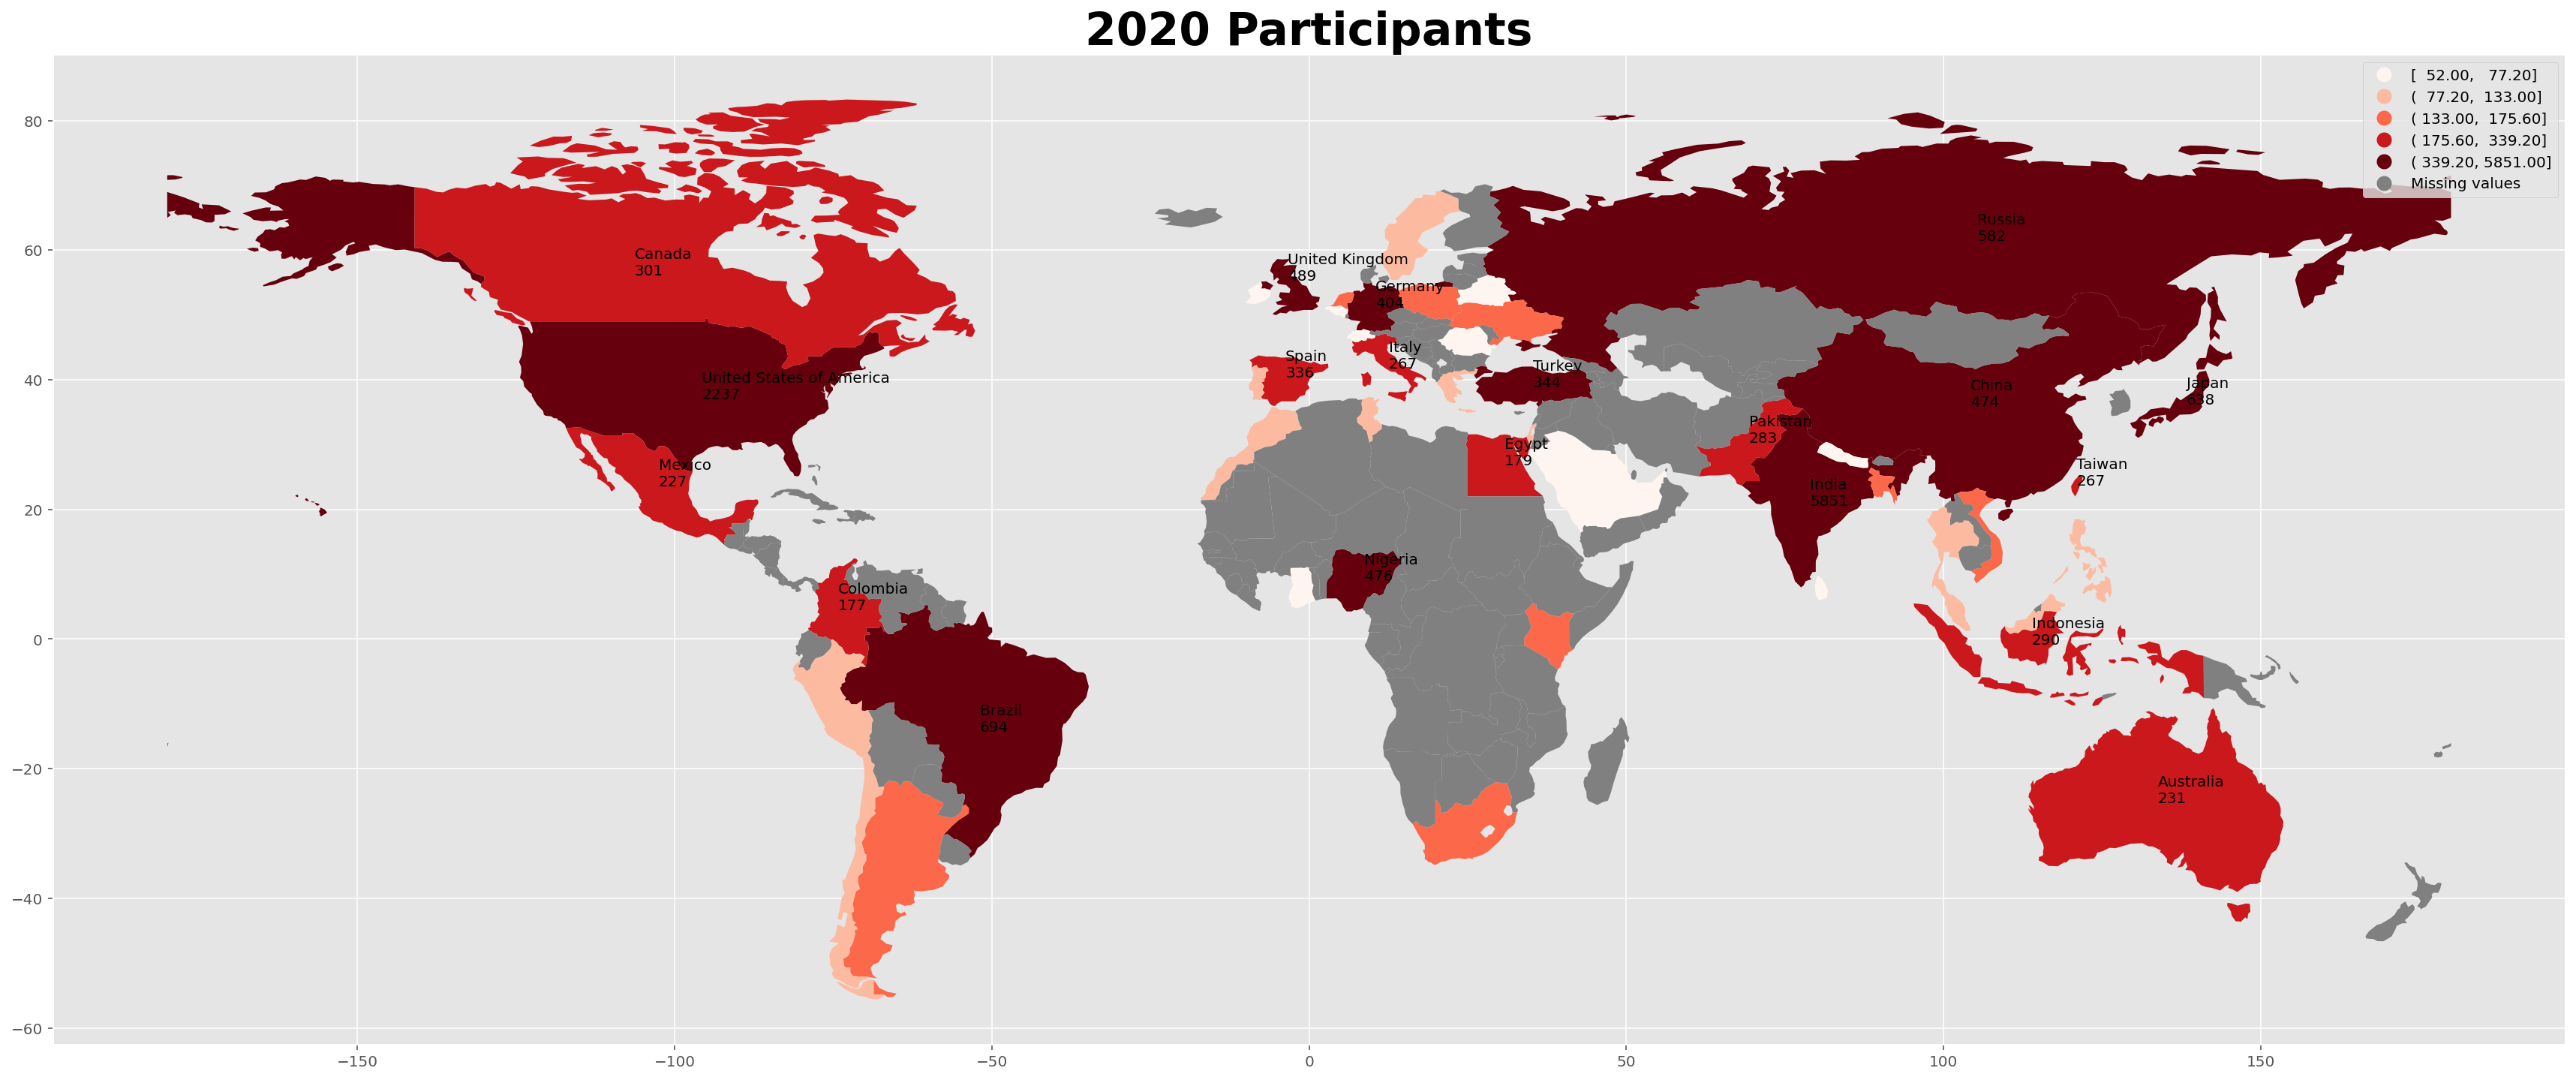

In [13]:
merge.plot(column='Q3', scheme="quantiles",
           figsize=(30, 25), cmap='Reds',
           legend=True, missing_kwds={'color': 'grey',
           "hatch": "",
           "label": "Missing values"} )
plt.title('2020 Participants',fontsize=30, weight='bold')
# add countries names and numbers 
for i in range(0,20):
    plt.text(float(merge.longitude[i]), float(merge.latitude[i]),
             "{}\n{}".format(merge.name[i], int(merge.Q3[i])), size=10)

The median time spent on the survey for qualified responses was 10.43 minutes. Unfortunately, the survey data contains missing values. This unanticipated limitation should be kept in mind when interpreting survey results.

In [14]:
data['Q3'].replace({'United States of America':
                   'USA', 'Viet Nam': 'Vietnam',
                   'United Kingdom of Great Britain and Northern Ireland': 'UK',
                   'Iran, Islamic Republic of...': 'Iran'}, inplace=True)

In [15]:
data['Q3'].unique()

array(['Colombia', 'USA', 'Argentina', 'Japan', 'India', 'Brazil',
       'China', 'Germany', 'Indonesia', 'Canada', 'Switzerland', 'Other',
       'Singapore', 'Russia', 'South Africa', 'Egypt', 'Netherlands',
       'Pakistan', 'Nepal', 'South Korea', 'Poland', 'Belarus', 'Tunisia',
       'Ukraine', 'Belgium', 'Saudi Arabia', 'Taiwan', 'Nigeria', 'Italy',
       'Spain', 'United Arab Emirates', 'Mexico', 'Vietnam', 'Thailand',
       'UK', 'France', 'Ghana', 'Ireland', 'Philippines', 'Morocco',
       'Turkey', 'Iran', 'Peru', 'Romania', 'Republic of Korea',
       'Australia', 'Chile', 'Kenya', 'Sweden', 'Bangladesh', 'Greece',
       'Malaysia', 'Portugal', 'Israel', 'Sri Lanka'], dtype=object)

In [16]:
data['Q3'].count()

20036

In [17]:
data['Q3'].value_counts()

India                   5851
USA                     2237
Other                   1388
Brazil                   694
Japan                    638
Russia                   582
UK                       489
Nigeria                  476
China                    474
Germany                  404
Turkey                   344
Spain                    336
France                   330
Canada                   301
Indonesia                290
Pakistan                 283
Taiwan                   267
Italy                    267
Australia                231
Mexico                   227
South Korea              190
Egypt                    179
Colombia                 177
Ukraine                  170
Iran                     162
Kenya                    153
Netherlands              151
Singapore                149
Poland                   148
Vietnam                  147
Bangladesh               143
South Africa             141
Argentina                134
Malaysia                 133
Morocco       

<div class=h3>Continents</div>

In [18]:
countries = np.asarray(data["Q3"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'
    
#Collecting Continent Information
data.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])

In [19]:
df_continents = data.groupby(["continent"]).sum()

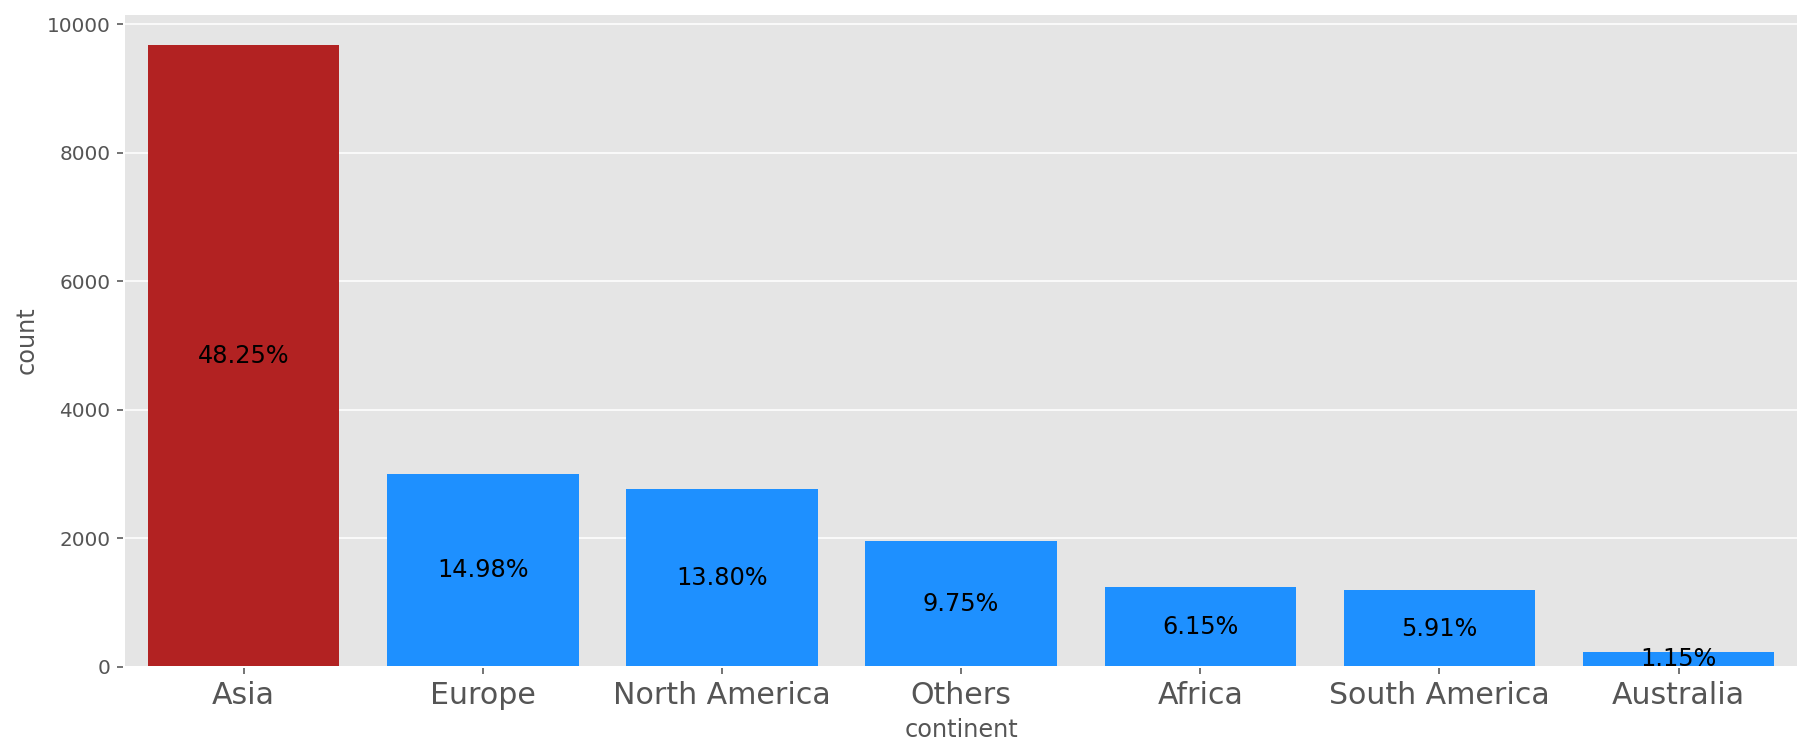

In [20]:
continents = data['continent'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,6))
color = ['dodgerblue' if (x < max(continents)) else 'firebrick' for x in continents]
ax = sns.countplot(x="continent", data=data, order=continents.index, palette=color, saturation=1)
plt.xticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data['continent'])),
                (x + width/2, y + height/2), ha='center', va='center',fontsize=12)

About 50% of respondents currently reside in Asia, and about 15% of respondents currently reside in Europe. These are the continents with the highest number of respondents.

<div class=h3>Countries</div>

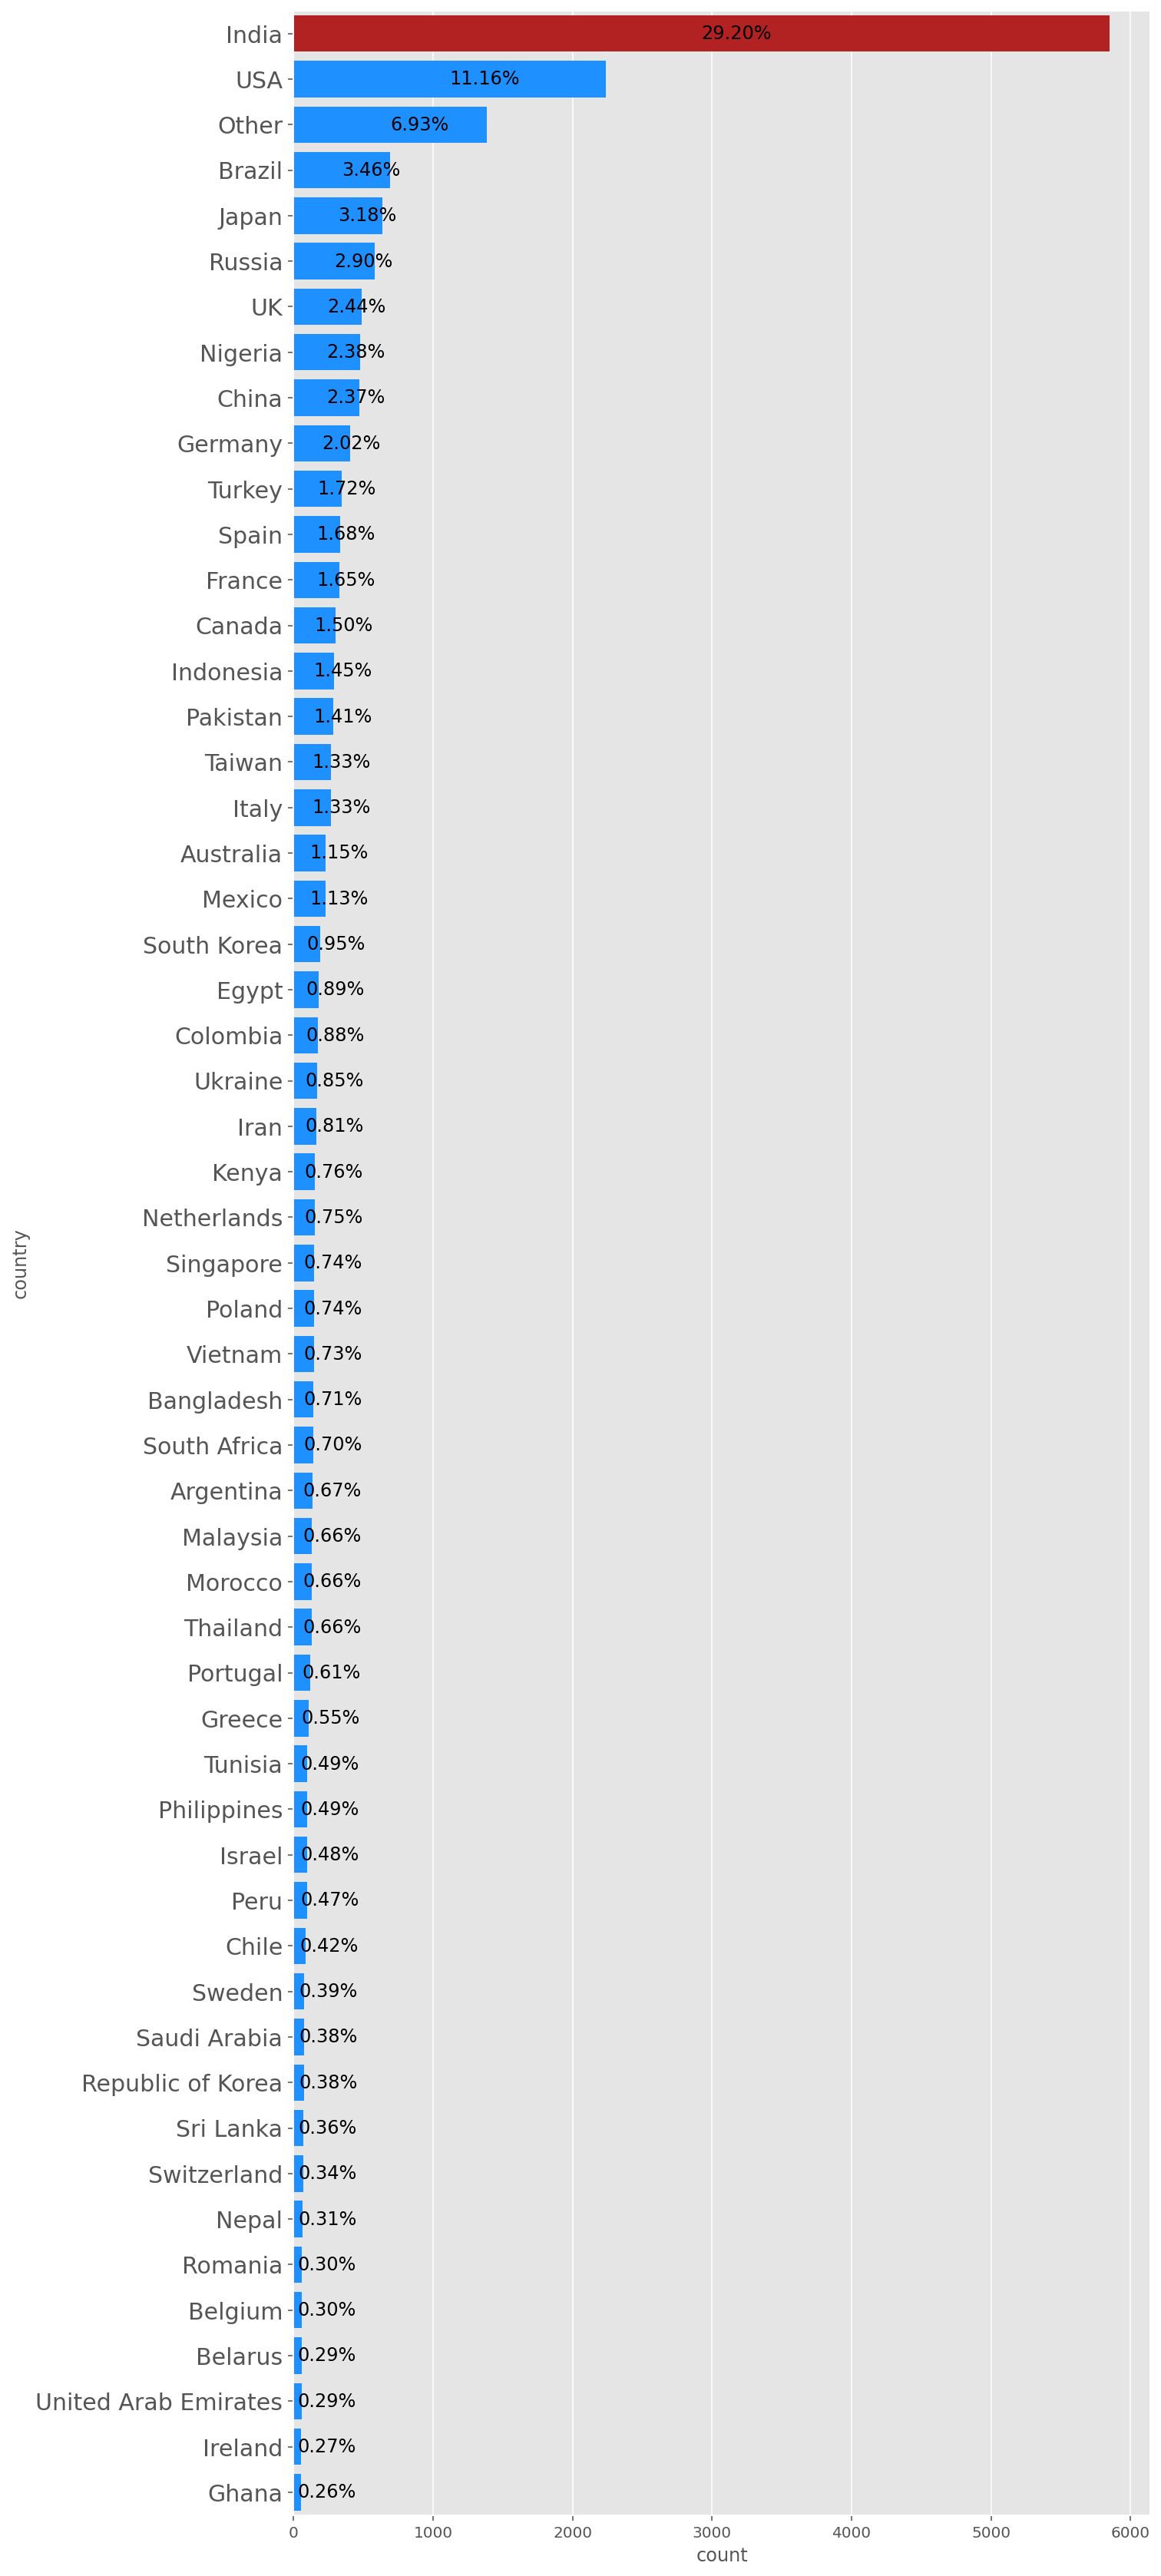

In [21]:
countries = data['Q3'].value_counts()
plt.figure(figsize=(10, 30))
color = ['dodgerblue' if (y < max(countries)) else 'firebrick' for y in countries]
ax= sns.countplot(y="Q3", data=data, order=countries.index, palette=color, saturation=1)
plt.ylabel('country')
plt.yticks(fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q3'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

More than 29% of Kagglers are from India, and more than 11% of Kagglers are from the USA. Countries like Belarus, Ireland and Ghana are the least represented among kagglers.

<div class=h2>Demographics</div>

<div class=h3>Gender</div>

In [22]:
colors = ['firebrick', 'dodgerblue', 'black', 'yellow', 'olive'] 
counts = data['Q2'].value_counts(sort=True)
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig = go.Figure(data=[pie])
py.iplot(fig)

Respondents were asked about their gender identity, and it turned out that globally about 80% of respondents are men. This year more than 19% of survey respondents are women, a little bit up from on last year's survey. This represents improvement in this area, but the continued low proportion points to problems with inclusion in the tech industry in general and on Kaggle in particular.

<div class=h3>Age</div>

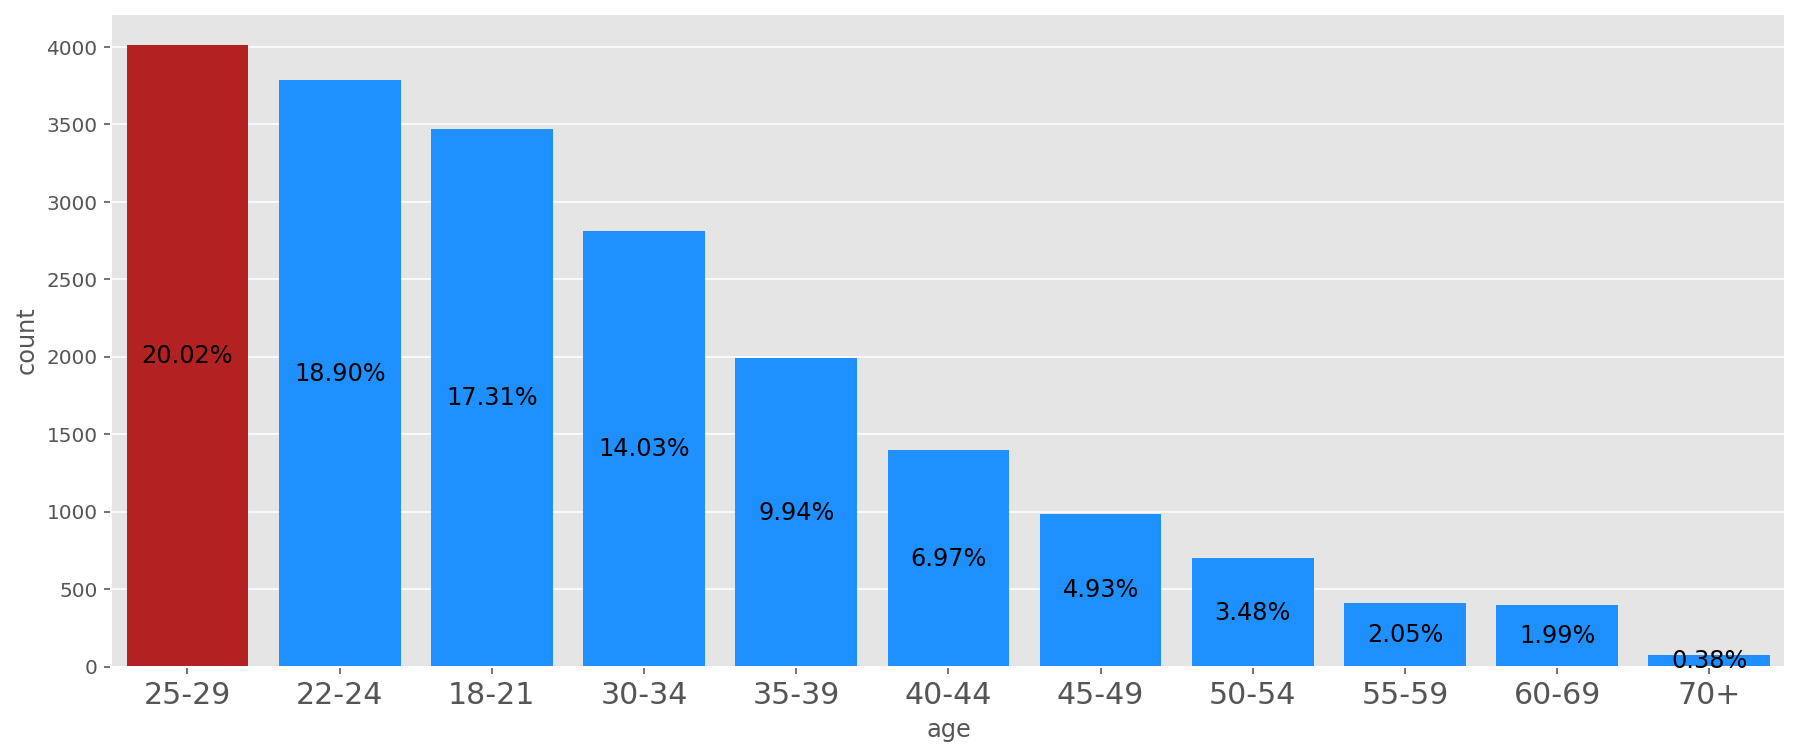

In [23]:
age = data['Q1'].value_counts()
plt.figure(figsize=(15,6))
color = ['dodgerblue' if (x < max(age)) else 'firebrick' for x in age]
ax= sns.countplot(x="Q1", data=data, order=age.index, palette=color, saturation=1)
plt.xlabel('age')
plt.xticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data['Q1'])),
                (x + width/2, y + height/2), ha='center', va='center',fontsize=12)

About three-fourths of the people who took the survey are younger than 35.

<div class=h3>Education</div>

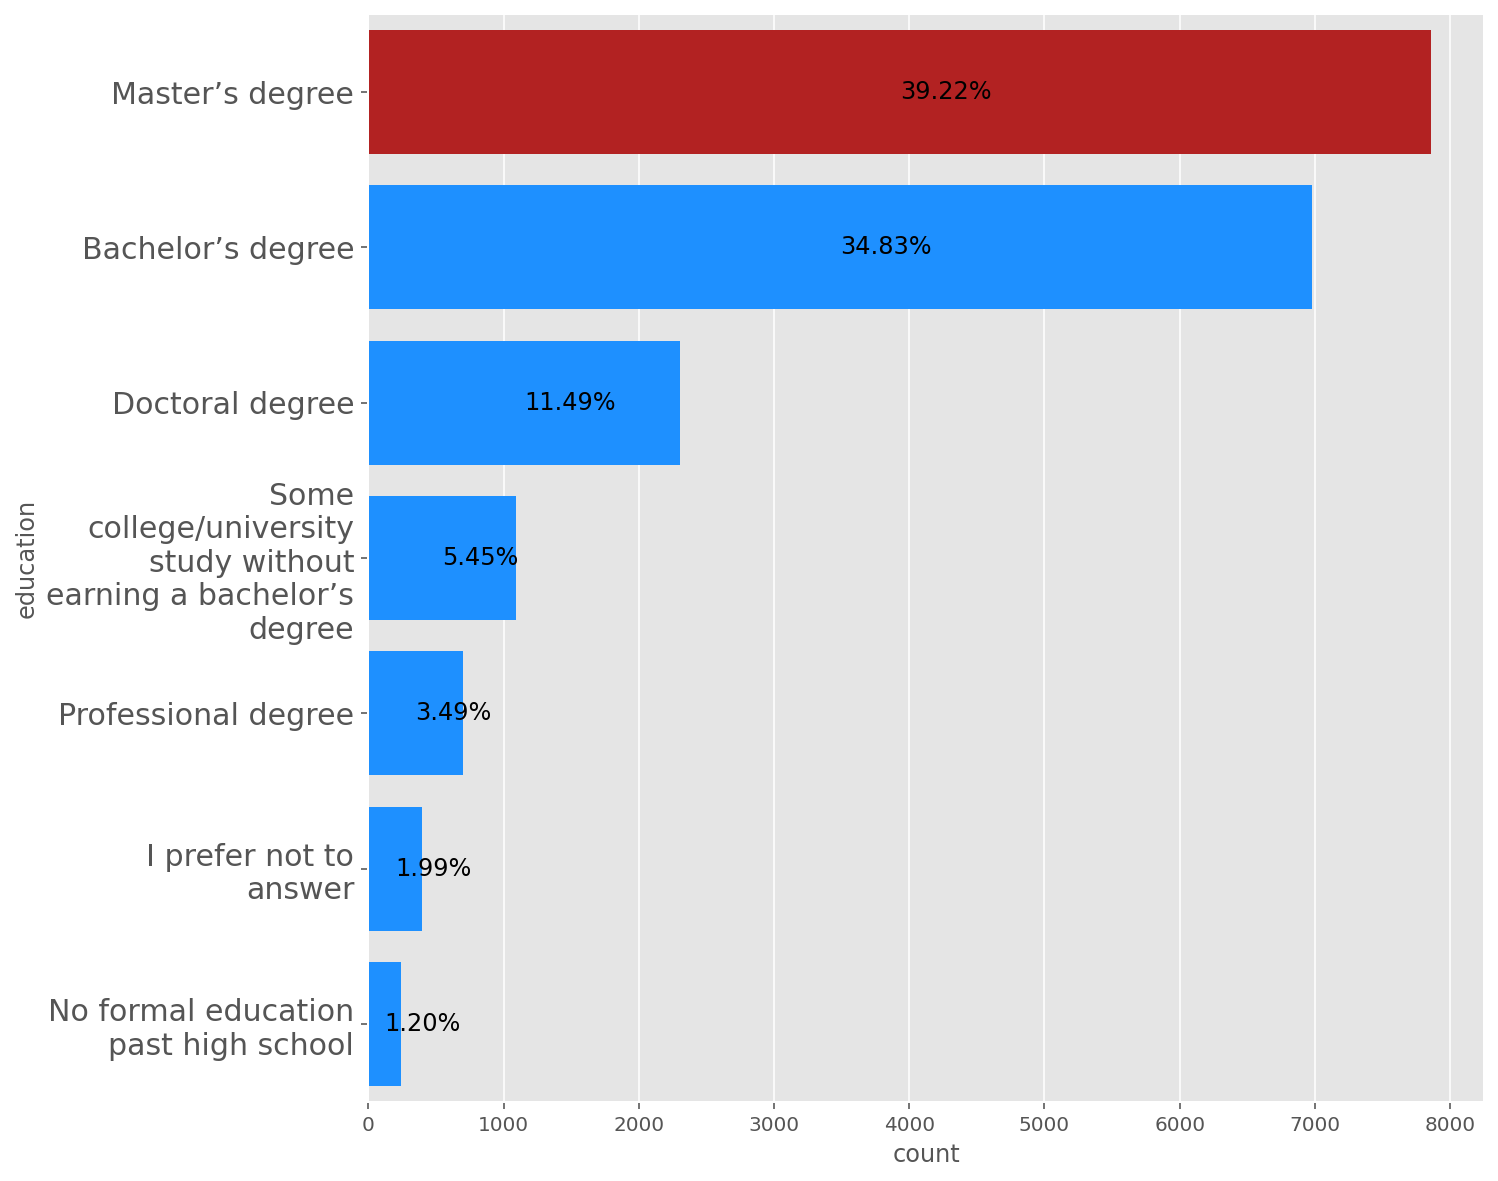

In [24]:
education = data['Q4'].value_counts()
plt.figure(figsize=(10, 10))
color = ['dodgerblue' if (y < max(education)) else 'firebrick' for y in education]
ax= sns.countplot(y="Q4", data=data, order=education.index, palette=color, saturation=1)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
plt.ylabel('education')
plt.yticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q4'])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)

Worldwide, more than three-fourths of respondents have the equivalent of a bachelor's degree or higher. However, it is not that rare to find accomplished professionals who have not completed a degree.

<div class=h3>Current Job Role</div>

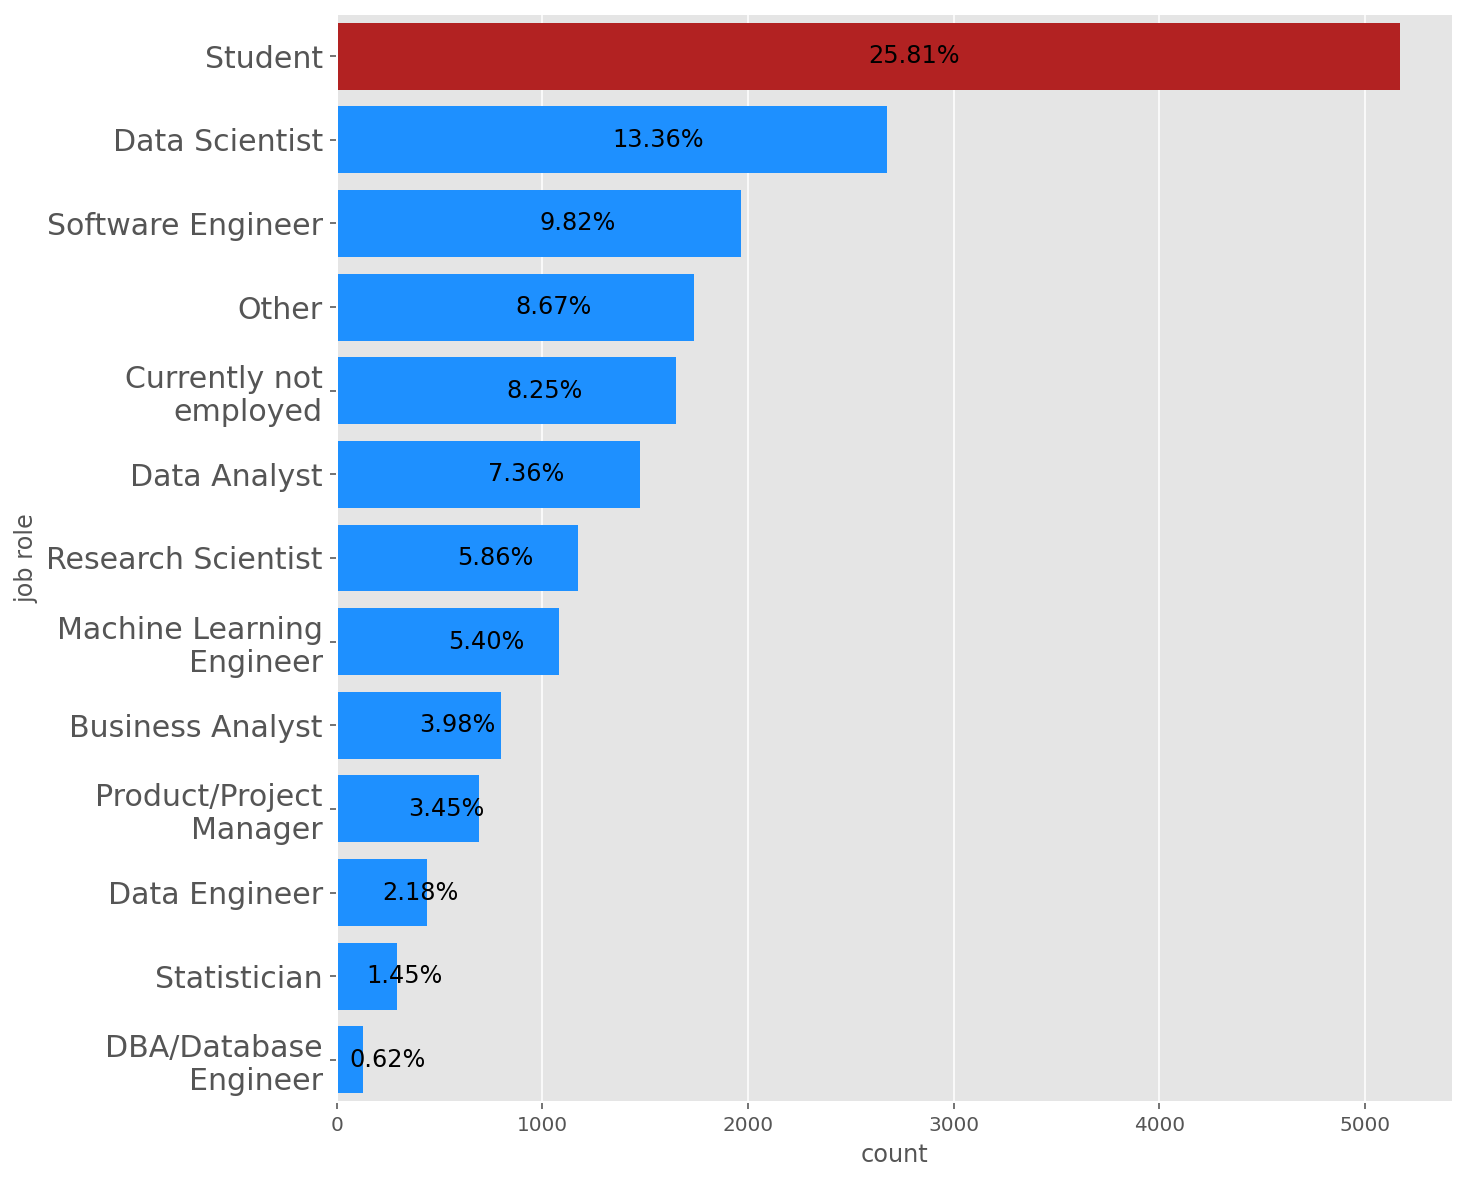

In [25]:
job_role = data['Q5'].value_counts()
plt.figure(figsize=(10, 10))
color = ['dodgerblue' if (y < max(job_role)) else 'firebrick' for y in job_role]
ax= sns.countplot(y="Q5", data=data, order=job_role.index, palette=color, saturation=1)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
plt.ylabel('job role')
plt.yticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q5'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

Almost 26% of all respondents are Students. Among professionals, more than 13% of respondents are Data Scientists, and about 10% of respondents are Software Engineers.

<div class=h3>Code Experience</div>

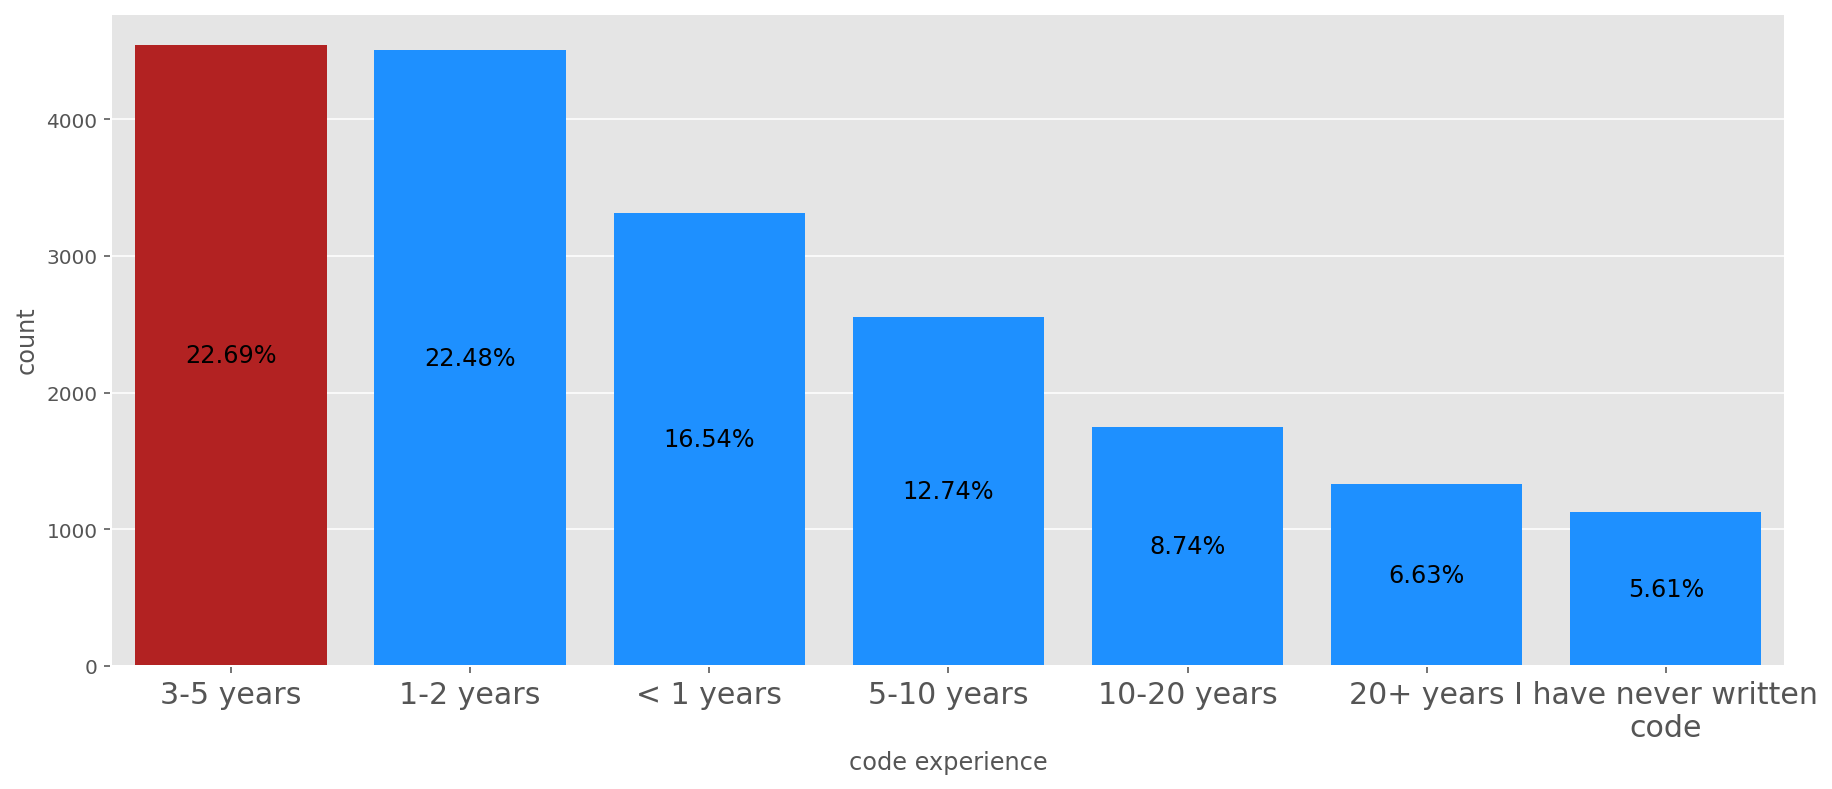

In [26]:
experience = data['Q6'].value_counts()
plt.figure(figsize=(15, 6))
color = ['dodgerblue' if (x < max(experience)) else 'firebrick' for x in experience]
ax= sns.countplot(x="Q6", data=data, order=experience.index, palette=color, saturation=1)
max_width = 20
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.xlabel('code experience')
plt.xticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data['Q5'])),
                (x + width/2, y + height/2), ha='center', va='center',fontsize=12)

Over 60% of respondents have less than five years of professional coding experience.

<div class=h3>Compensation</div>

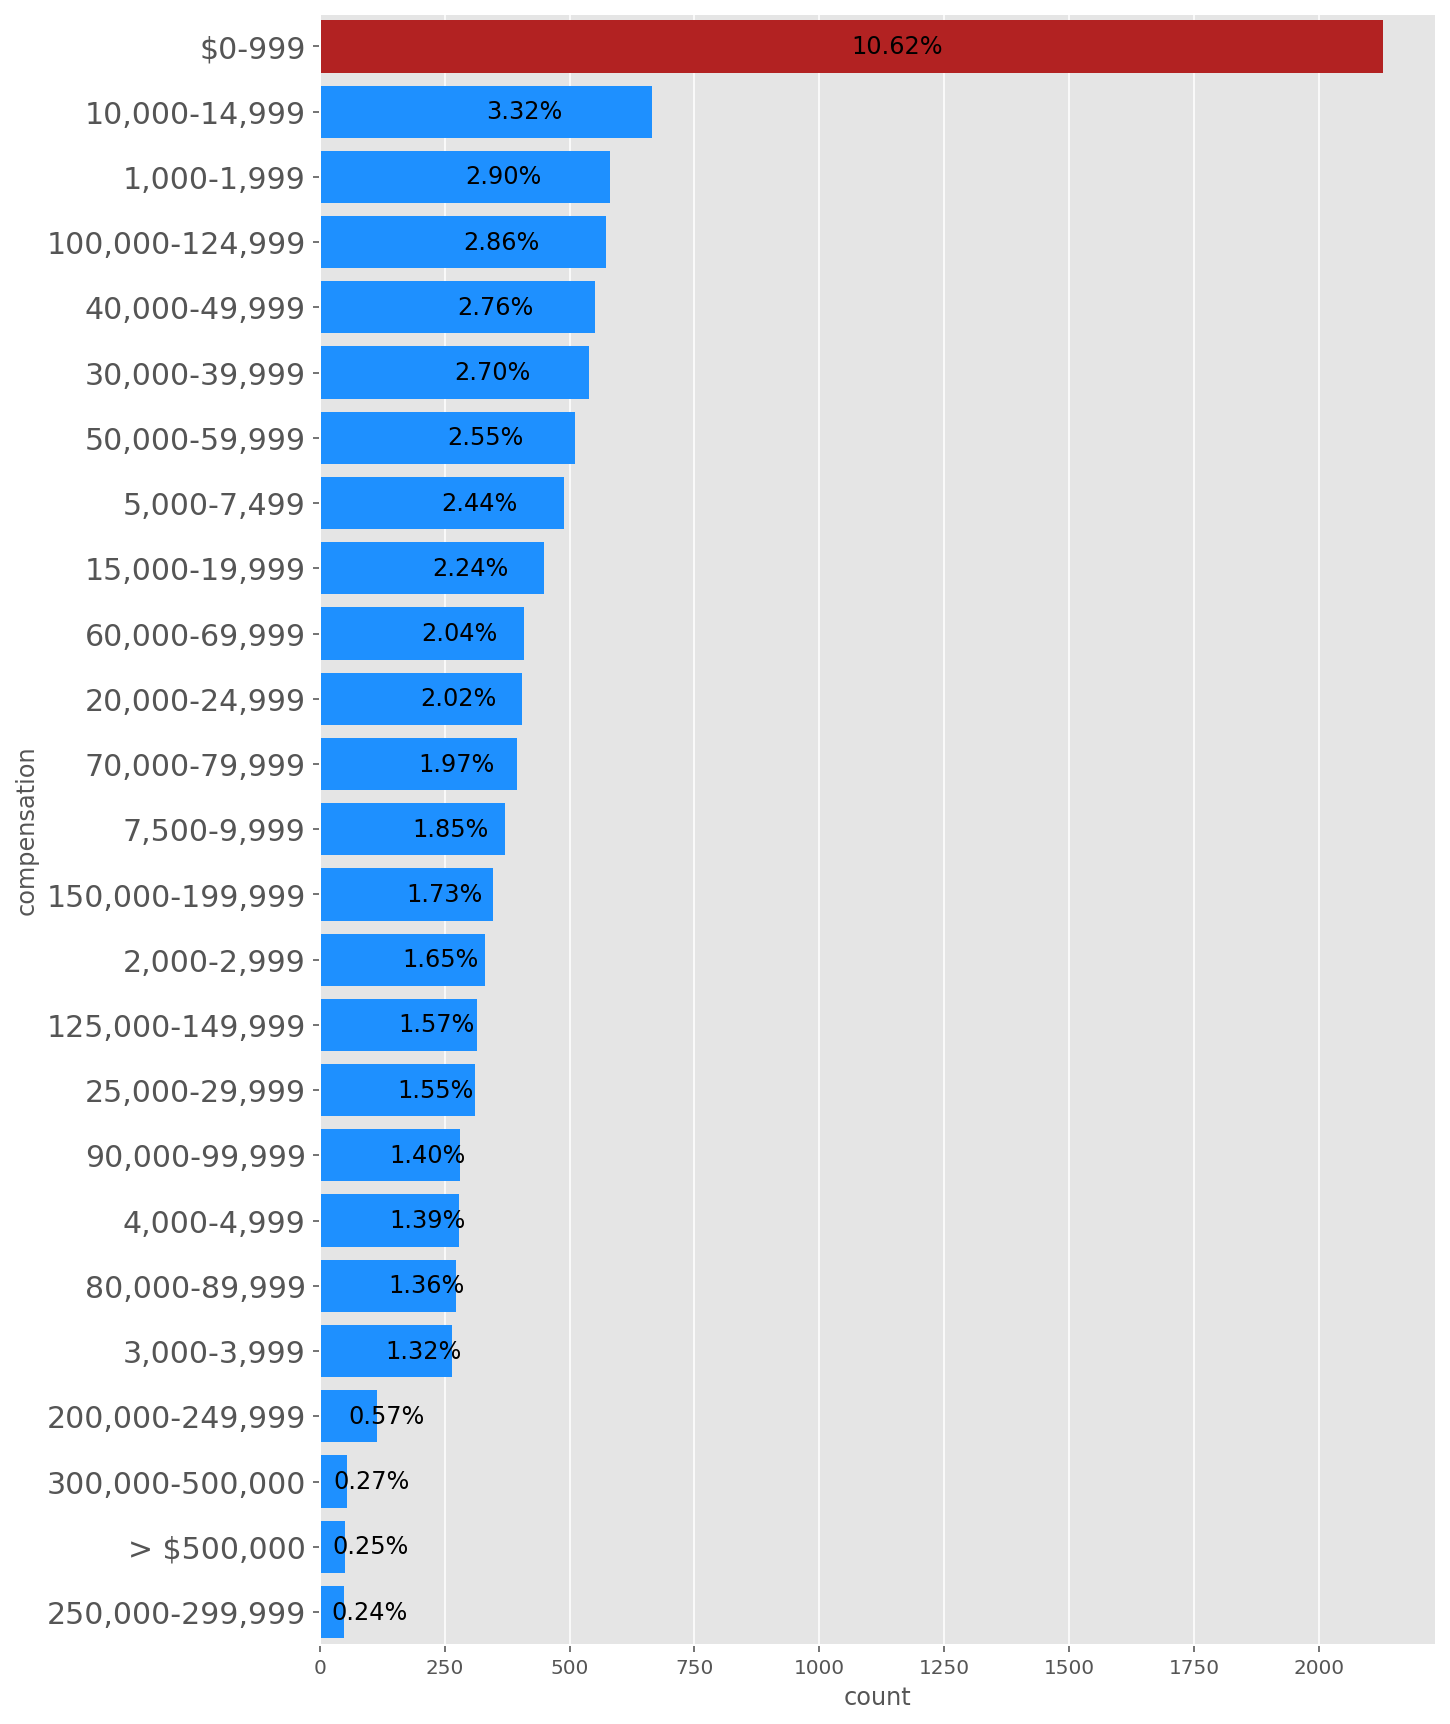

In [27]:
compensation = data['Q24'].value_counts()
plt.figure(figsize=(10, 15))
color = ['dodgerblue' if (y < max(compensation)) else 'firebrick' for y in compensation]
ax= sns.countplot(y="Q24", data=data, order=compensation.index, palette=color, saturation=1)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
plt.ylabel('compensation')
plt.yticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q24'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

Respondents were asked about their compensation, and the majority of people who answered this question, makes less than 1000 USD a year.

<div class=h2>Technology</div>

<div class=h3>Programming Languages Used on a Regular Basis</div>

Text(0, 0.5, 'programming languages')

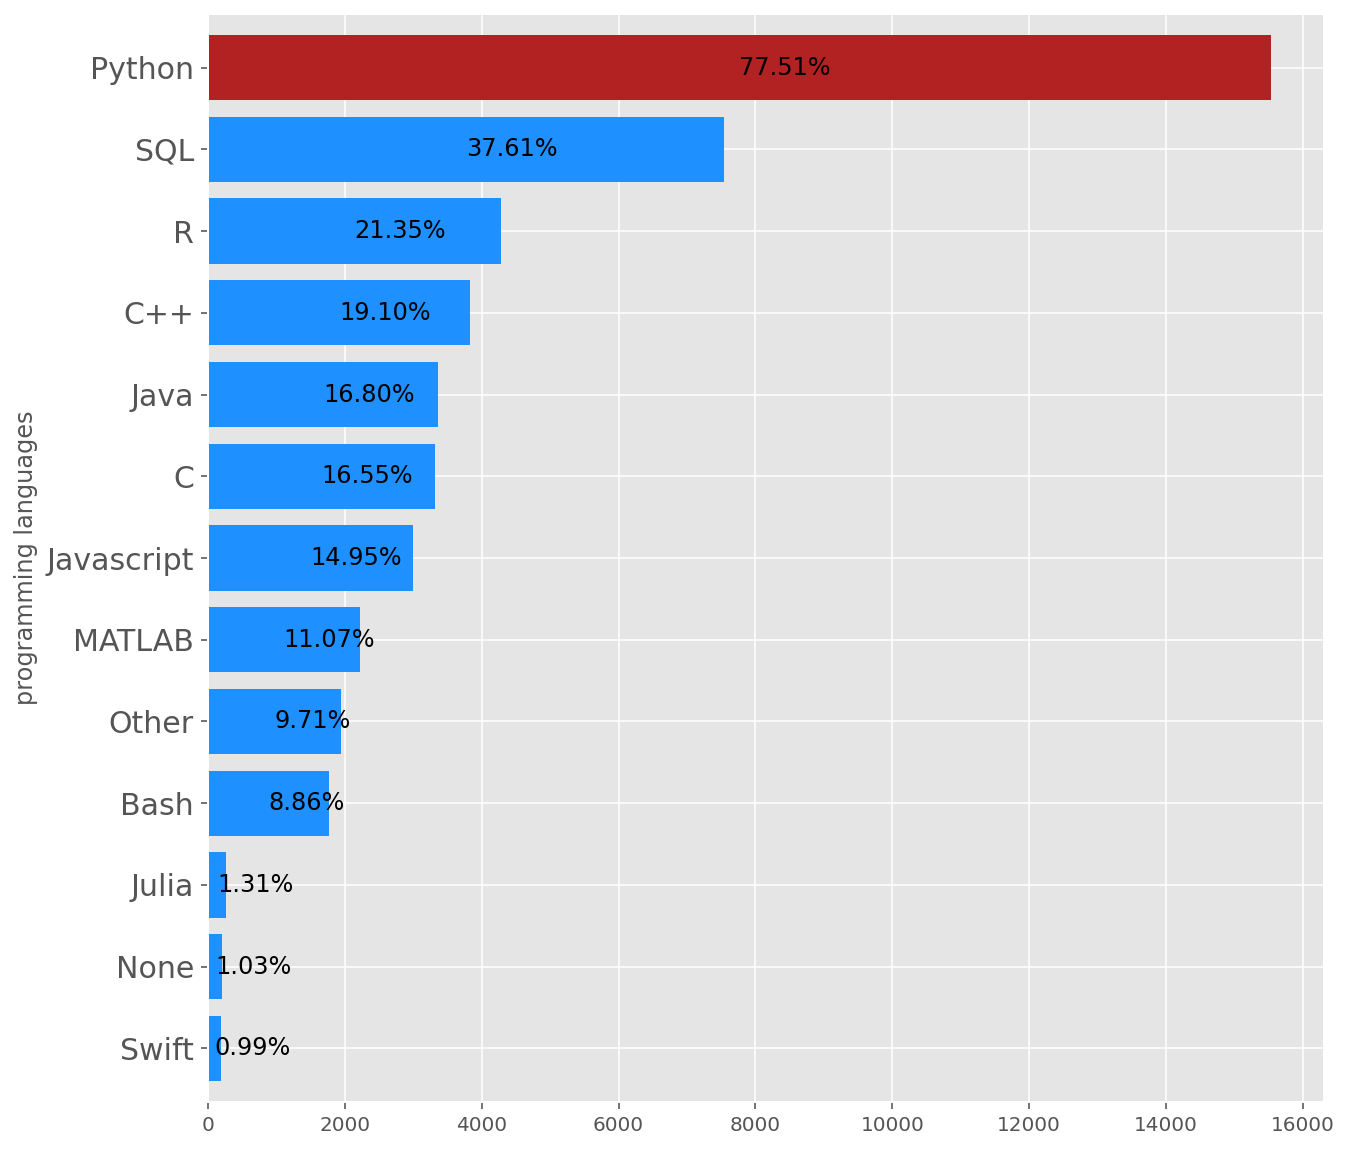

In [28]:
df = data[[i for i in data.columns if 'Q7' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q7' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('programming languages')

Python is the most commonly used programming language. This year, Python was used on a regular basis by almost 80% of respondents. Python is the fastest-growing major programming language today. SQL was used by almost 38% of respondents, and it is the second most commonly used programming language. R is the third most commonly used programming language, and it is preferred by over 20% of respondents. Swift and Julia are the least used programming languages.

<div class=h3>Programming Languages Recommended for Aspiring Data Scientists</div>

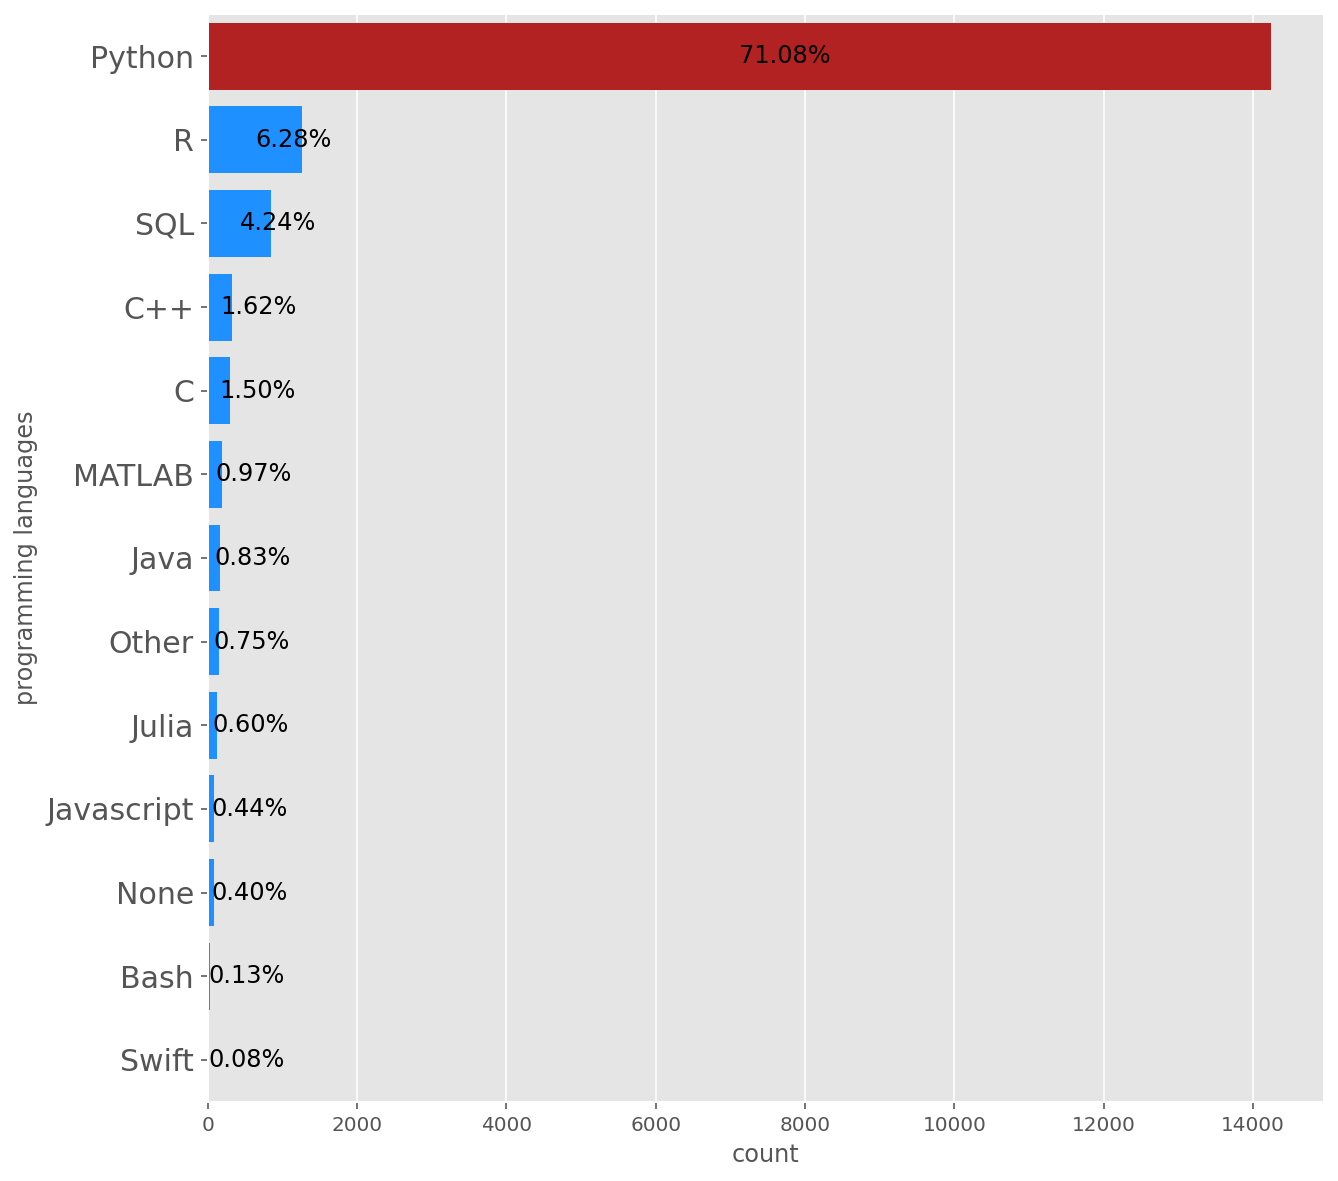

In [29]:
experience = data['Q8'].value_counts()
plt.figure(figsize=(10, 10))
color = ['dodgerblue' if (y < max(experience)) else 'firebrick' for y in experience]
ax= sns.countplot(y="Q8", data=data, order=experience.index, palette=color, saturation=1)
plt.ylabel('programming languages')
plt.yticks(fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q8'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

Globally, over 70% of respondents recommend Python for aspiring Data Scientists, while over 6% of respondents recommend R. SQL is recommended by less than 5% of respondents.

<div class=h3>Computing Platforms</div>

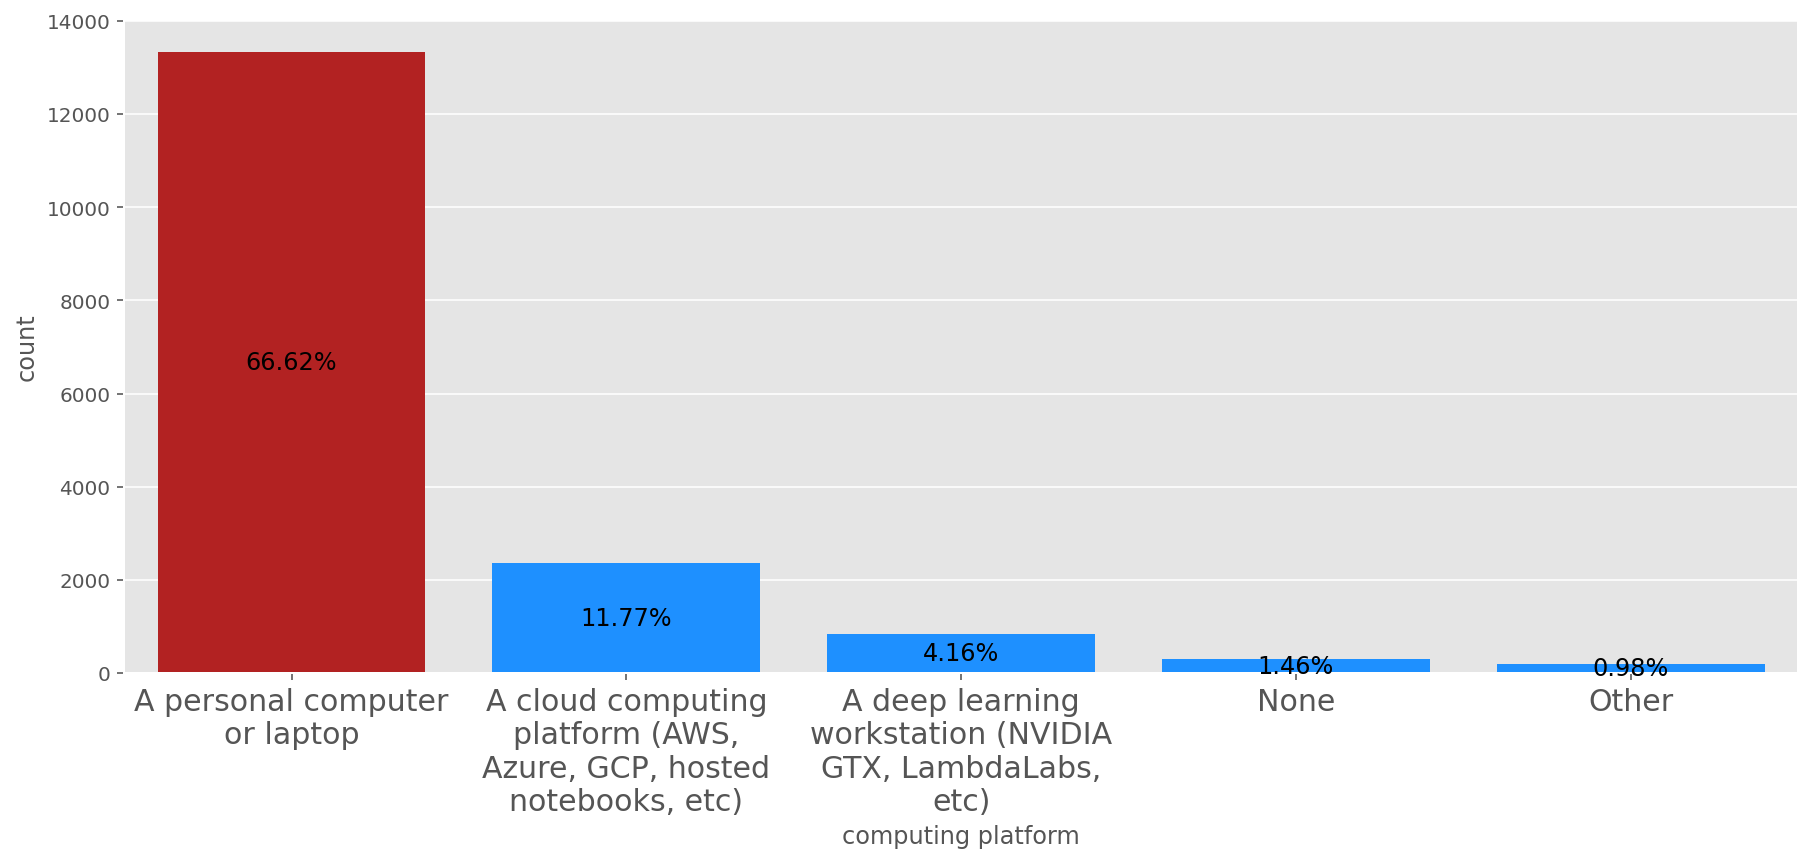

In [30]:
experience = data['Q11'].value_counts()
plt.figure(figsize=(15,6))
color = ['dodgerblue' if (x < max(experience)) else 'firebrick' for x in experience]
ax= sns.countplot(x="Q11", data=data, order=experience.index, palette=color, saturation=1)
max_width = 20
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.xlabel('computing platform')
plt.xticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data['Q11'])),
                (x + width/2, y + height/2), ha='center', va='center',fontsize=12)

Respondents were asked what computing platforms they use for work. Over 60% say they mainly use a personal computer or laptop, about 12% use a cloud computing platform, and over 4% use a deep learning work station.

<div class=h3>Hardware Accelerators</div>

Text(0.5, 0, 'hardware accelerators')

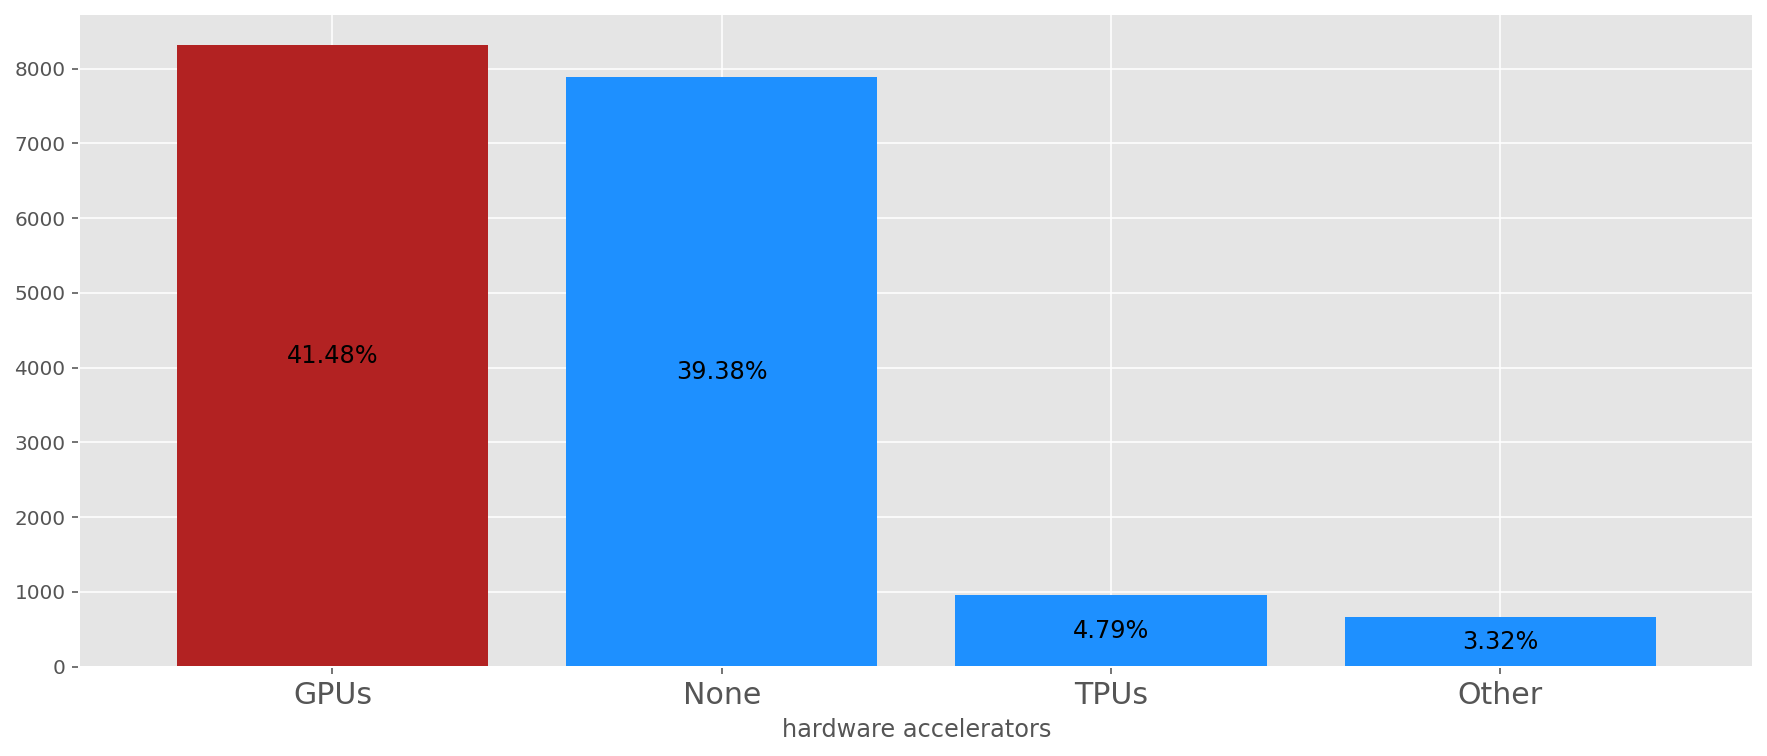

In [31]:
df = data[[i for i in data.columns if 'Q12' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=False)
color = ['dodgerblue' if (x<max(df_all)) else 'firebrick' for x in df_all]
plt.figure(figsize=(15, 6))
ax = df_all.plot(kind='bar', color=color, alpha=1, width=0.8)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data[[i for i in data.columns if 'Q12' in i]])),
                (x + width/2, y + height/2), ha='center', va='center', fontsize=12)
plt.xticks(rotation=0, fontsize=15)
plt.xlabel('hardware accelerators')

When asked how about using hardware accelerators such as GPU or TPU, about 40% of respondents say they are not using any such technology today. Those who are using hardware accelerators most commonly prefer GPUs, and only about 5% of respondents use TPUs.

<div class=h3>Usage of TPUs</div>

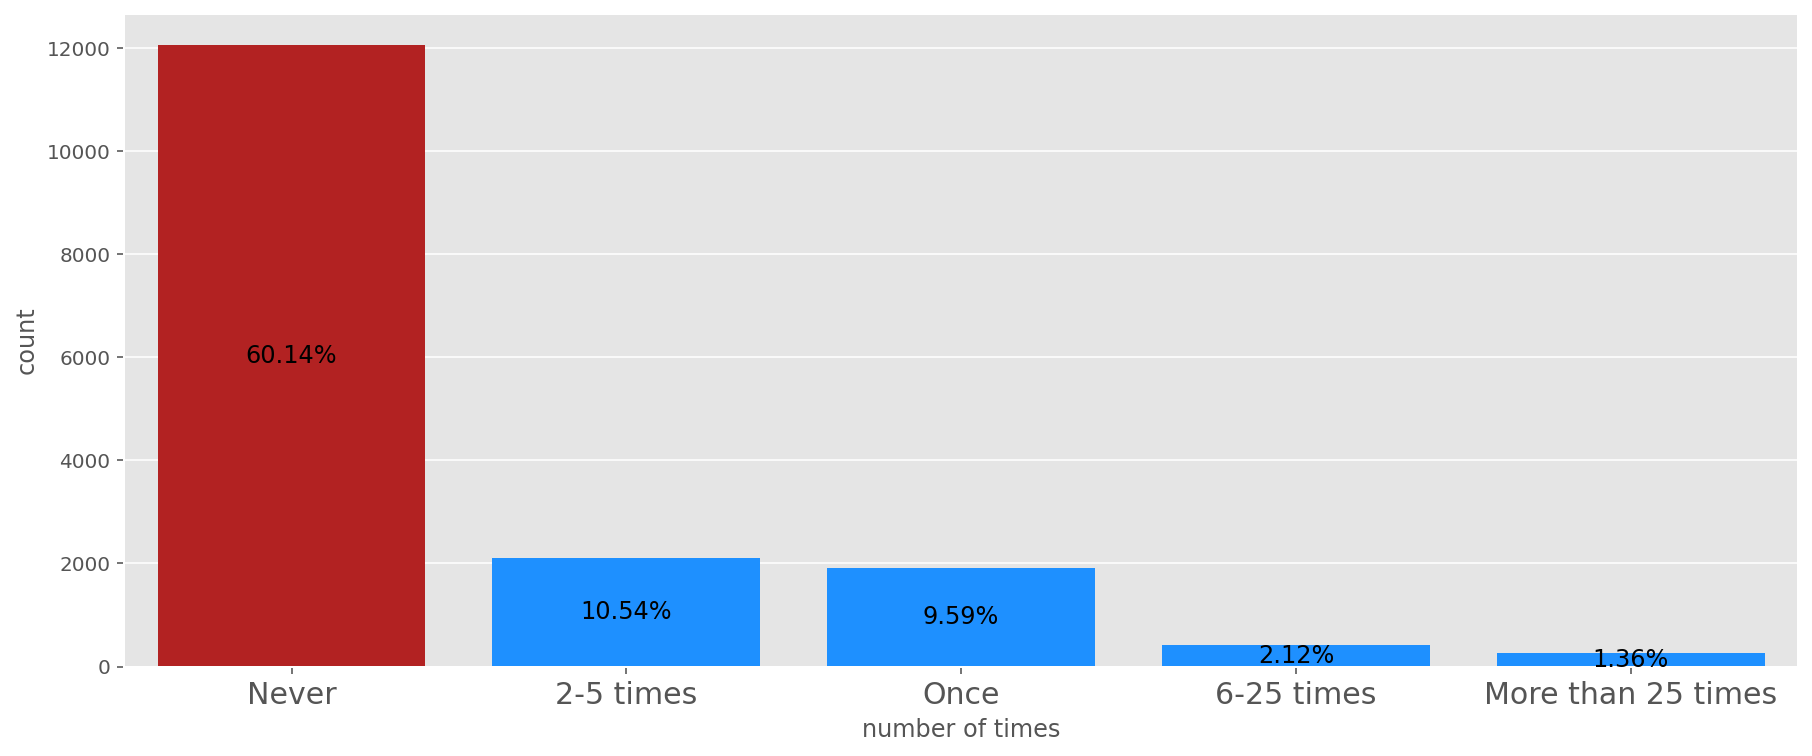

In [32]:
experience = data['Q13'].value_counts()
plt.figure(figsize=(15,6))
color = ['dodgerblue' if (x < max(experience)) else 'firebrick' for x in experience]
ax= sns.countplot(x="Q13", data=data, order=experience.index, palette=color, saturation=1)
plt.xlabel('number of times')
plt.xticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data['Q13'])),
                (x + width/2, y + height/2), ha='center', va='center',fontsize=12)

Over 60% of respondents never use TPUs.

<div class=h3>Machine Learning Algorithms</div>

Text(0, 0.5, 'algorithms')

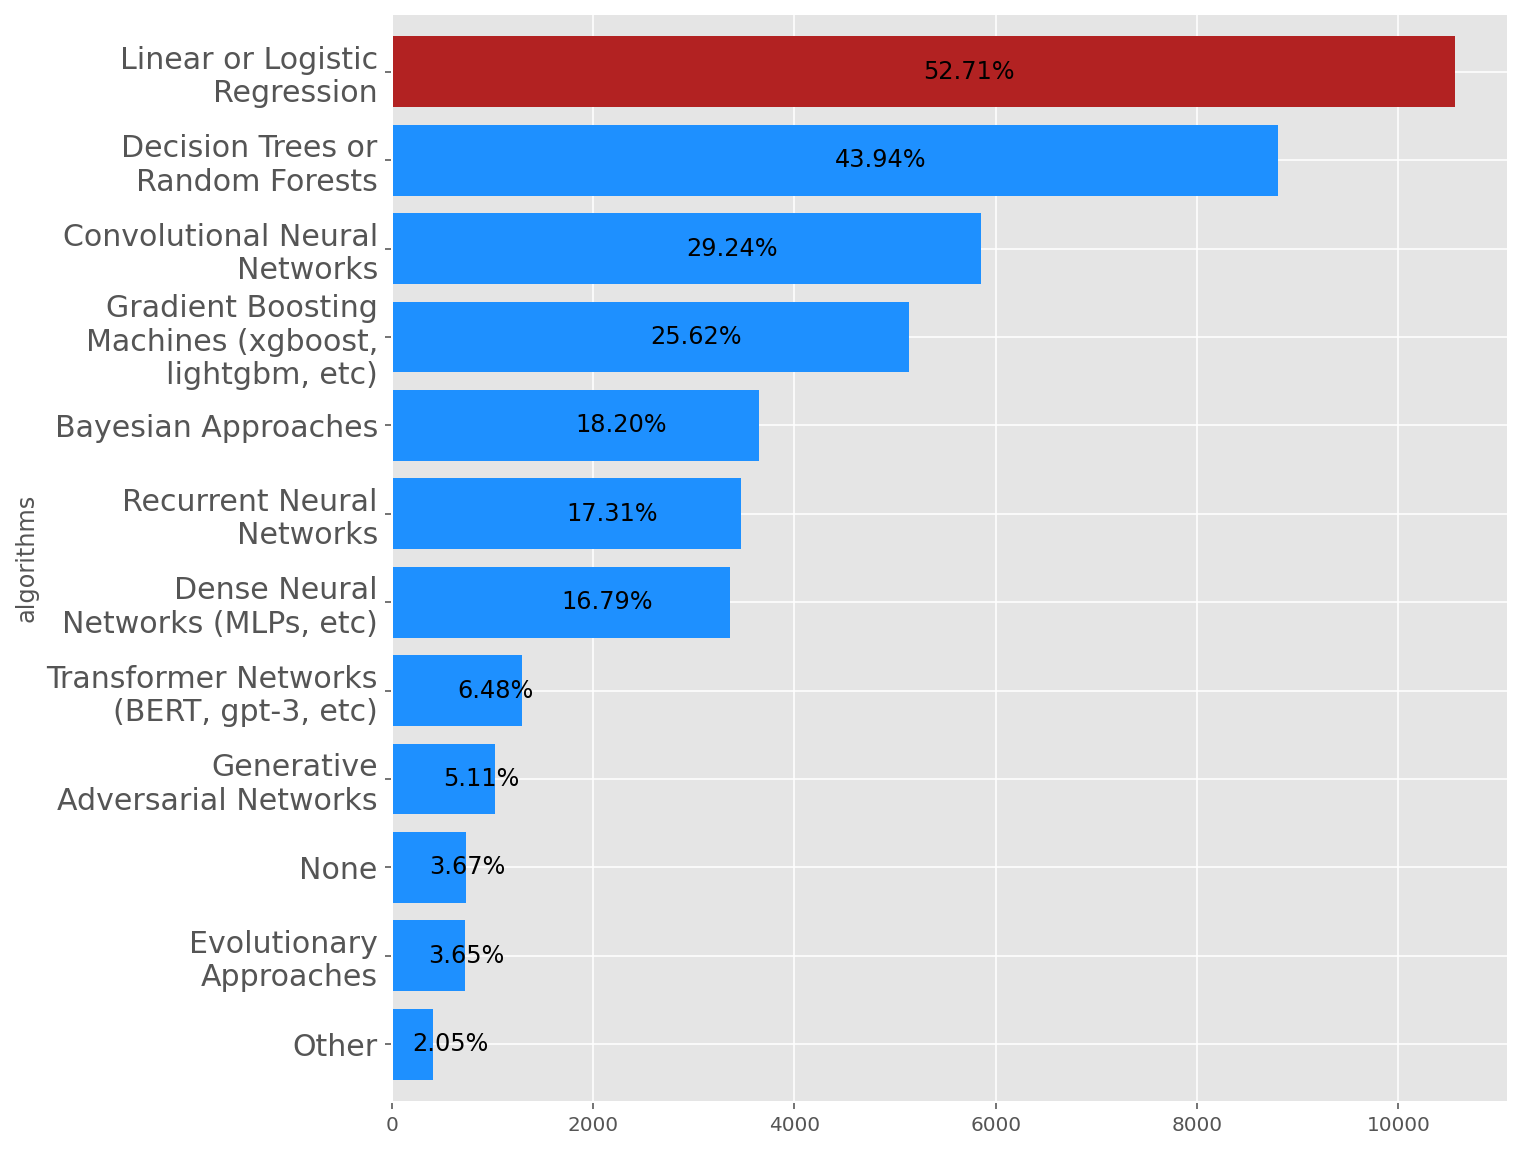

In [33]:
df = data[[i for i in data.columns if 'Q17' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q17' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('algorithms')

When it comes to machine learning algorithms, more than half of respondents use Linear or Logistic Regression, and around 45% use Decision Trees or Random Forests.

<div class=h3>Favorite Integrated Development Environments (IDEs)</div>

Text(0, 0.5, 'favorite ides')

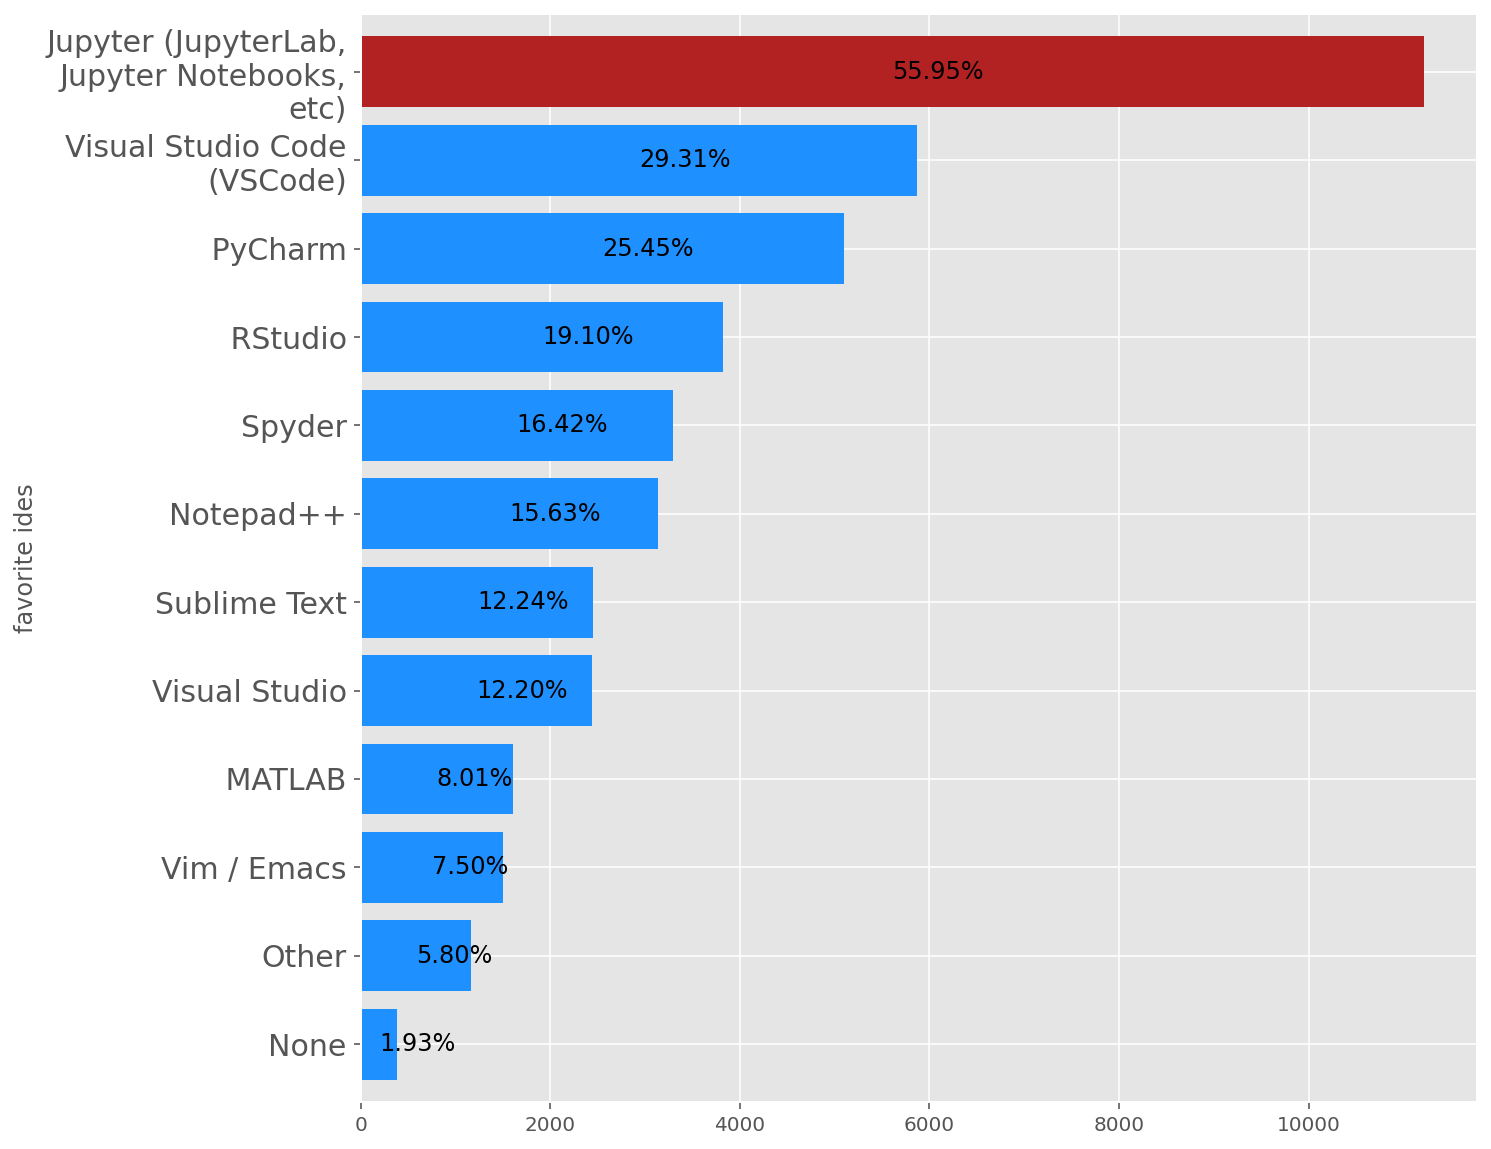

In [34]:
df = data[[i for i in data.columns if 'Q9' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q9' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('favorite ides')

Jupiter is the most loved integrated environment for development, with both Visual Studio Code and Pycharm also highly loved this year. Vim/Emacs and MATLAB are the least loved IDEs.

<div class=h3>Most Hosted Notebooks</div>

Text(0, 0.5, 'notebooks')

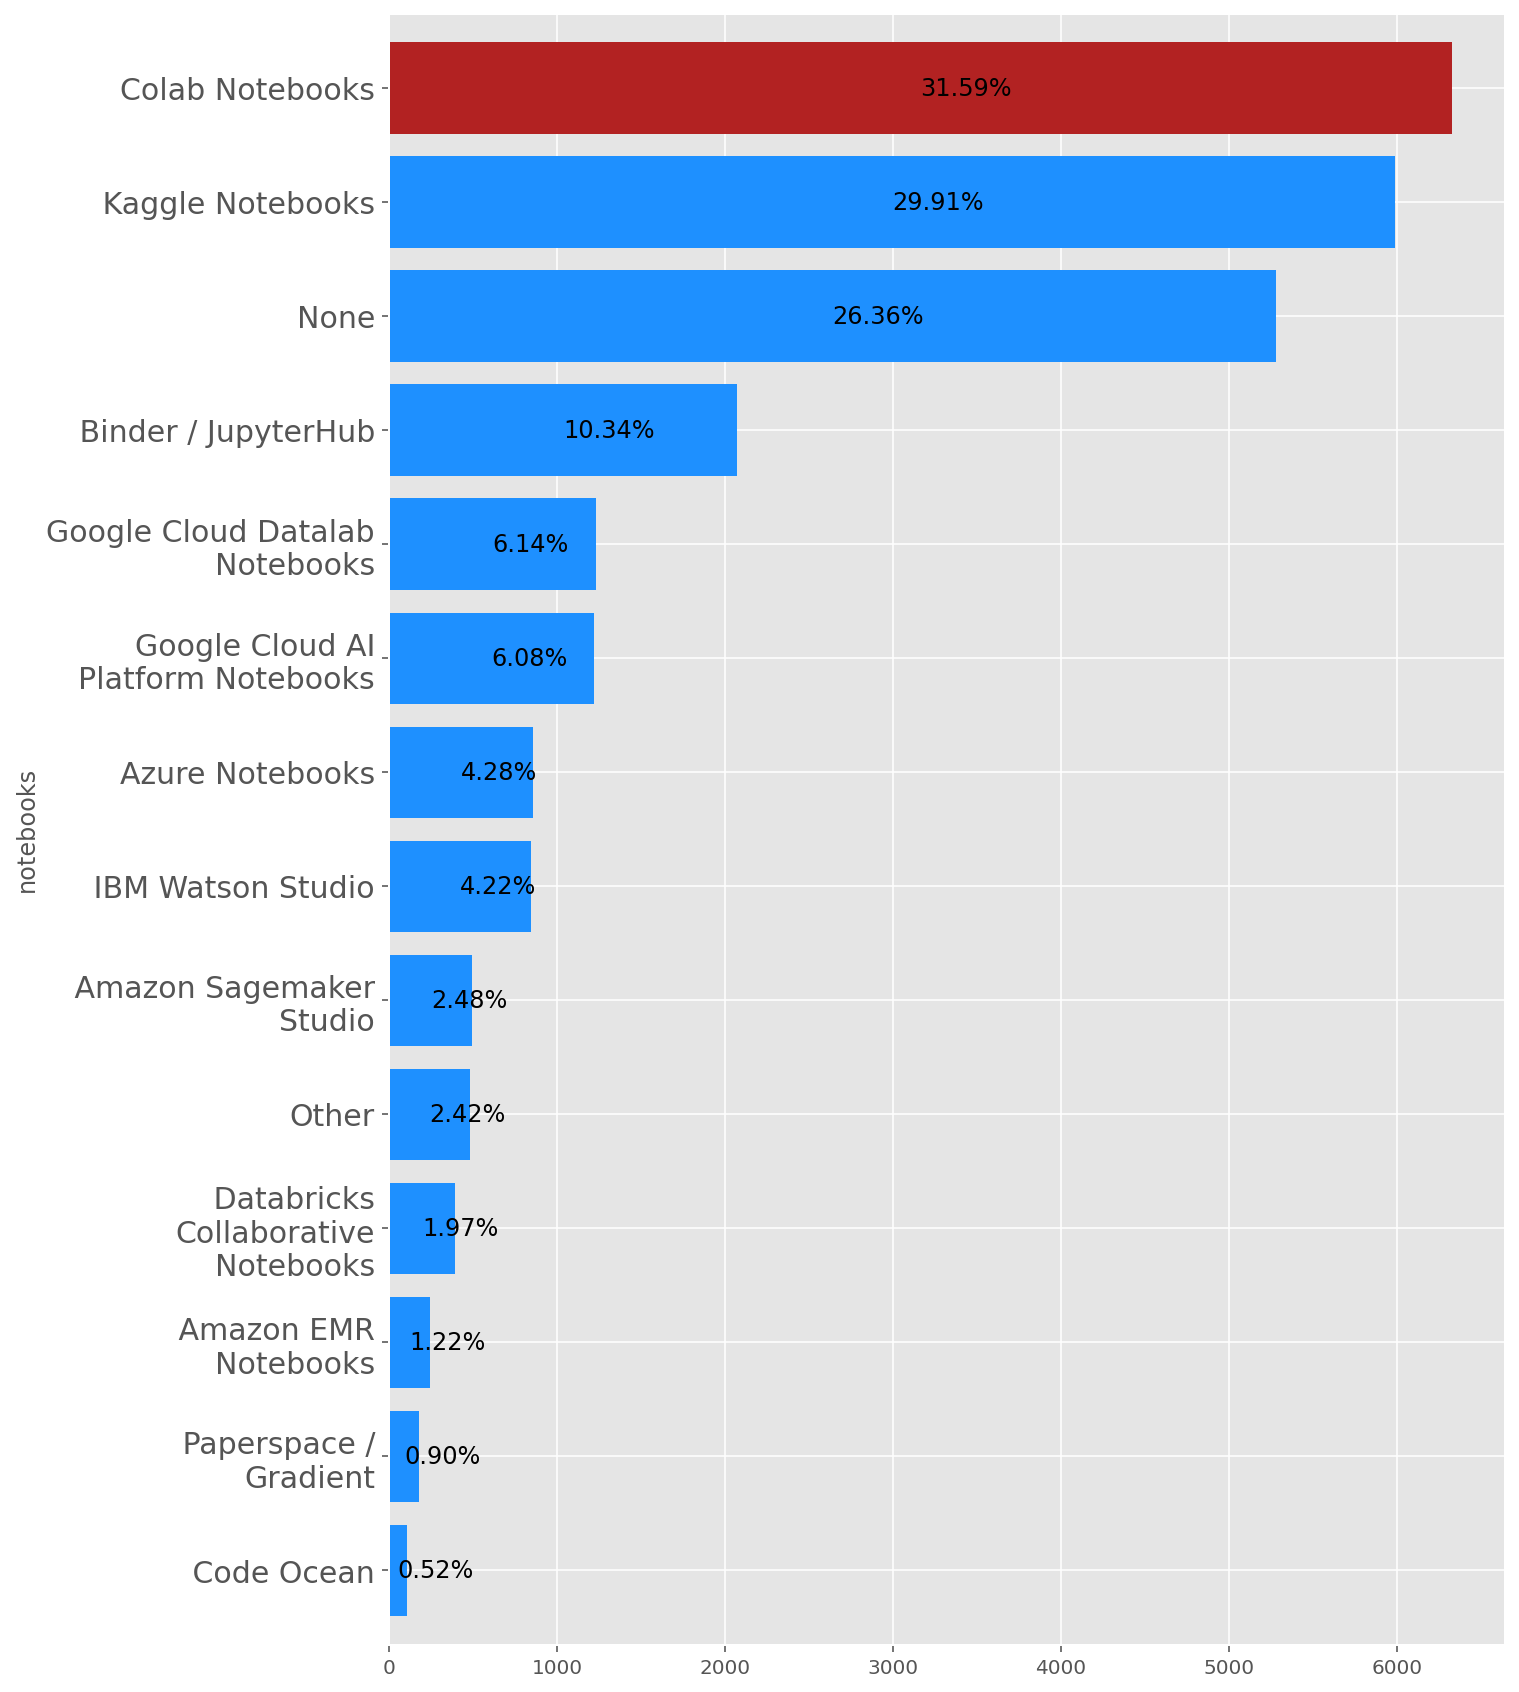

In [35]:
df = data[[i for i in data.columns if 'Q10' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 15))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q10' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('notebooks')

Colab Notebooks are the most commonly used notebooks. However, the difference between the number of respondents who use Colab Notebooks and the number of respondents who use Kaggle Notebooks is less than 2%, and a good amount of people use none.

<div class=h3>Visualization Libraries</div>

Text(0, 0.5, 'visualization tools')

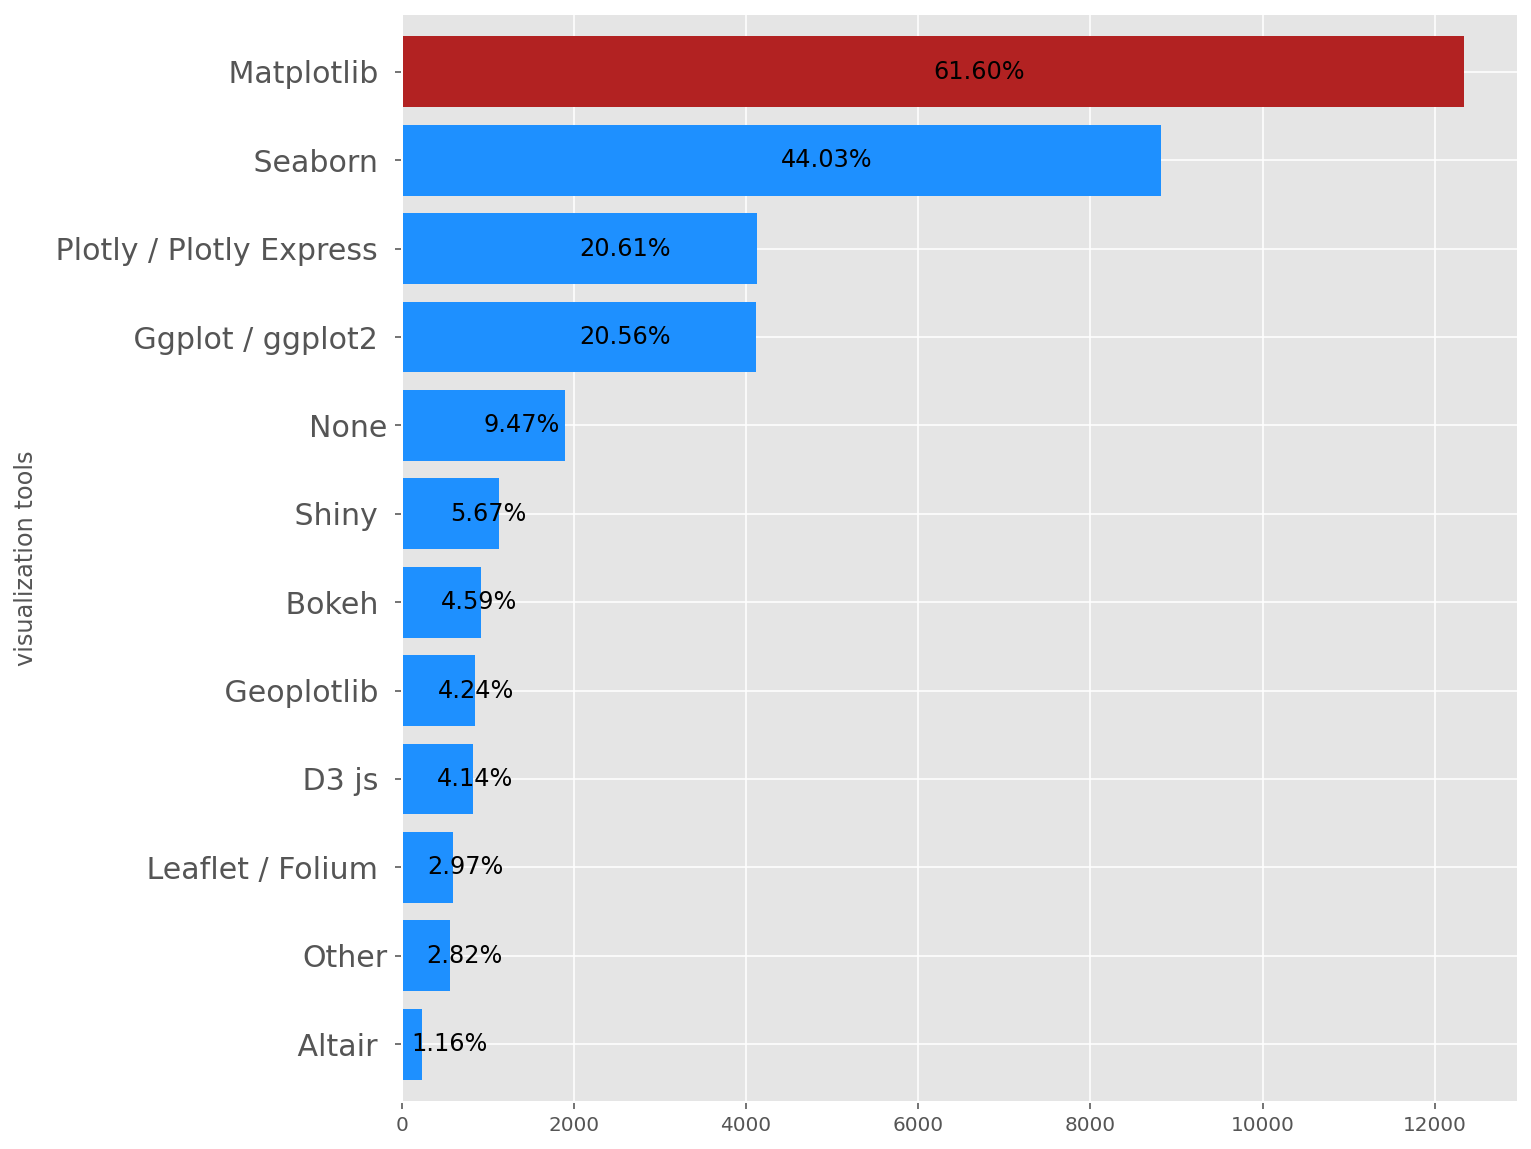

In [36]:
df = data[[i for i in data.columns if 'Q14' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q14' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('visualization tools')

Matplotlib is the number one visualization library kagglers use for work, followed by Seaborn. The third spot is about evenly split between Plotly and Ggplot. Altair is the least popular visualization library on the survey.

<div class=h3>Machine Learning Frameworks</div>

Text(0, 0.5, 'ml frameworks')

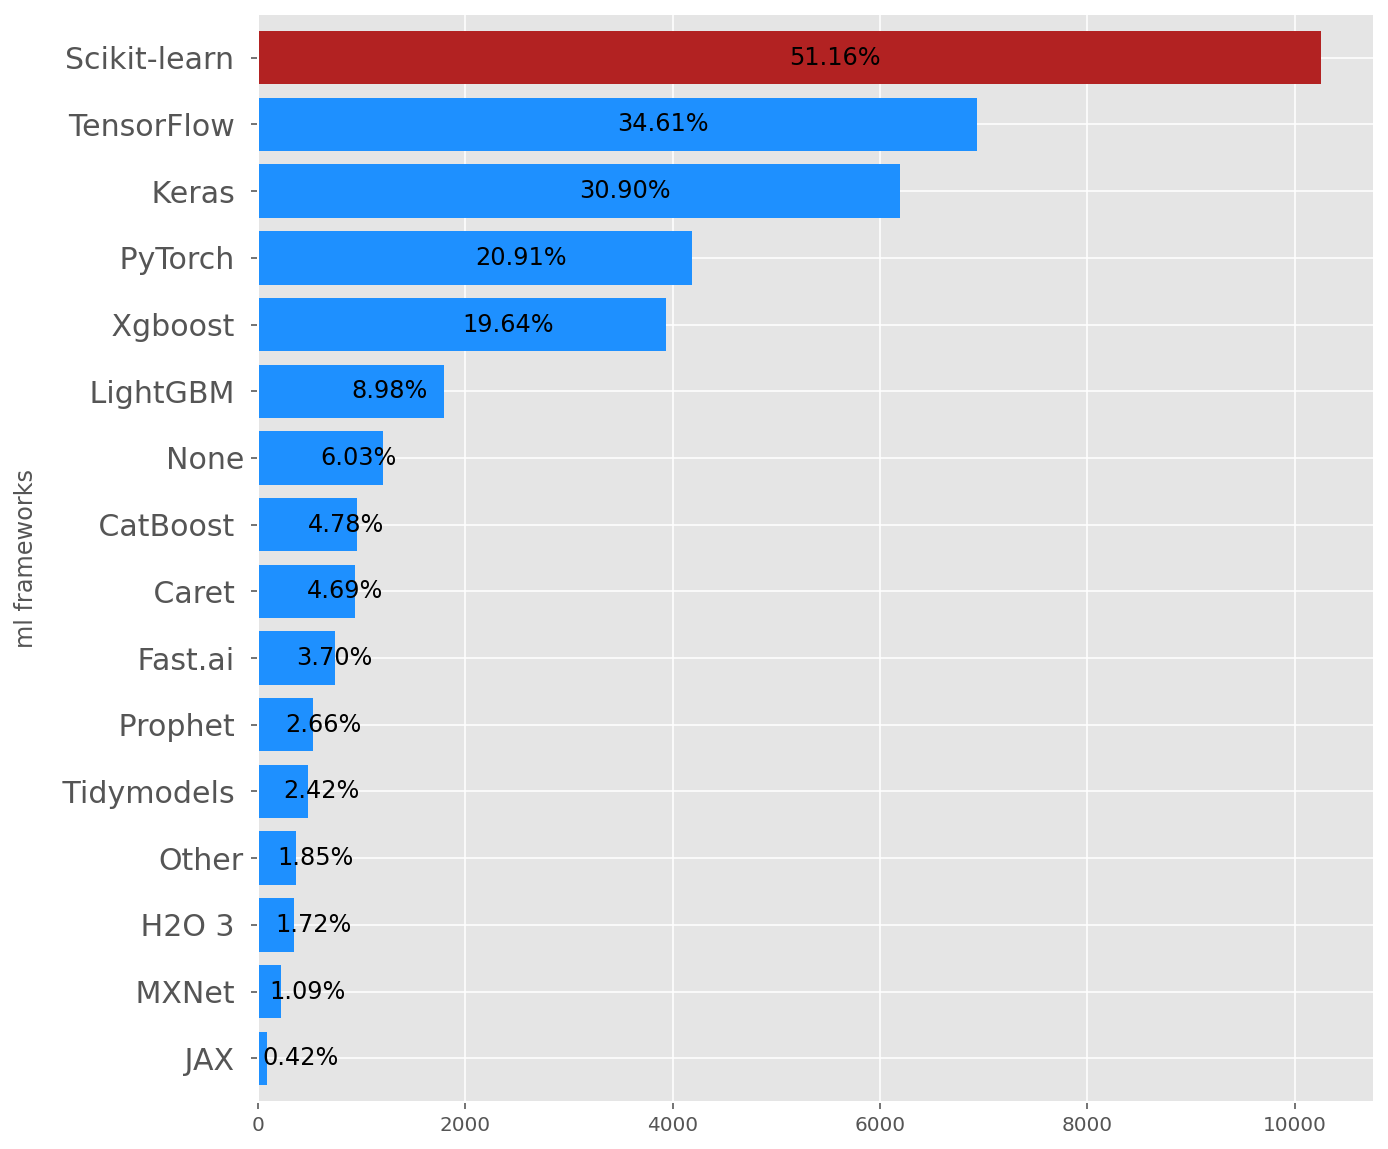

In [37]:
df = data[[i for i in data.columns if 'Q16' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q16' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('ml frameworks')

Scikit-learn is a dominant player among machine learning frameworks this year, followed by Tensorflow and Keras.

<div class=h3>Machine Learning Experience</div>

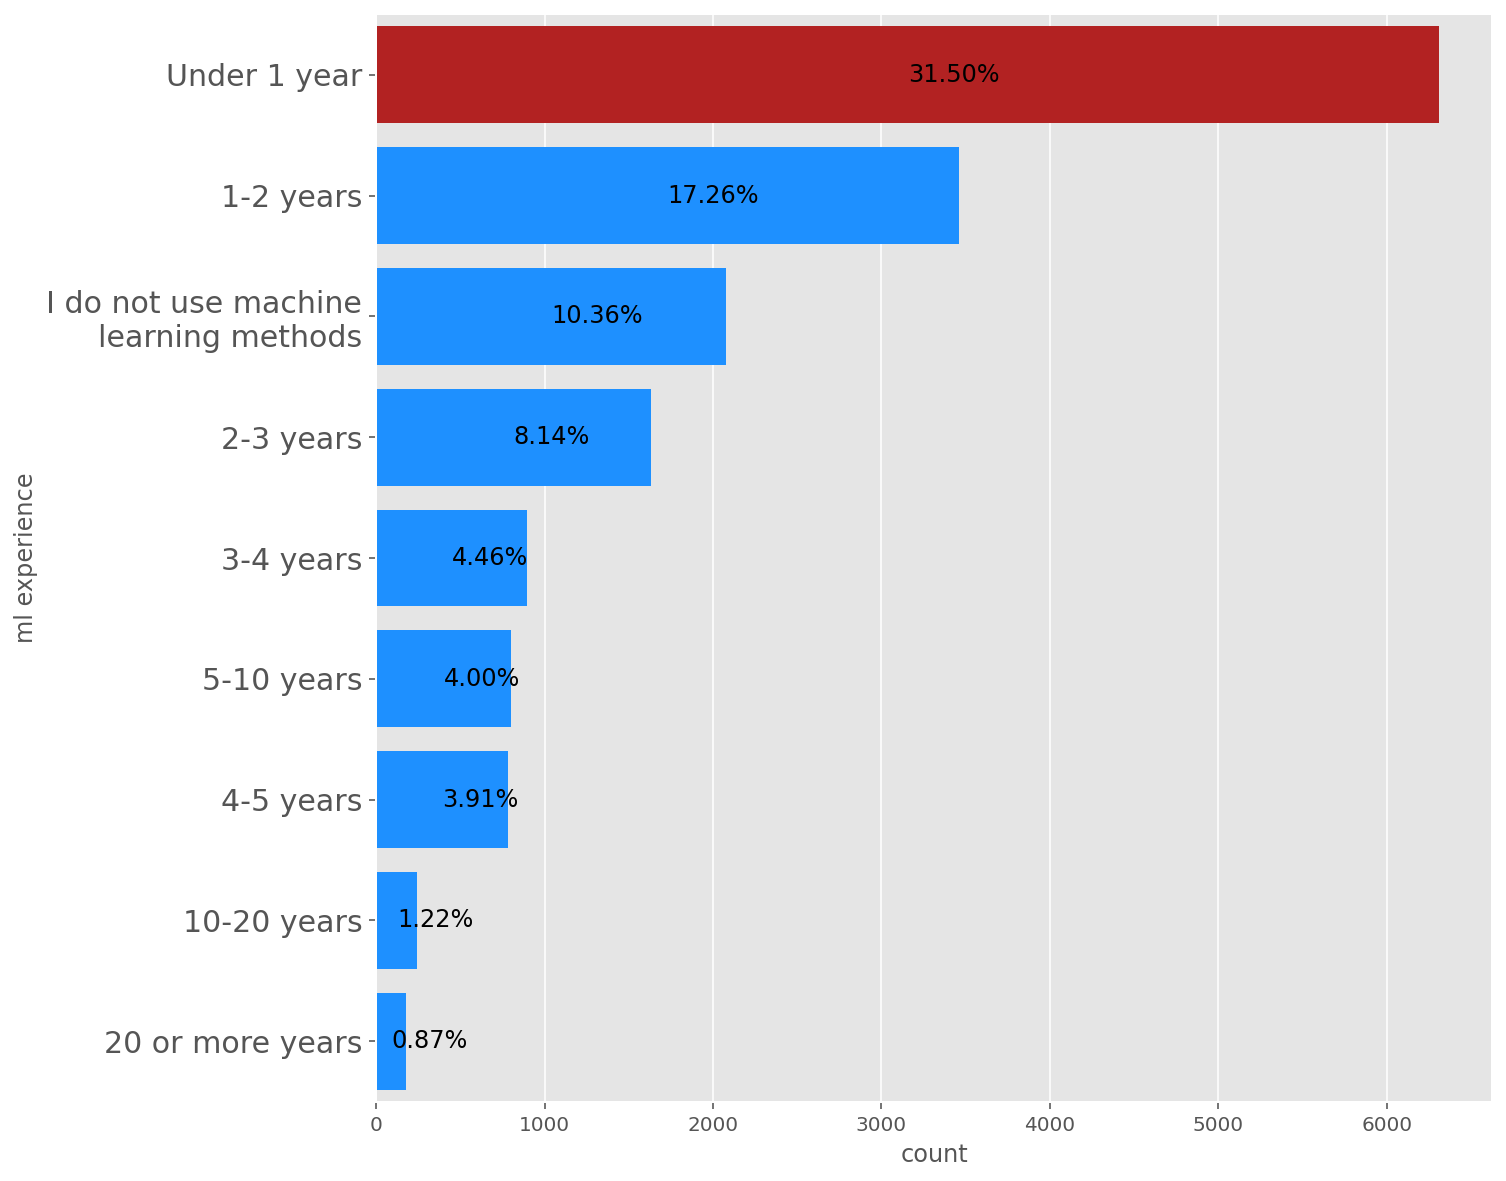

In [38]:
ml_experience = data['Q15'].value_counts()
plt.figure(figsize=(10, 10))
color = ['dodgerblue' if (y < max(ml_experience)) else 'firebrick' for y in ml_experience]
ax= sns.countplot(y="Q15", data=data, order=ml_experience.index, palette=color, saturation=1)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
plt.ylabel('ml experience')
plt.yticks(fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q15'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

About half of respondents have less than two years of machine learning experience.

<div class=h3>Computer Vision Methods</div>

Text(0, 0.5, 'cv methods')

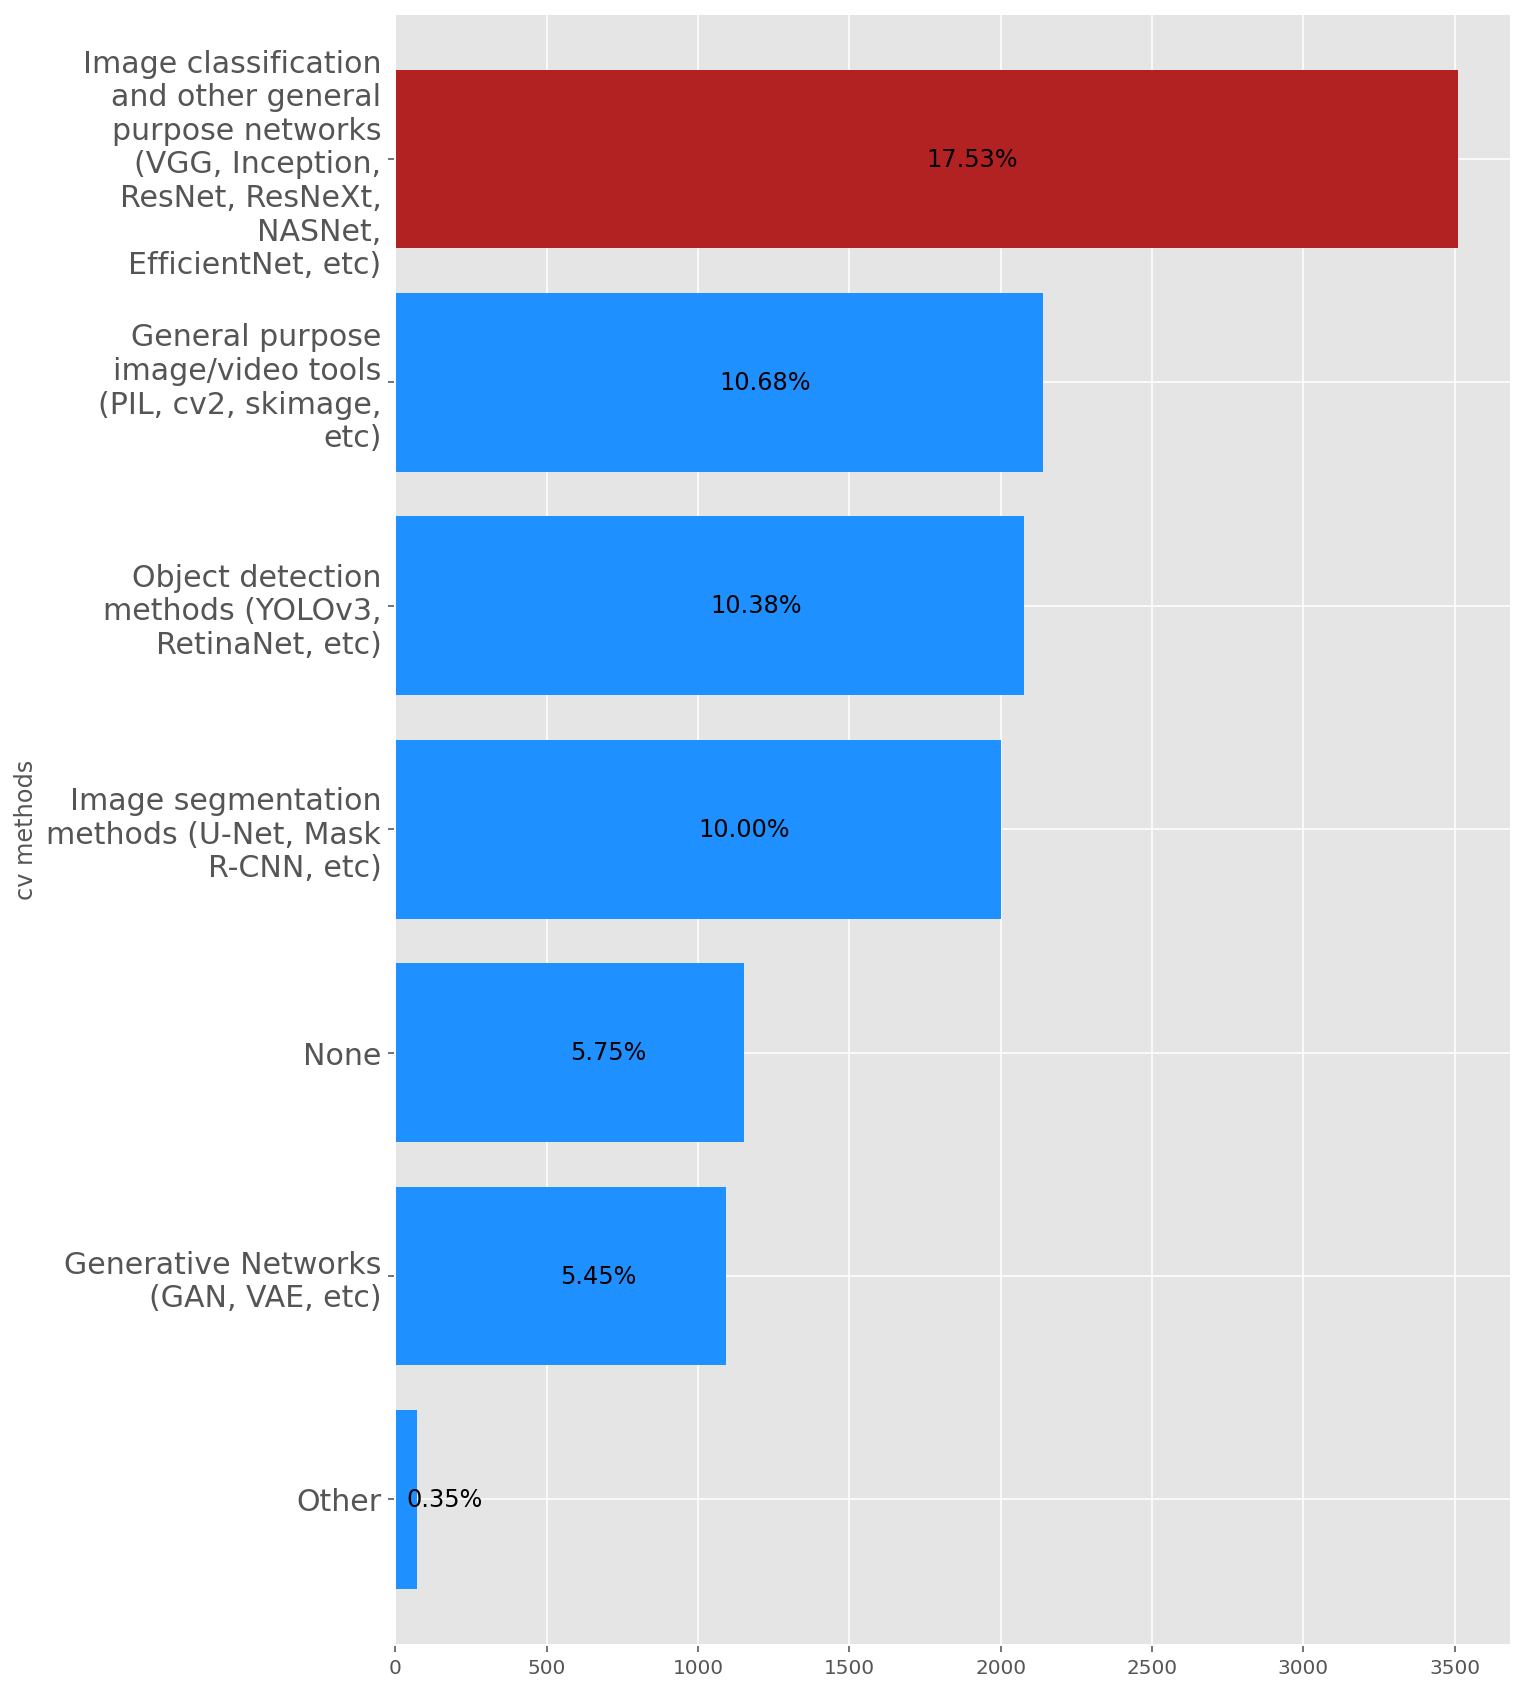

In [39]:
df = data[[i for i in data.columns if 'Q18' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 15))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q18' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('cv methods')

Respondents were asked what computer vision methods they use the most, and Image classification and General purpose image/video tools were the most common answers.

<div class=h3>Natural Language Processing (NLP) Methods</div>

Text(0, 0.5, 'nlp methods')

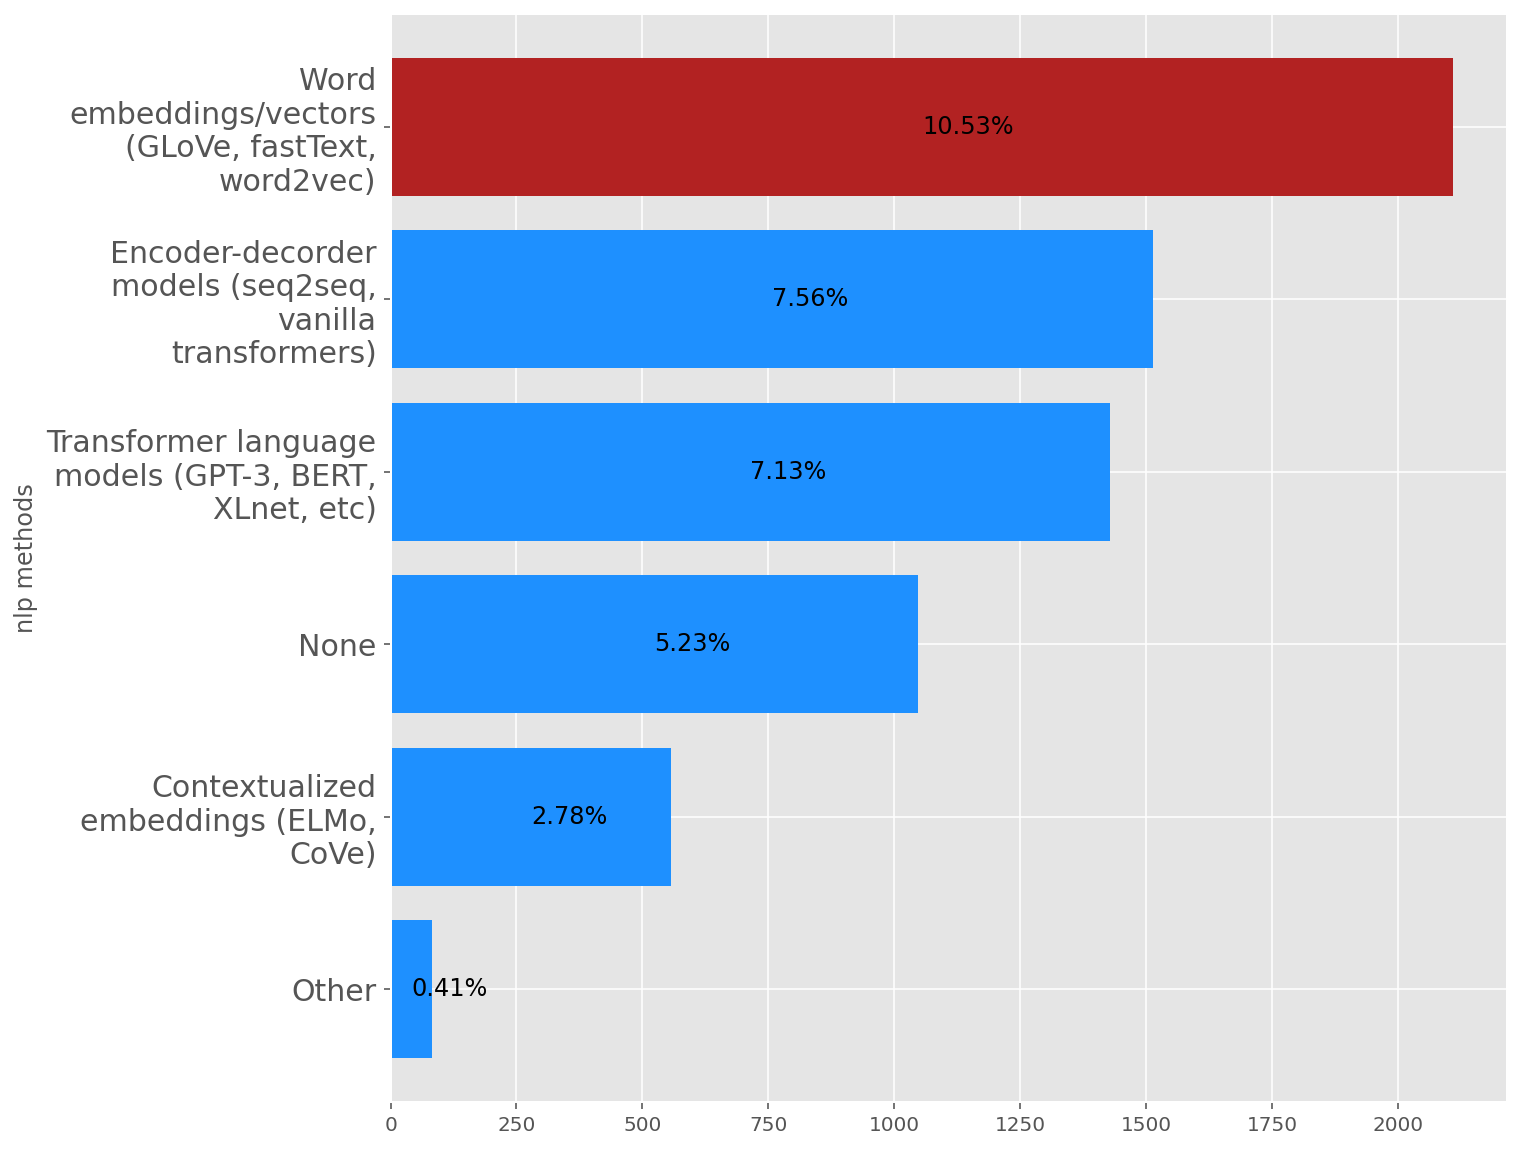

In [40]:
df = data[[i for i in data.columns if 'Q19' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q19' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('nlp methods')

Word embeddings/vectors are the most popular NLP methods.

<div class=h3>Cloud Computing Platforms</div>

Text(0, 0.5, 'cloud computing platforms')

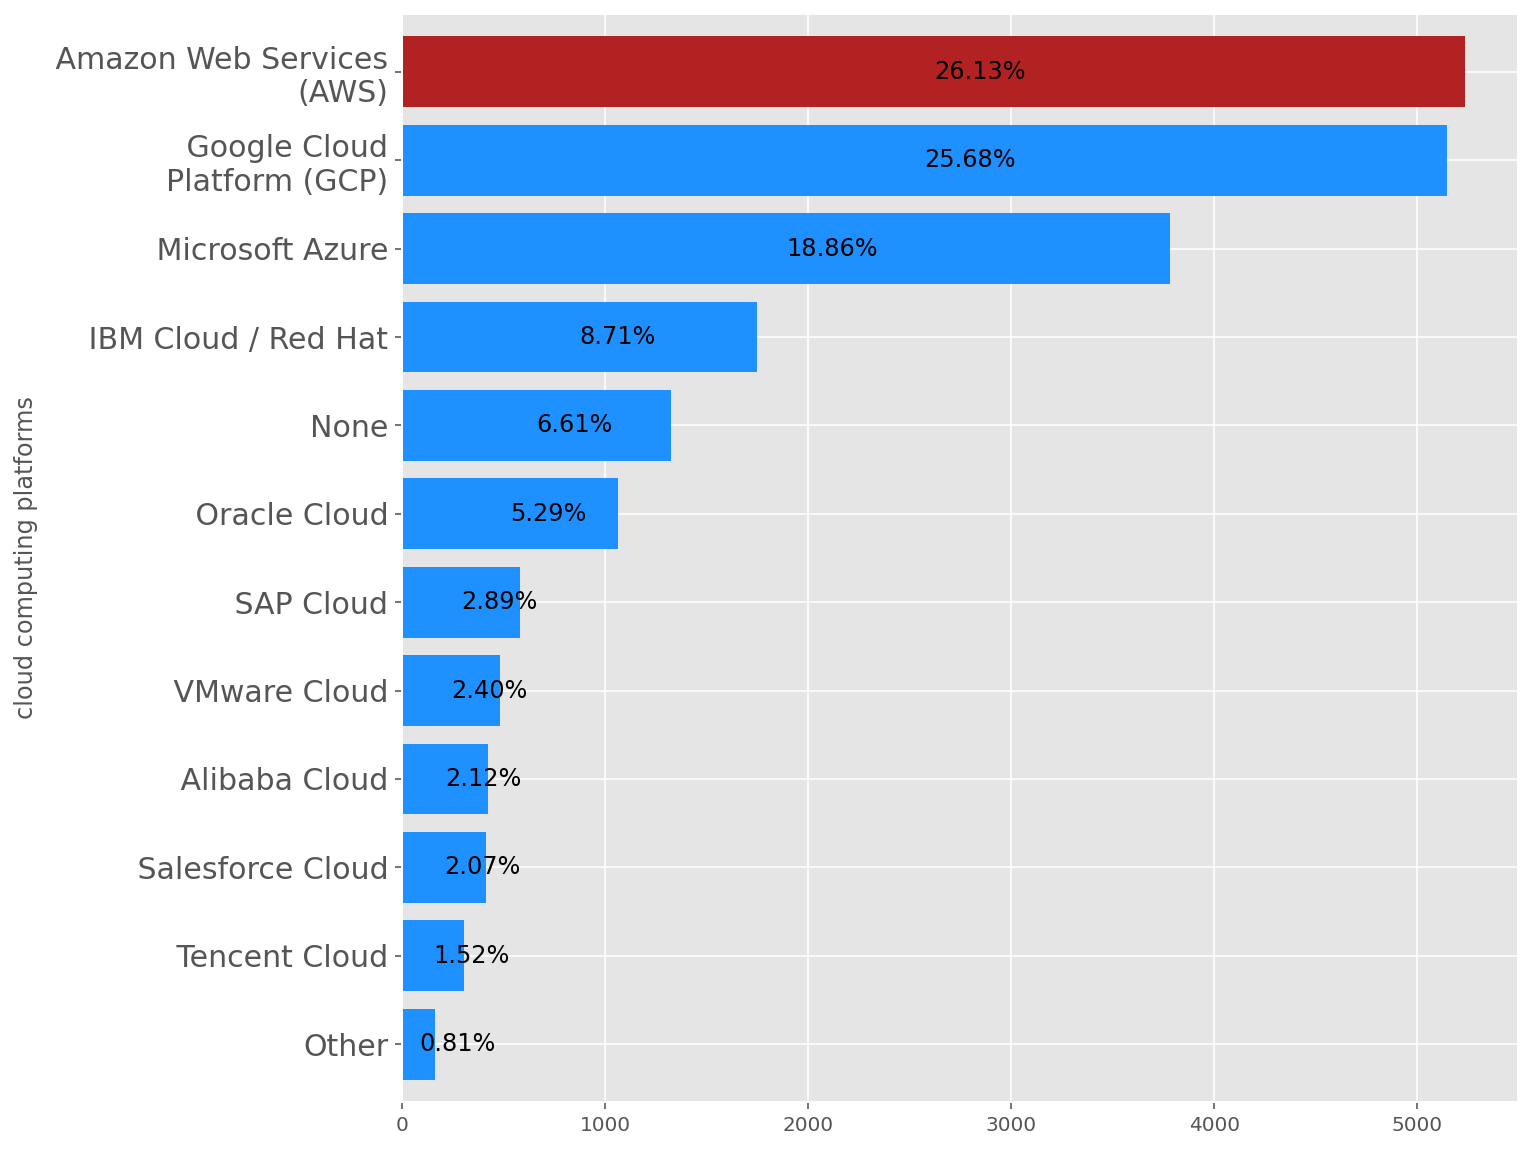

In [41]:
df = data[[i for i in data.columns if 'Q26' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q26' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('cloud computing platforms')

The most common cloud computing platforms for respondents are Amazon Web Services, Google Cloud Platform and Microsoft Azure.

<div class=h3>Cloud Computing Products</div>

Text(0, 0.5, 'cloud computing products')

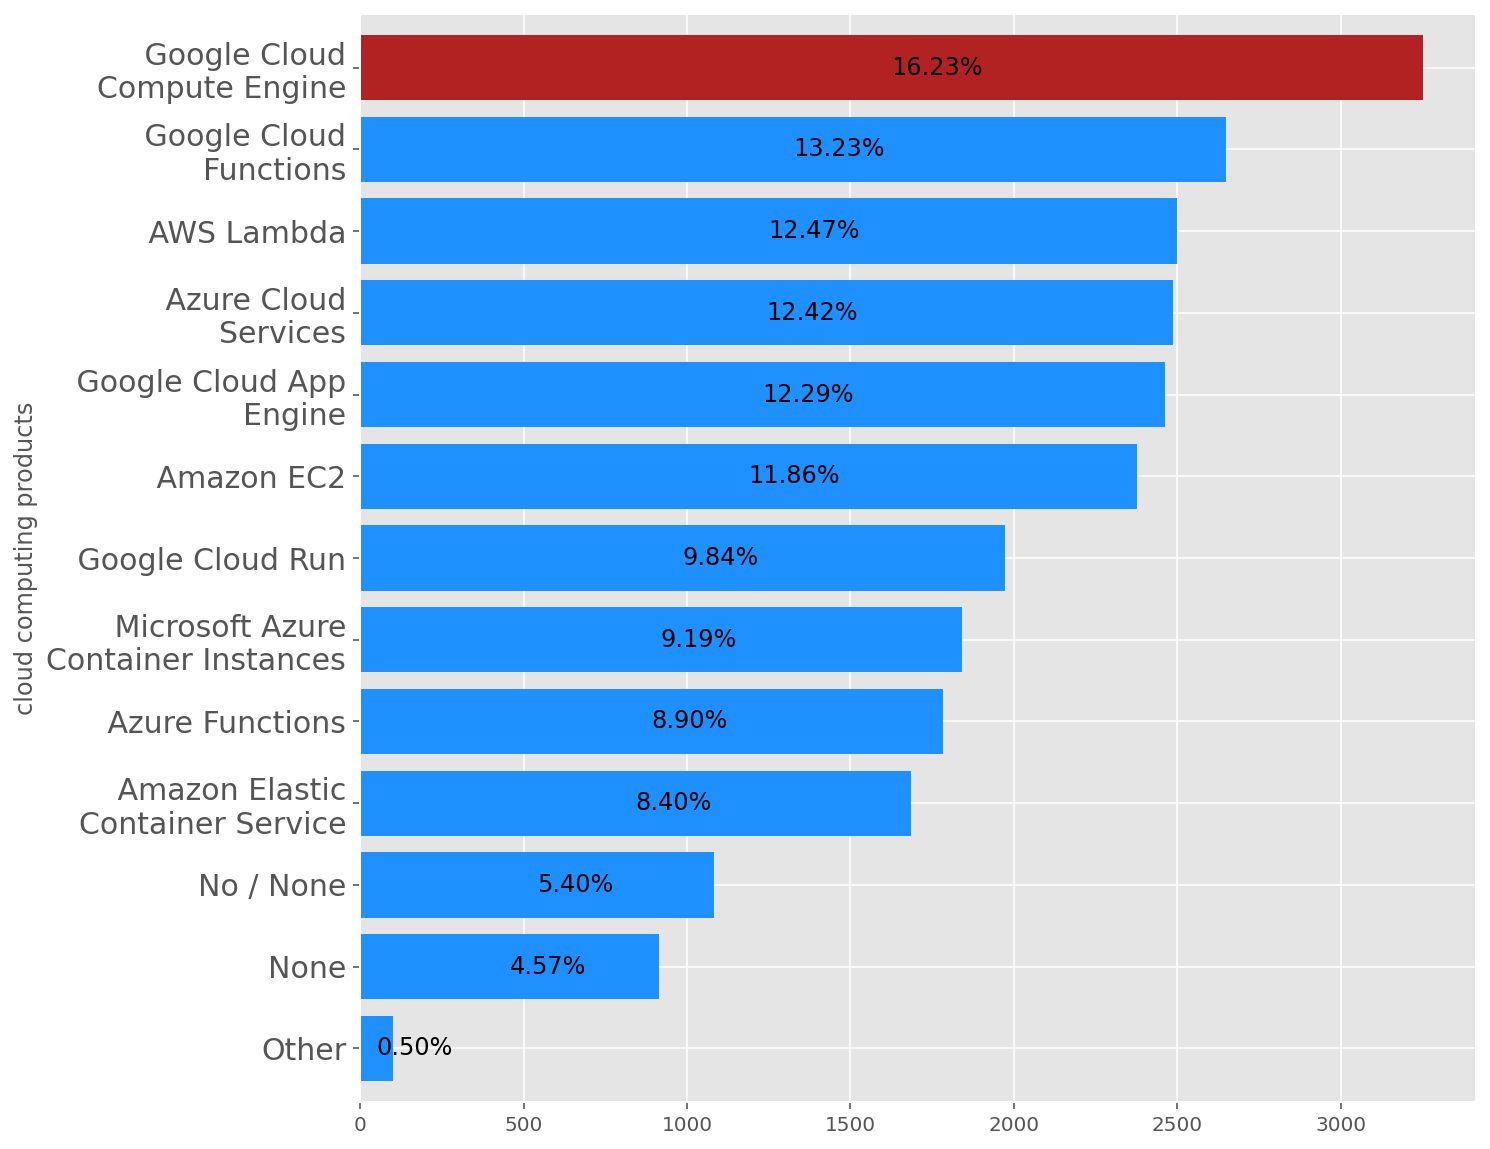

In [42]:
df = data[[i for i in data.columns if 'Q27' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q27' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('cloud computing products')

Google Cloud Compute Engine is the most used cloud computing product.

<div class=h3>Machine Learning Products</div>

Text(0, 0.5, 'ml products')

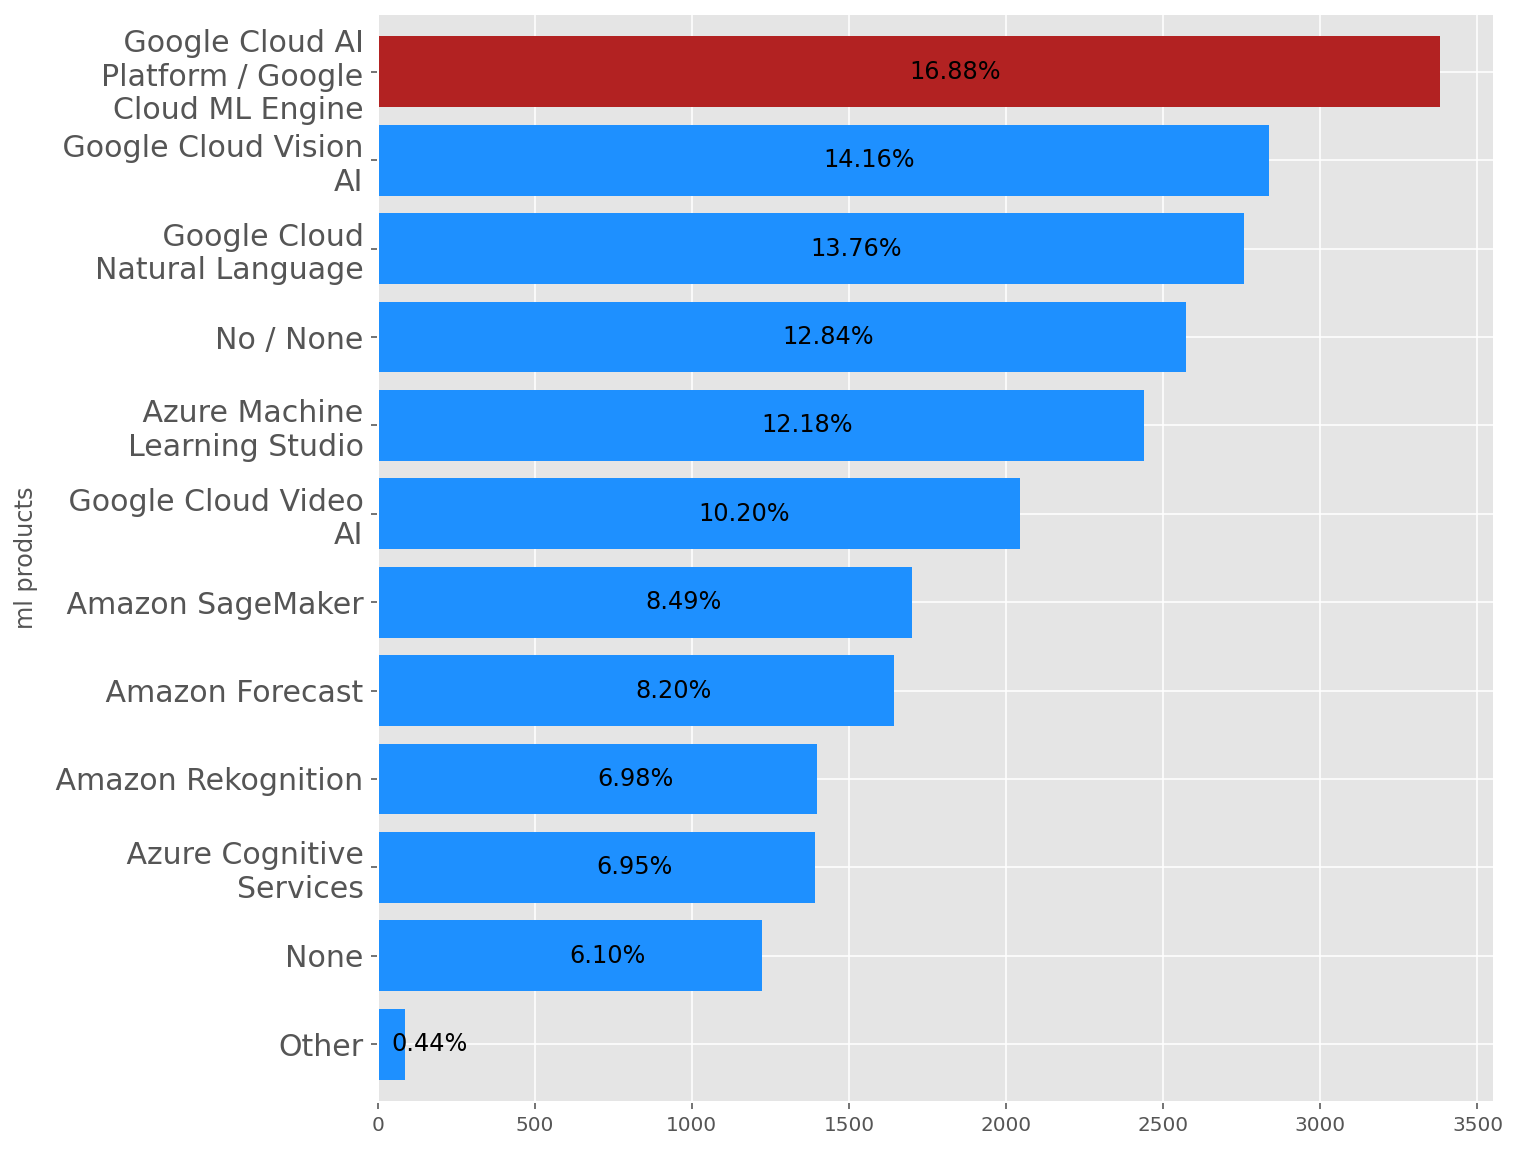

In [43]:
df = data[[i for i in data.columns if 'Q28' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q28' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('ml products')

Google Cloud AI Platform/Google Cloud ML Engine is the most broadly used of the machine learning products.

<div class=h3>Big Data Products Used on a Regular Basis</div>

Text(0, 0.5, 'big data products')

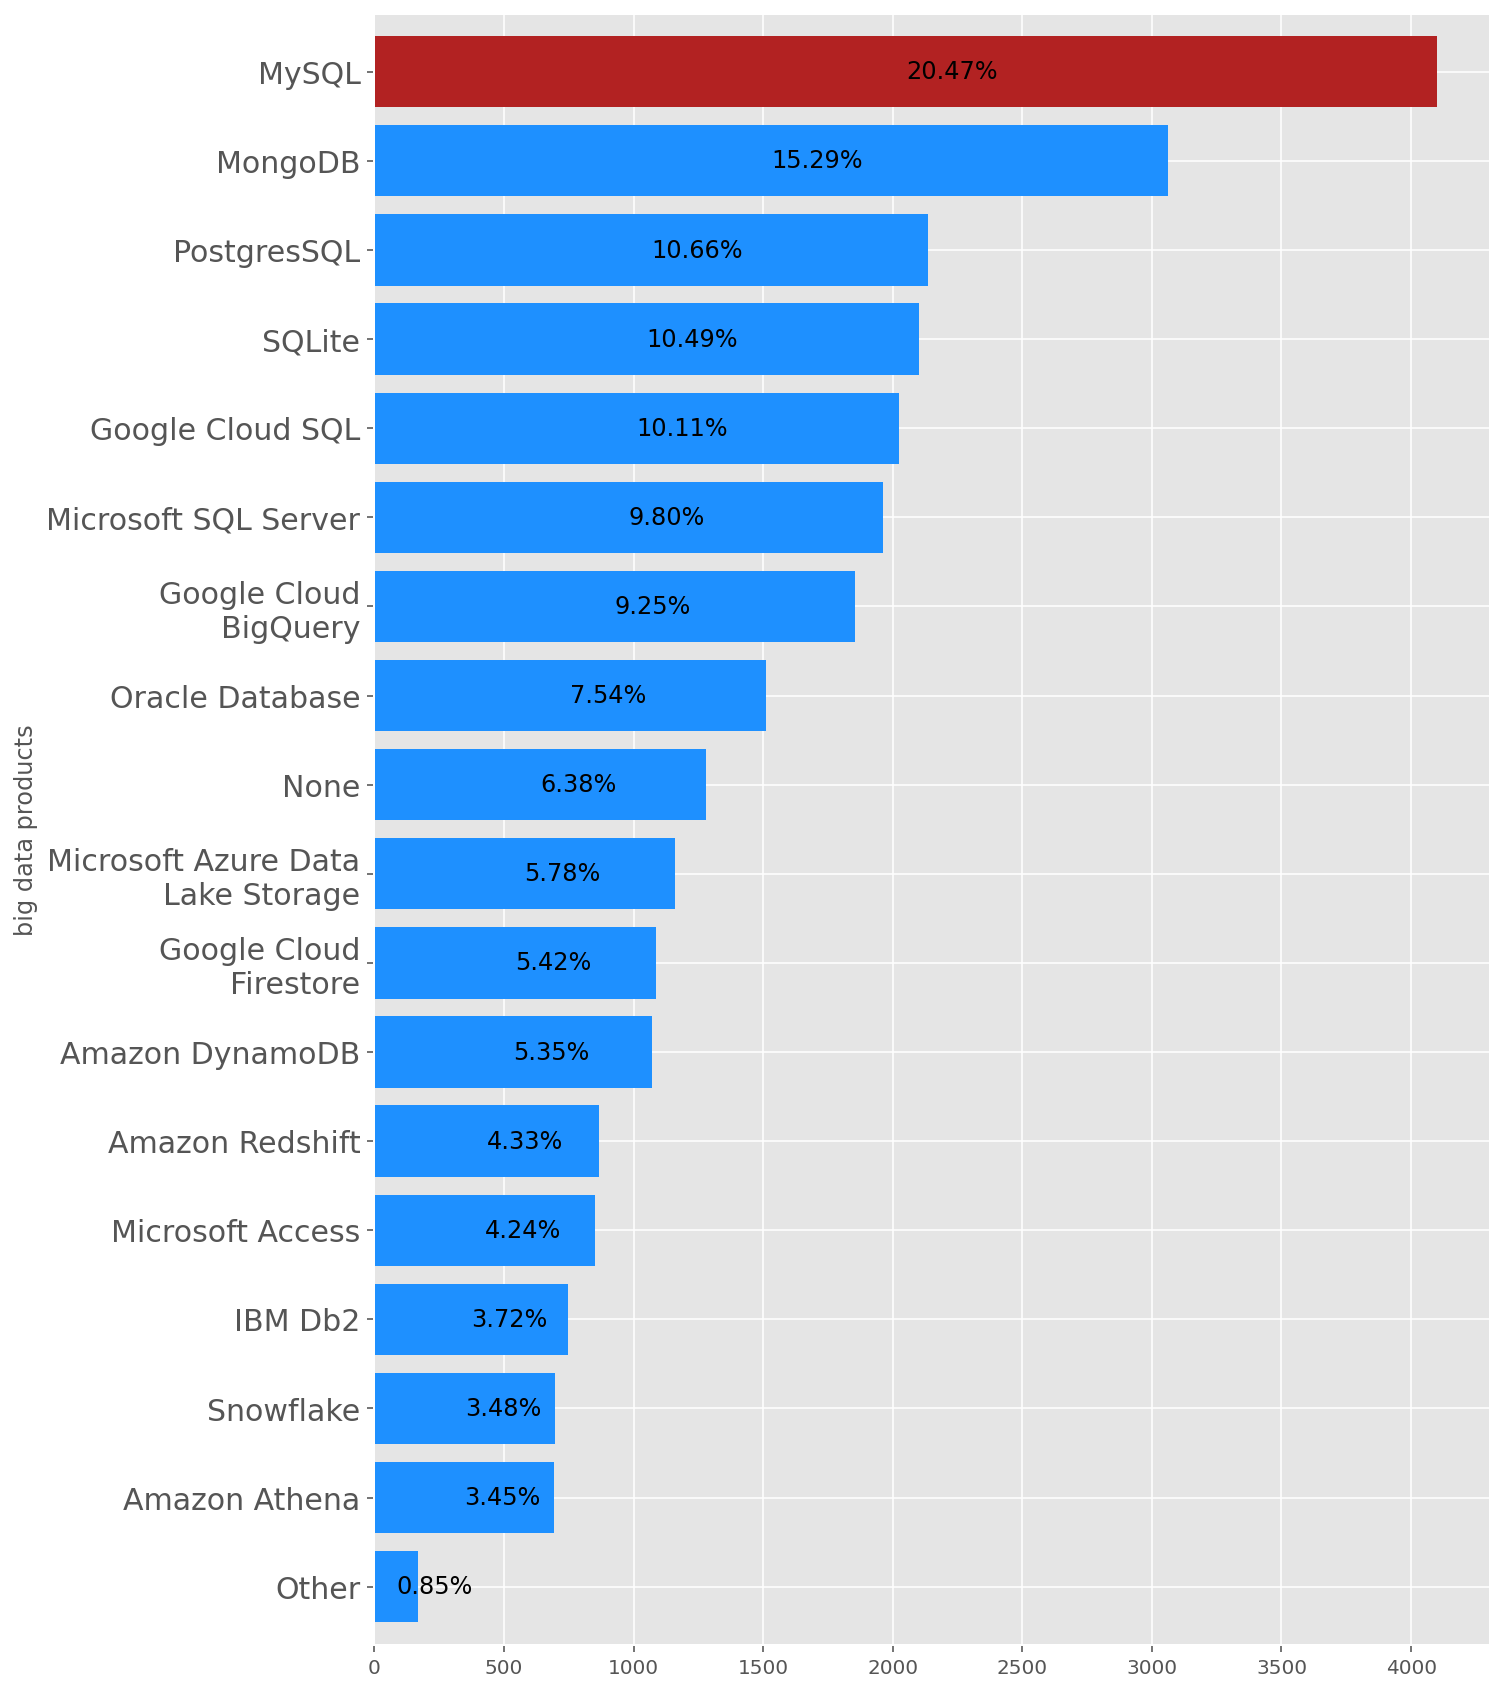

In [44]:
df = data[[i for i in data.columns if 'Q29' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 15))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q29' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('big data products')

MySQL is the most popular database used on a regular basis. MongoDB has taken the second spot.

<div class=h3>Big Data Products Used Most Often</div>

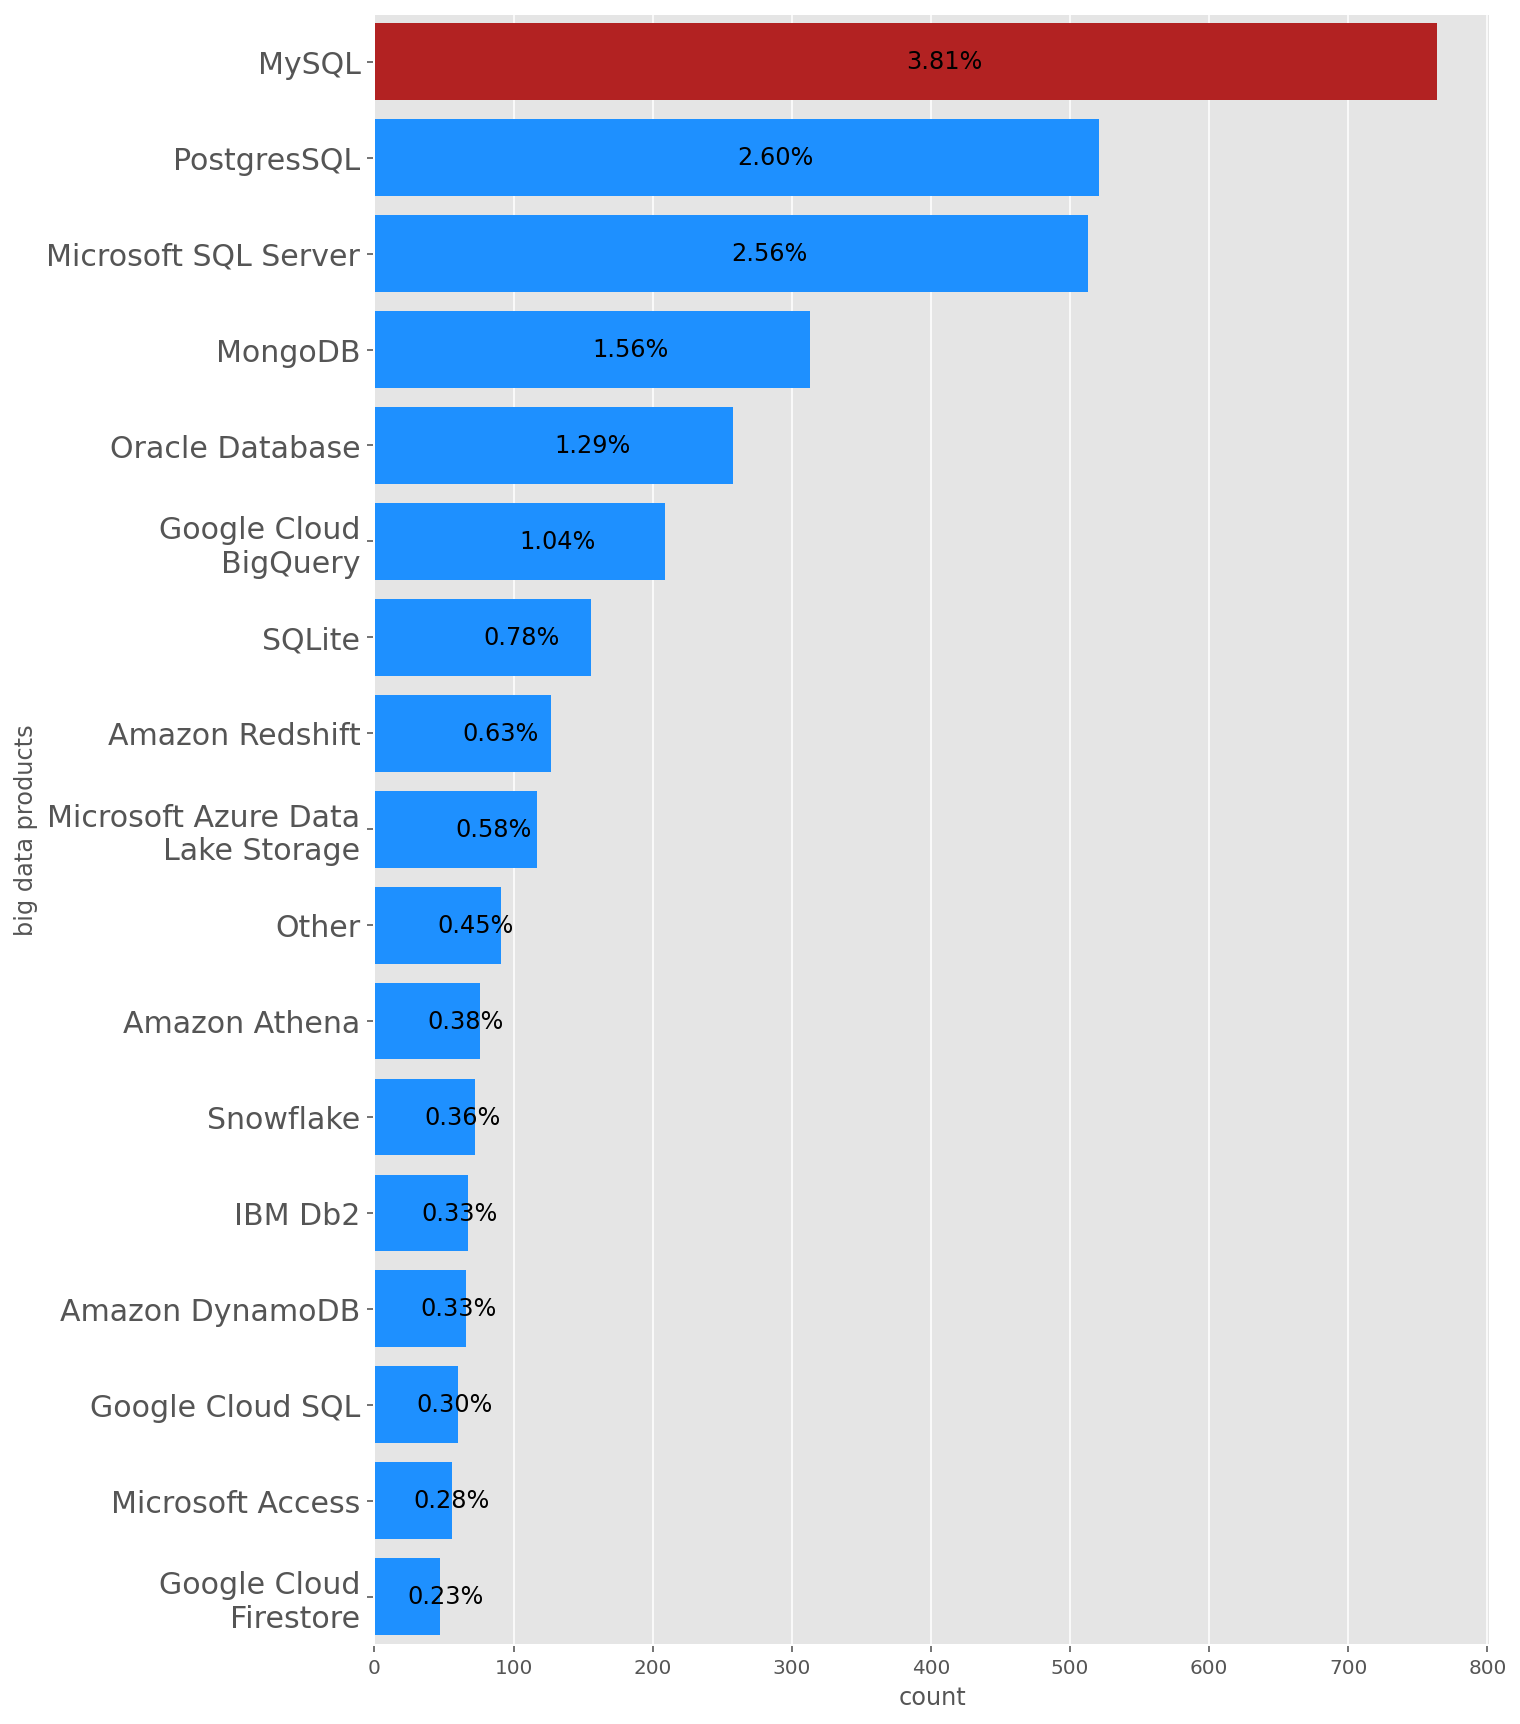

In [45]:
experience = data['Q30'].value_counts()
plt.figure(figsize=(10, 15))
color = ['dodgerblue' if (y < max(experience)) else 'firebrick' for y in experience]
ax= sns.countplot(y="Q30", data=data, order=experience.index, palette=color, saturation=1)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
plt.ylabel('big data products')
plt.yticks(fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q30'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

MySQL is the most commonly used database. PostgreSQL has taken the second spot, edging ahead of Microsoft SQL Server.

<div class=h3>Business Intelligence Tools Used on a Regular Basis</div>

Text(0, 0.5, 'business ntelligence tools')

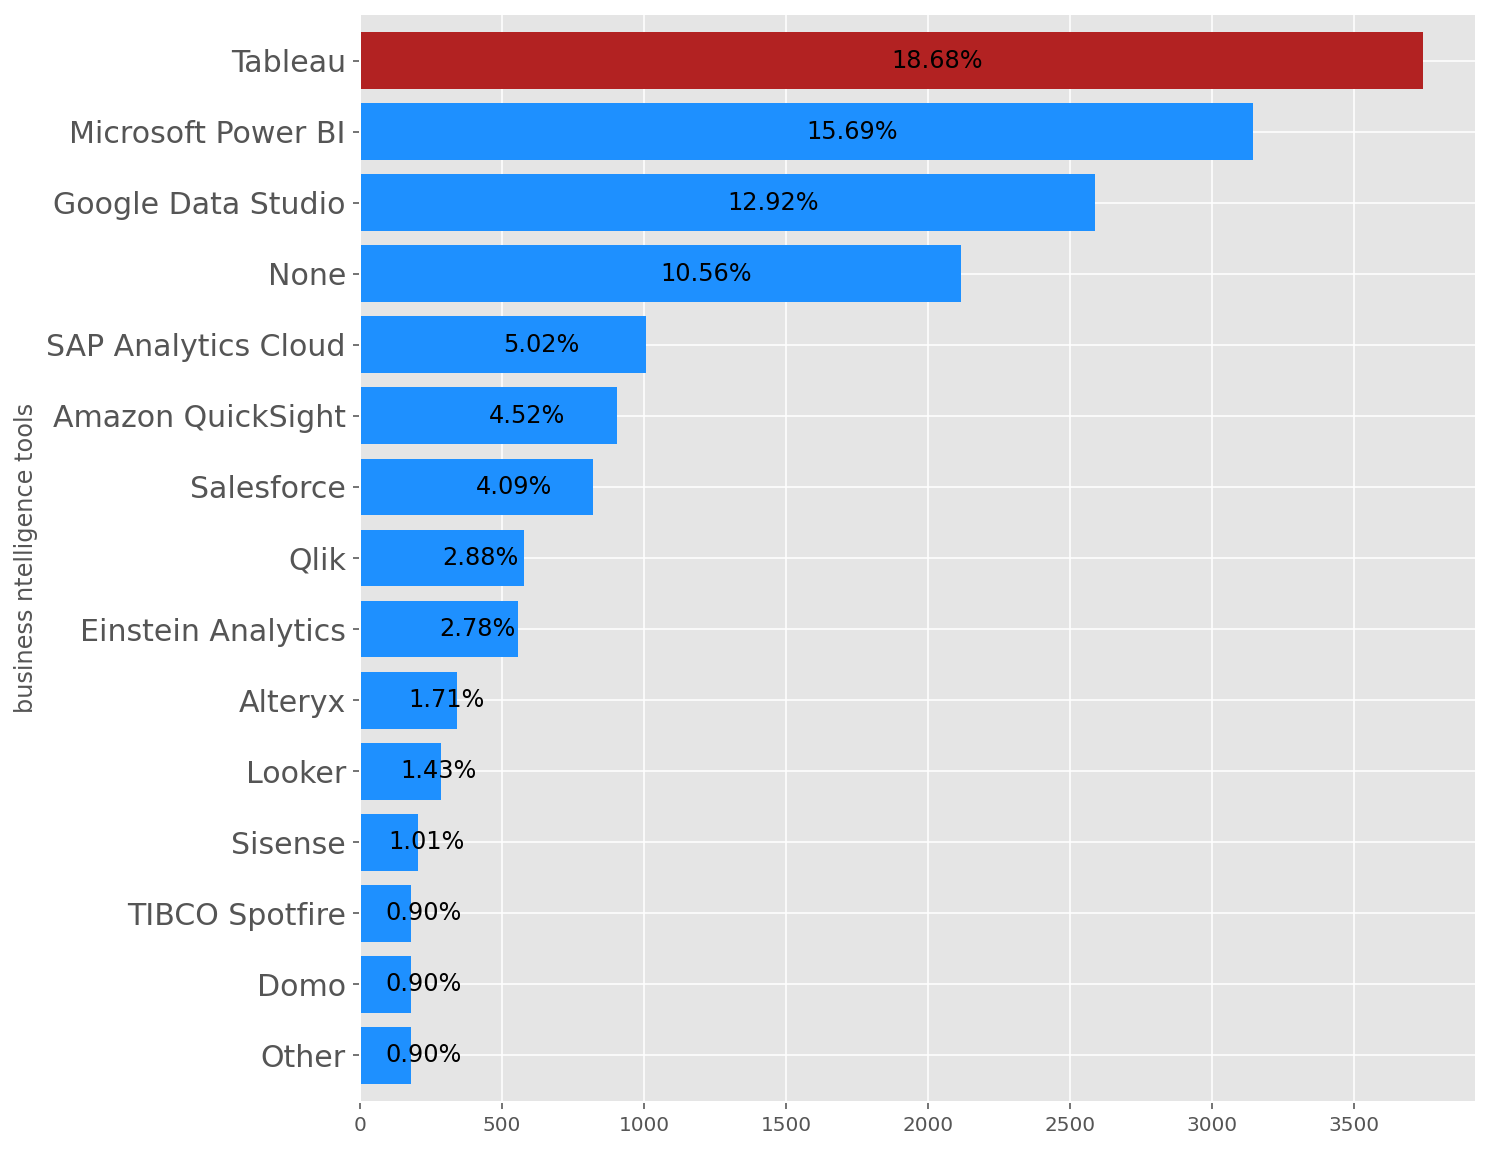

In [46]:
df = data[[i for i in data.columns if 'Q31' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q31' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('business ntelligence tools')

About 19% of respondents use Tableau on a regular basis, and about 16% use Microsoft Power BI.

<div class=h3>Business Intelligence Tools Used Most Often</div>

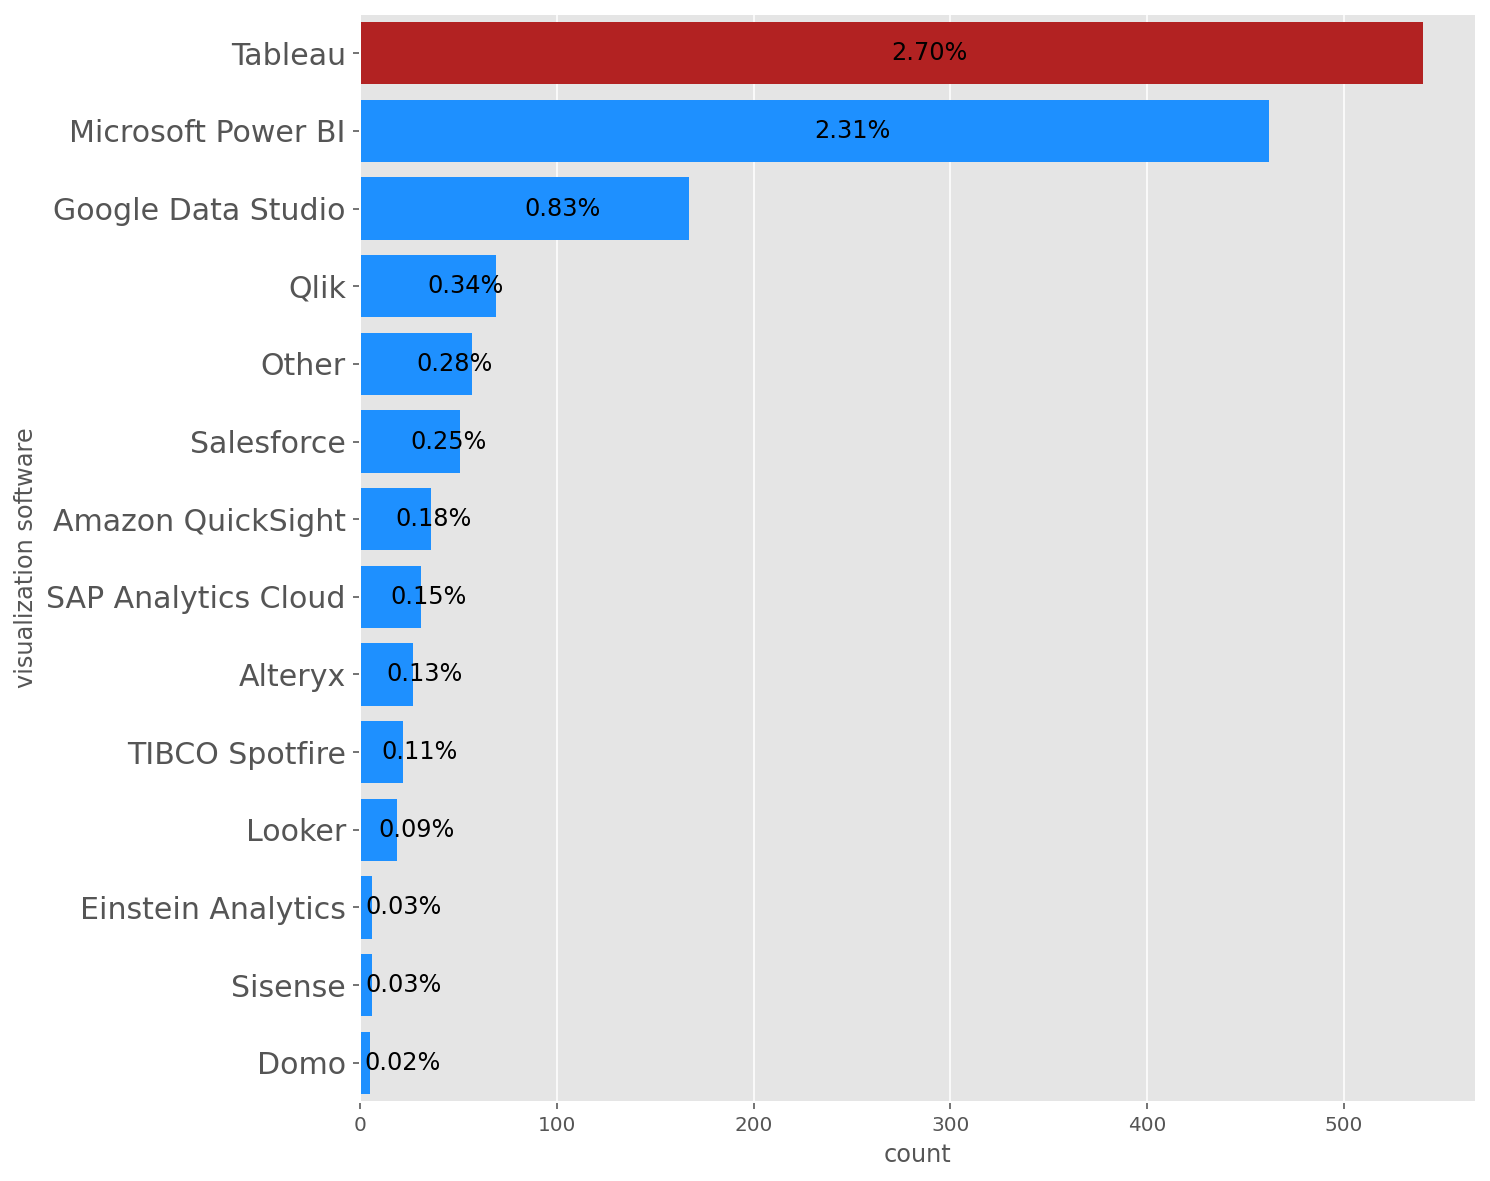

In [47]:
experience = data['Q32'].value_counts()
plt.figure(figsize=(10, 10))
color = ['dodgerblue' if (y < max(experience)) else 'firebrick' for y in experience]
ax= sns.countplot(y="Q32", data=data, order=experience.index, palette=color, saturation=1)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
plt.ylabel('visualization software')
plt.yticks(fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q32'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

Tableau and Microsoft Power BI are business iintelligence tools that are also used most often.

<div class=h3>Atomated Machine Learning Tools</div>

Text(0, 0.5, 'automated ml tools')

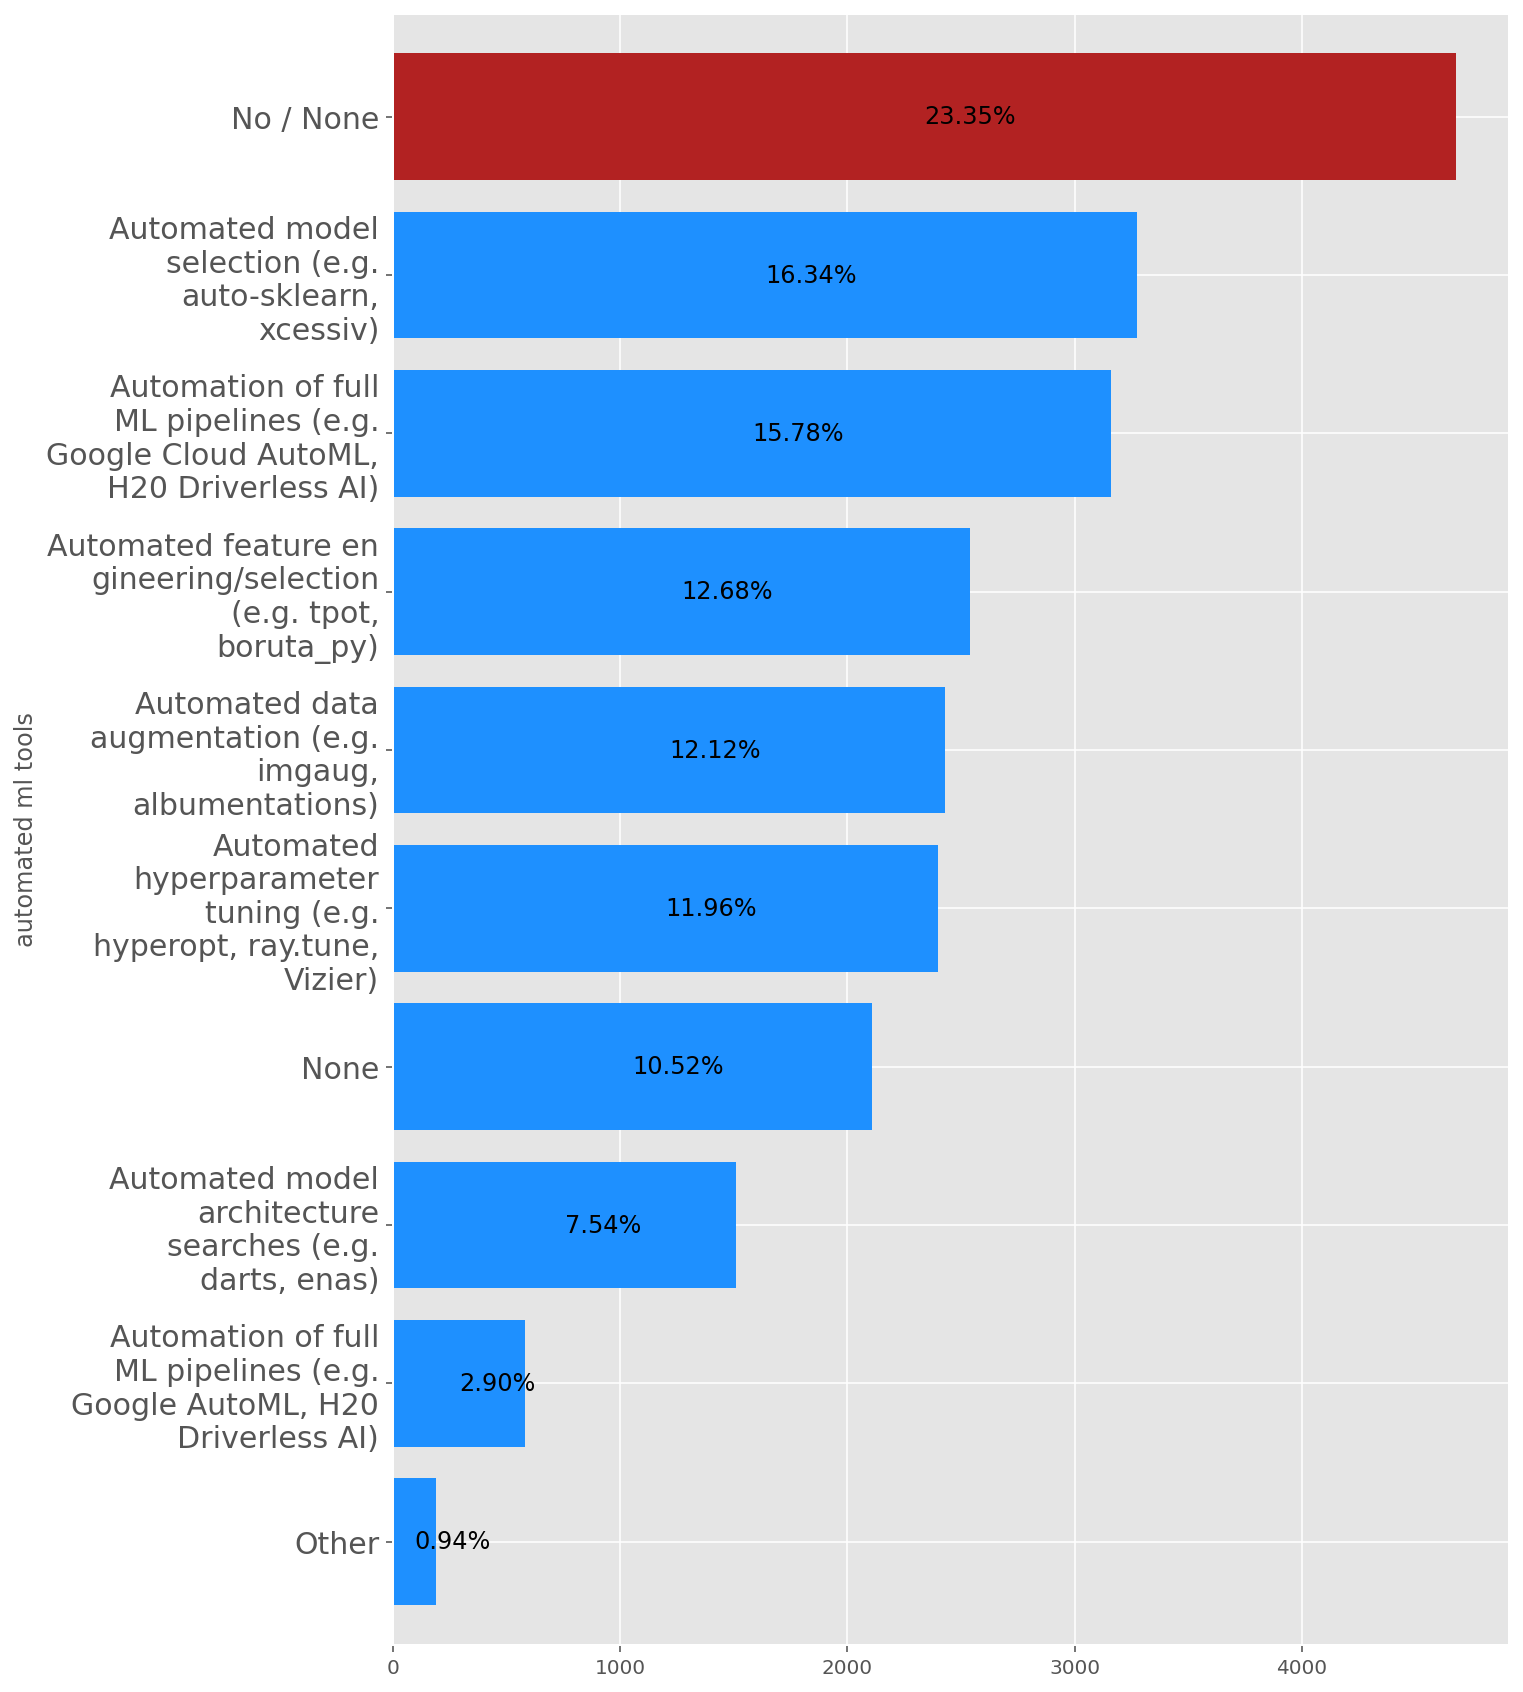

In [48]:
df = data[[i for i in data.columns if 'Q33' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 15))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q33' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('automated ml tools')

Most respondents on the survey say they are not using any automated machine learning tools, and the most common used are Automated model selection and Automation of full ML pipelines.

<div class=h3>Automated Machine Learning Tools Used on a Regular Basis</div>

Text(0, 0.5, 'automated ml tools')

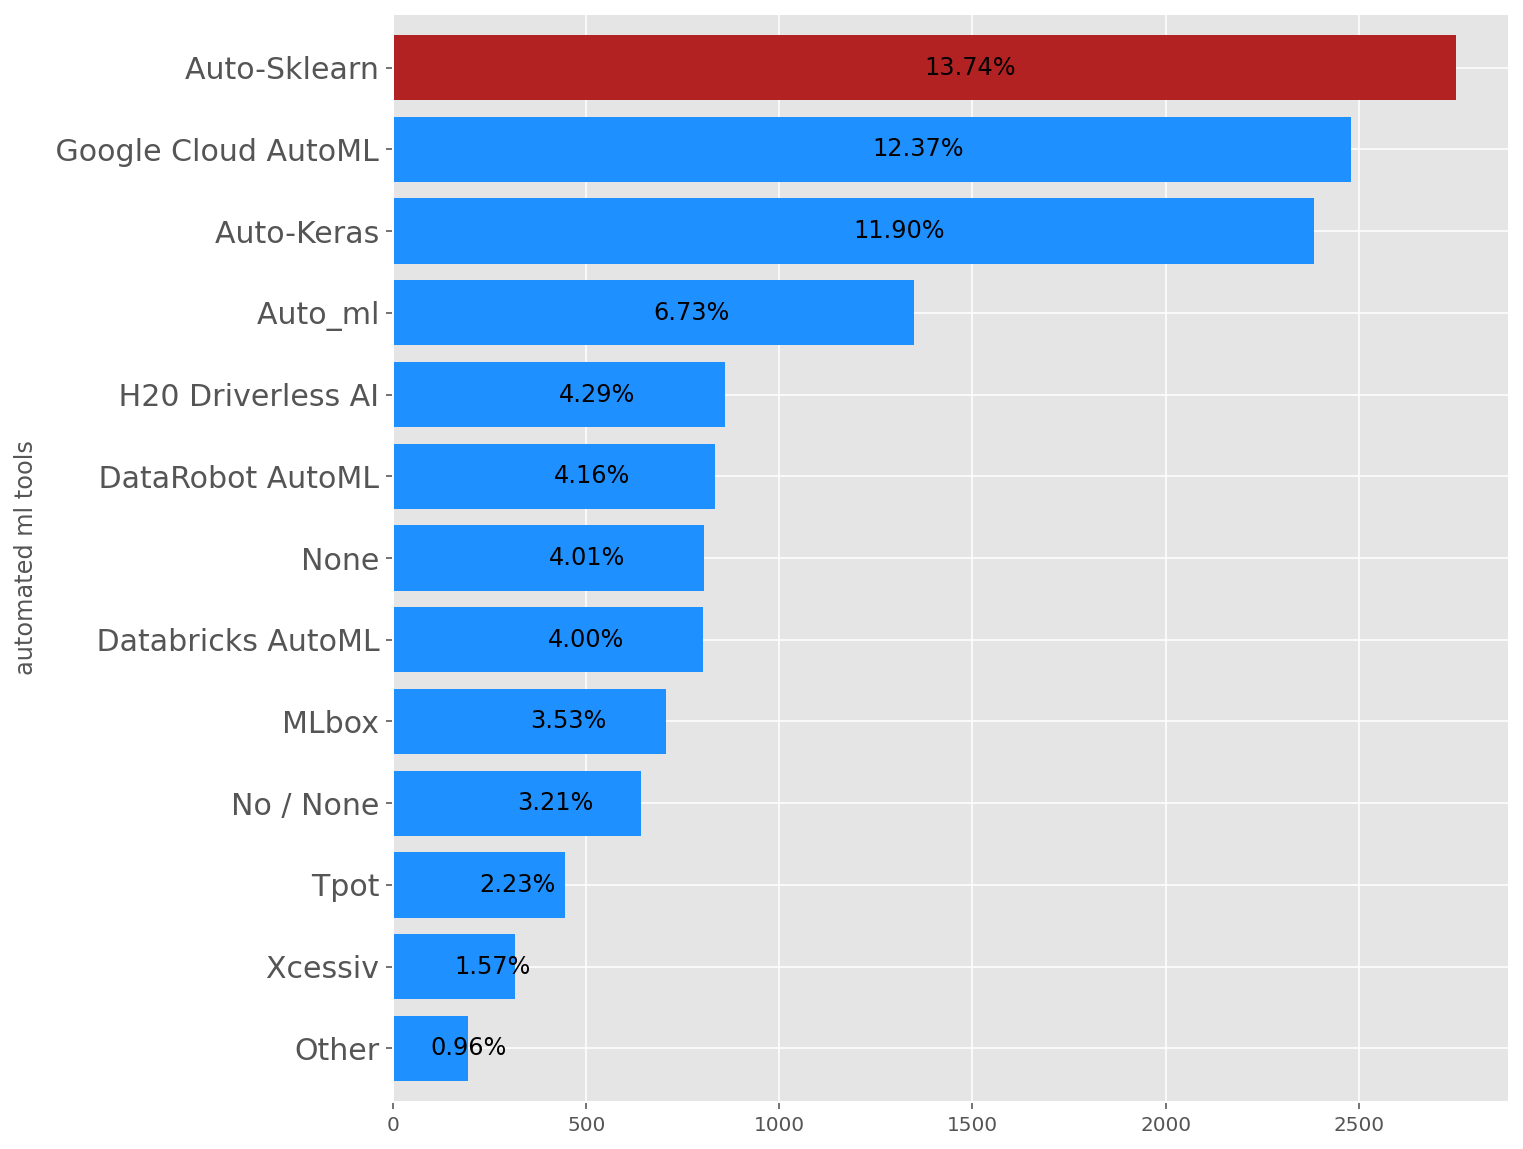

In [49]:
df = data[[i for i in data.columns if 'Q34' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q34' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('automated ml tools')

Auto-Sklearn, Google Cloud AutoML and Auto-Keras are the most commonly used automated ML tools.

<div class=h3>Tools to Help Machine Learning Experiments</div>

Text(0, 0.5, 'tools for ml experiments')

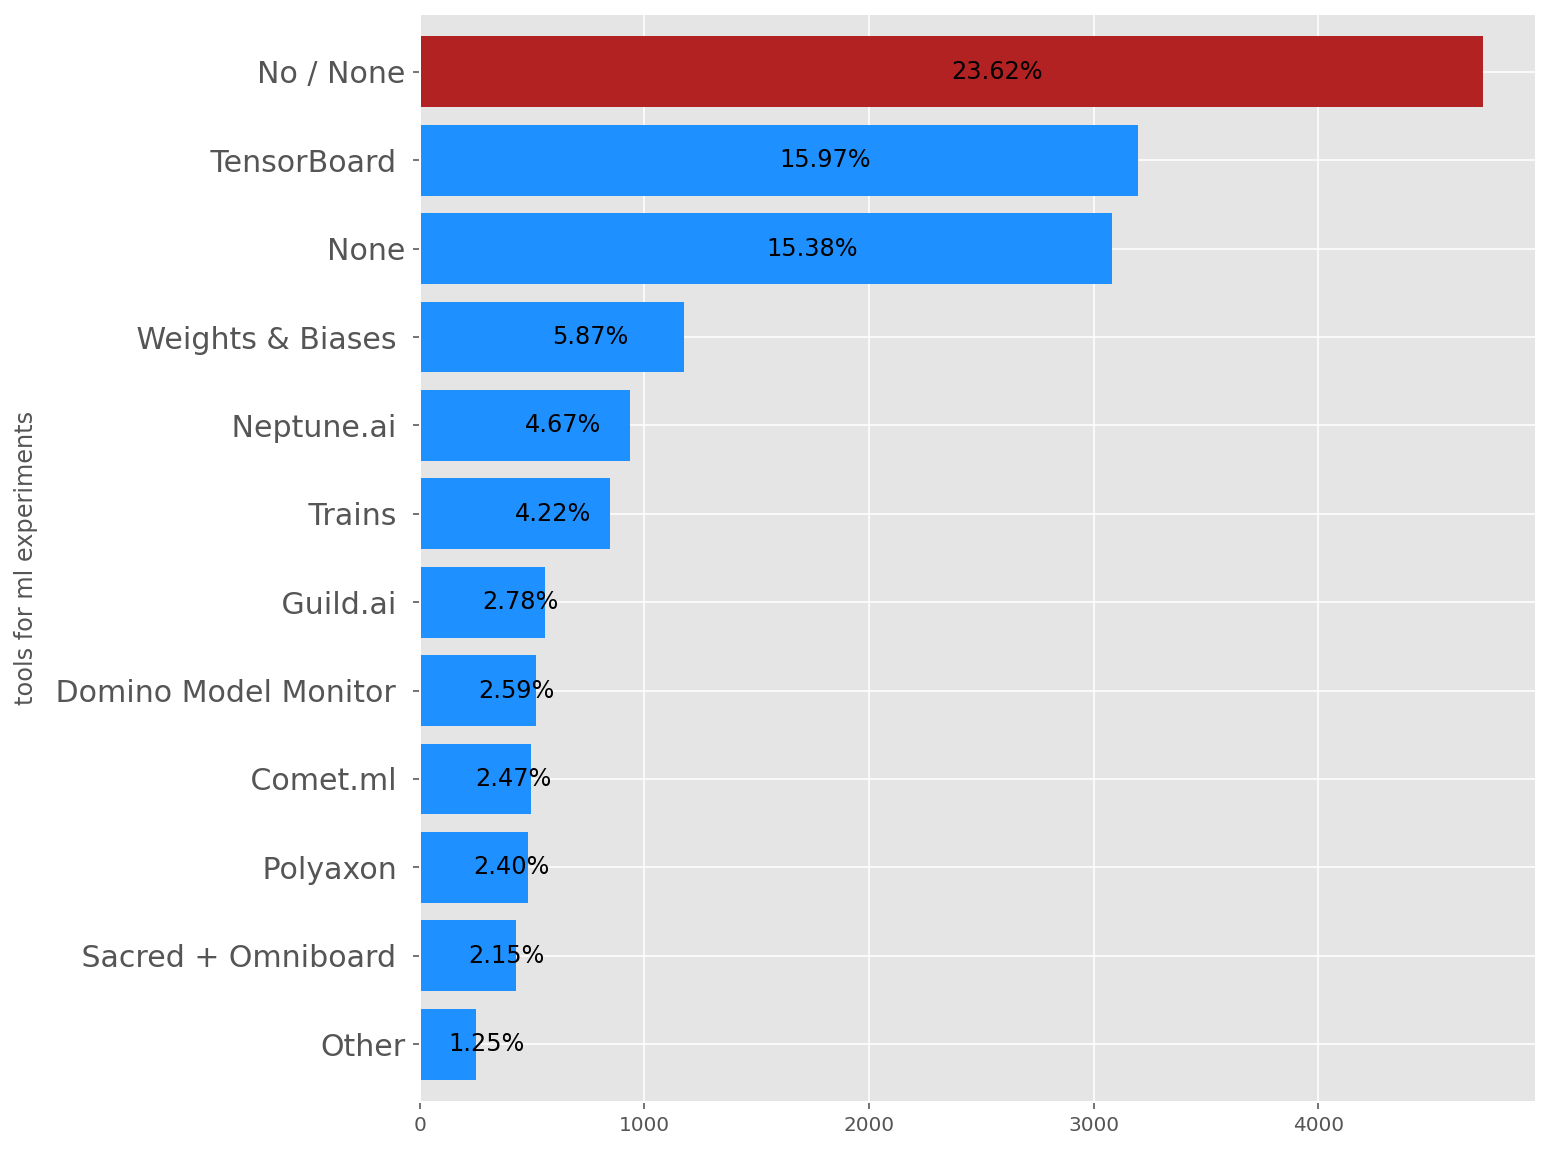

In [50]:
df = data[[i for i in data.columns if 'Q35' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q35' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('tools for ml experiments')

About 40% of respondents do not use any tools to help ML experiments.

<div class=h3>Platforms to Share Applications</div>

Text(0, 0.5, 'platforms to share apps')

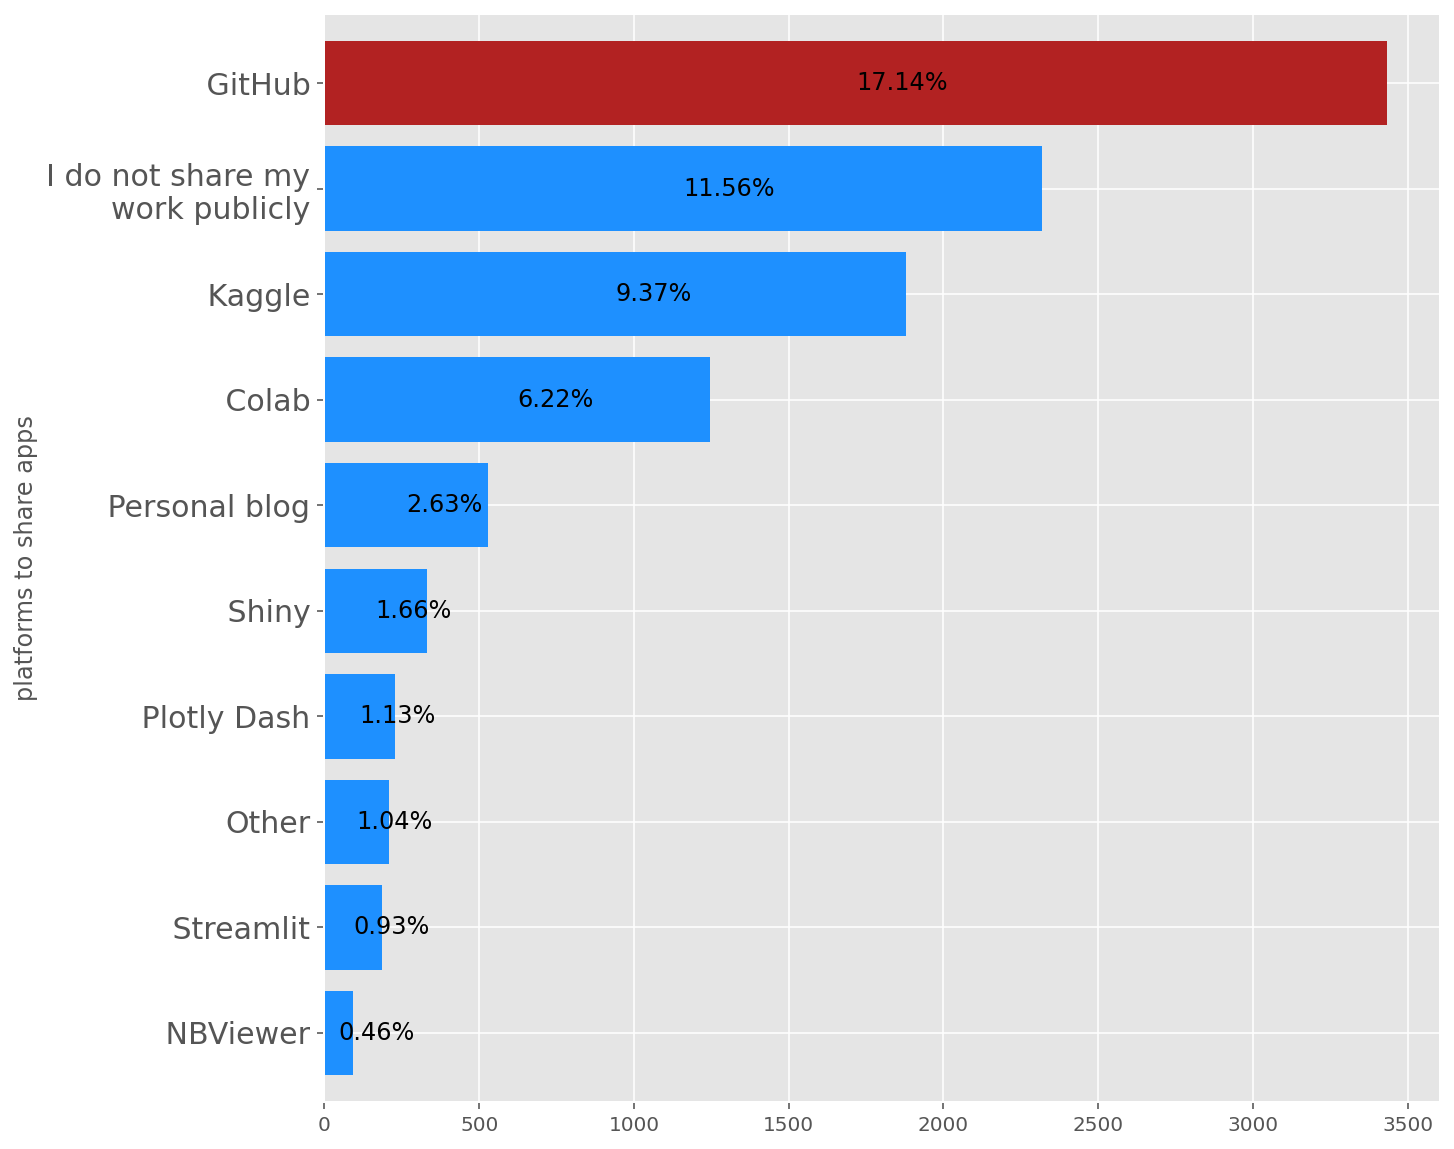

In [51]:
df = data[[i for i in data.columns if 'Q36' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 10))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q36' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('platforms to share apps')

Respondents were asked what social platforms they use to share or deploy their data analysis or machine learning applications, and Github was the most common answer.

<div class=h3>Platforms for Data Science Courses</div>

Text(0, 0.5, 'platforms for courses')

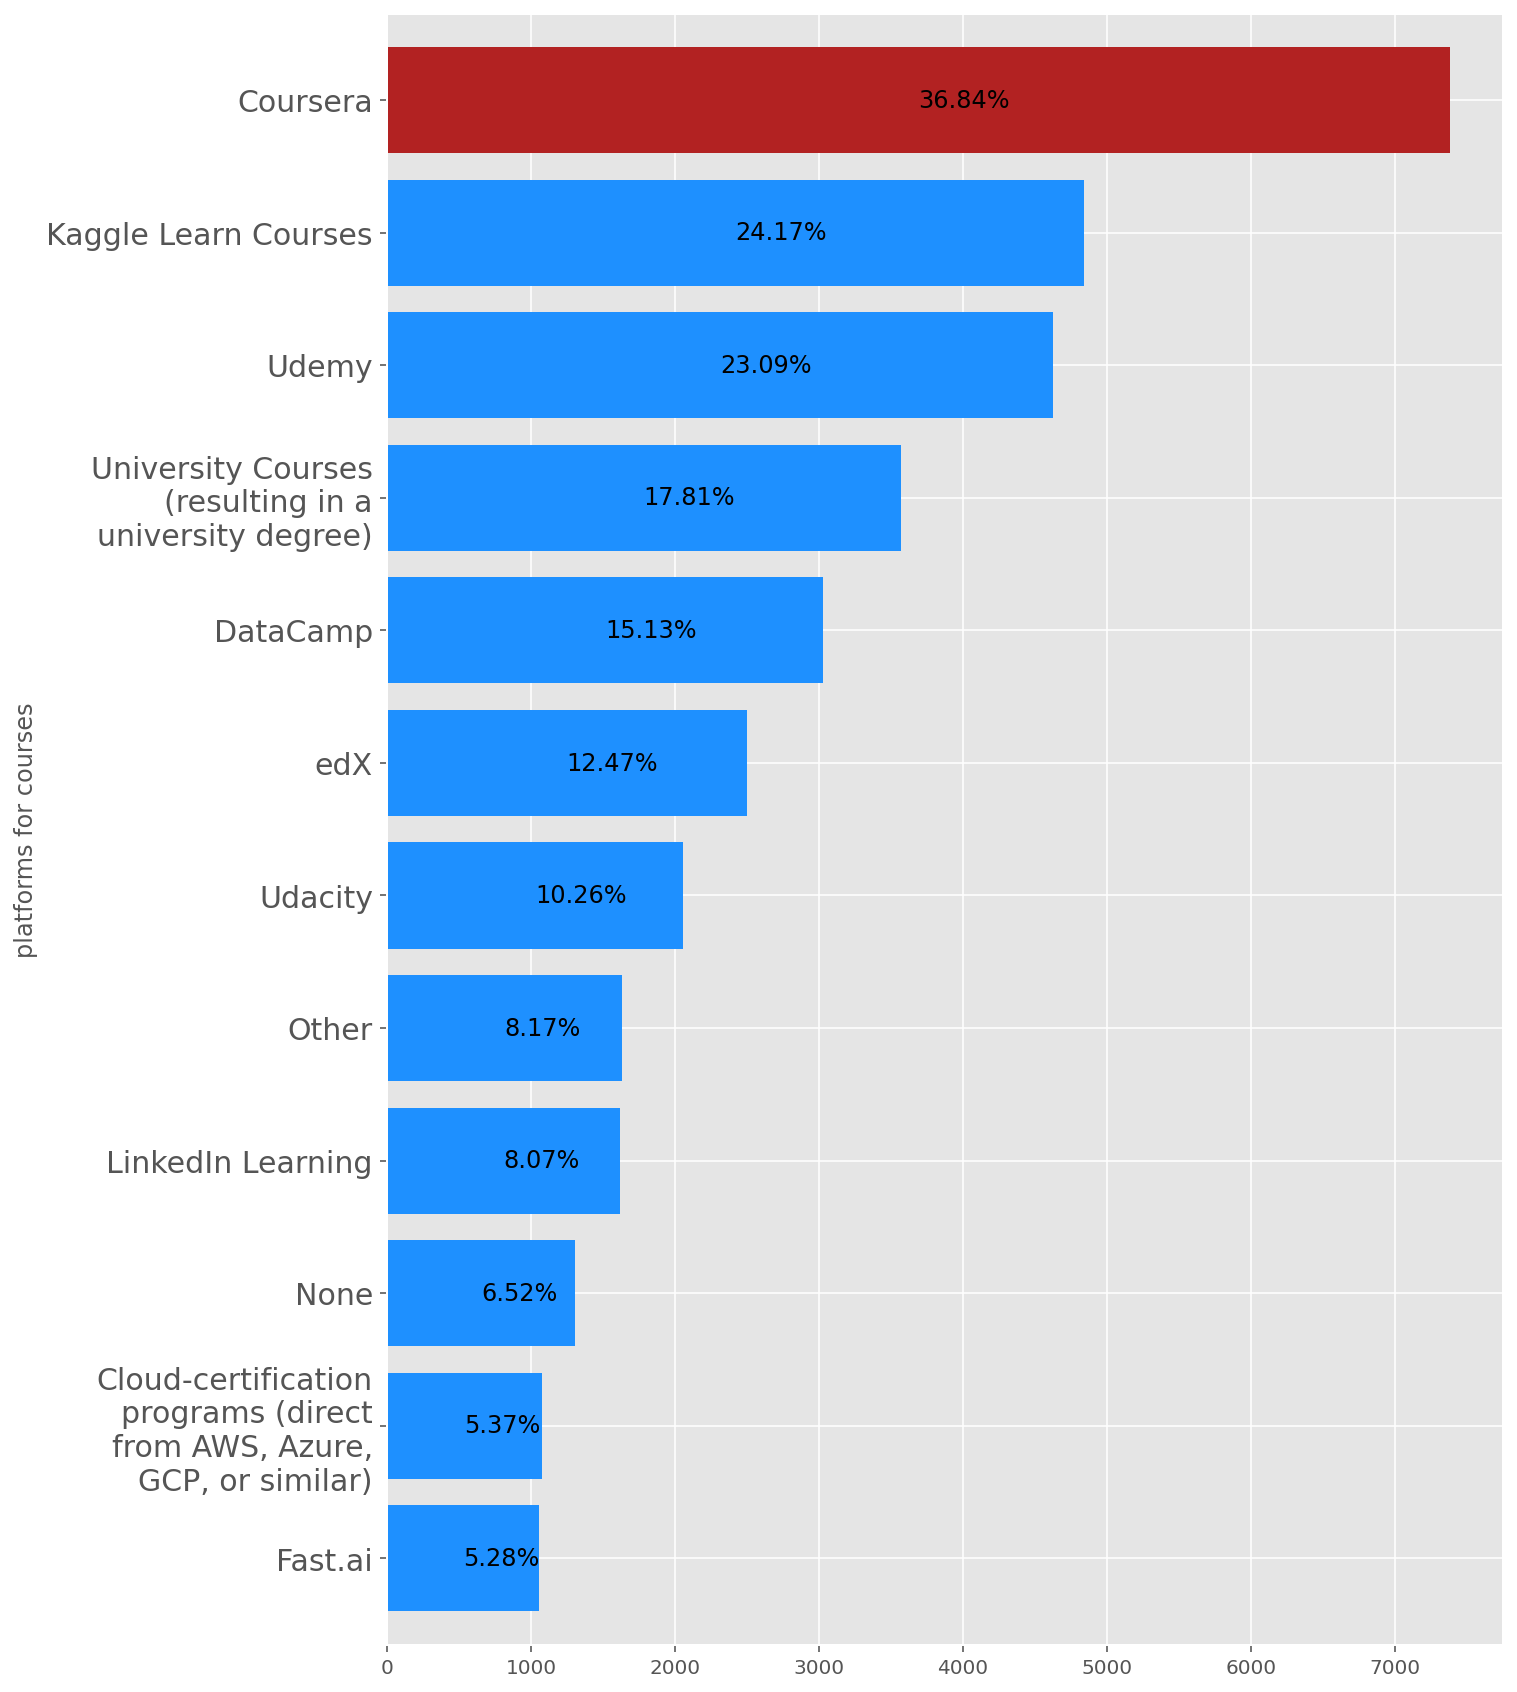

In [52]:
df = data[[i for i in data.columns if 'Q37' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 15))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q37' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('platforms for courses')

There are many online platforms people use to learn Data Science. The most common choices this year for respondents were Coursera, Kaggle Learn Courses and Udemy.

<div class=h3>Primary Tools at Work</div>

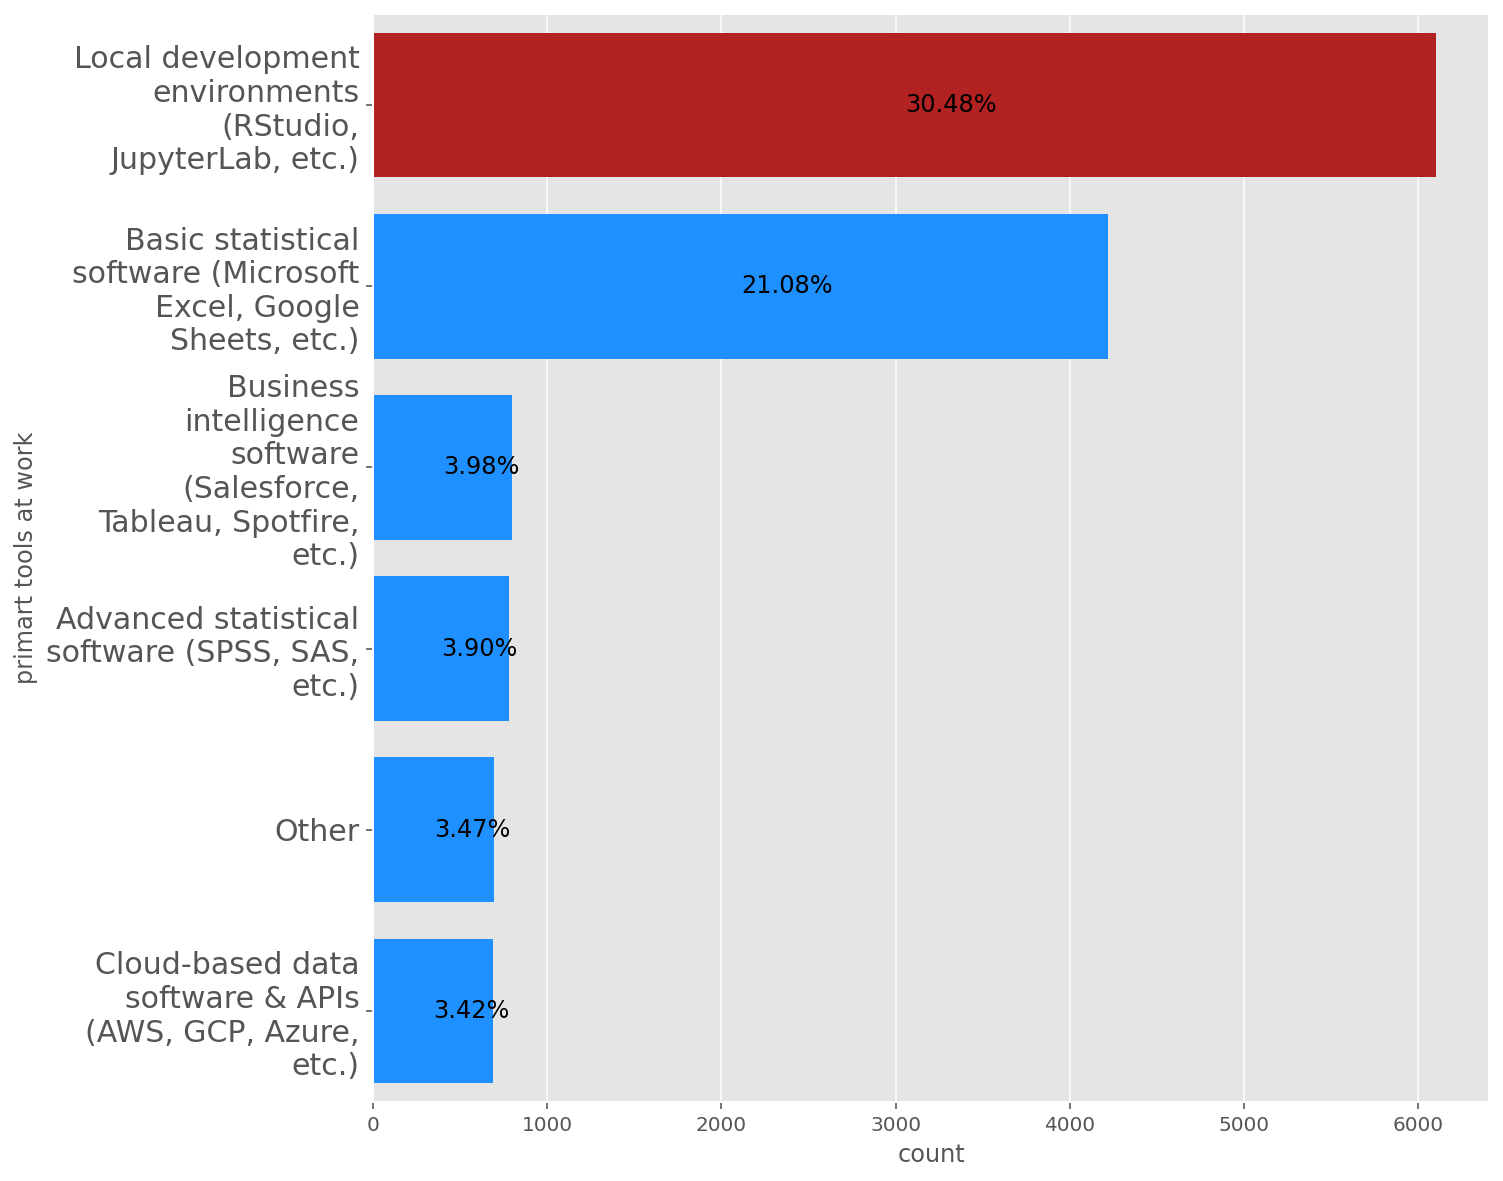

In [53]:
experience = data['Q38'].value_counts()
plt.figure(figsize=(10, 10))
color = ['dodgerblue' if (y < max(experience)) else 'firebrick' for y in experience]
ax= sns.countplot(y="Q38", data=data, order=experience.index, palette=color, saturation=1)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
plt.ylabel('primart tools at work')
plt.yticks(fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q38'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

Over half of respondents use local development environment and basic statistical software as primary tools at work.

<div class=h3>Favorite Data Science Media Sources</div>

Text(0, 0.5, 'favorite media sources')

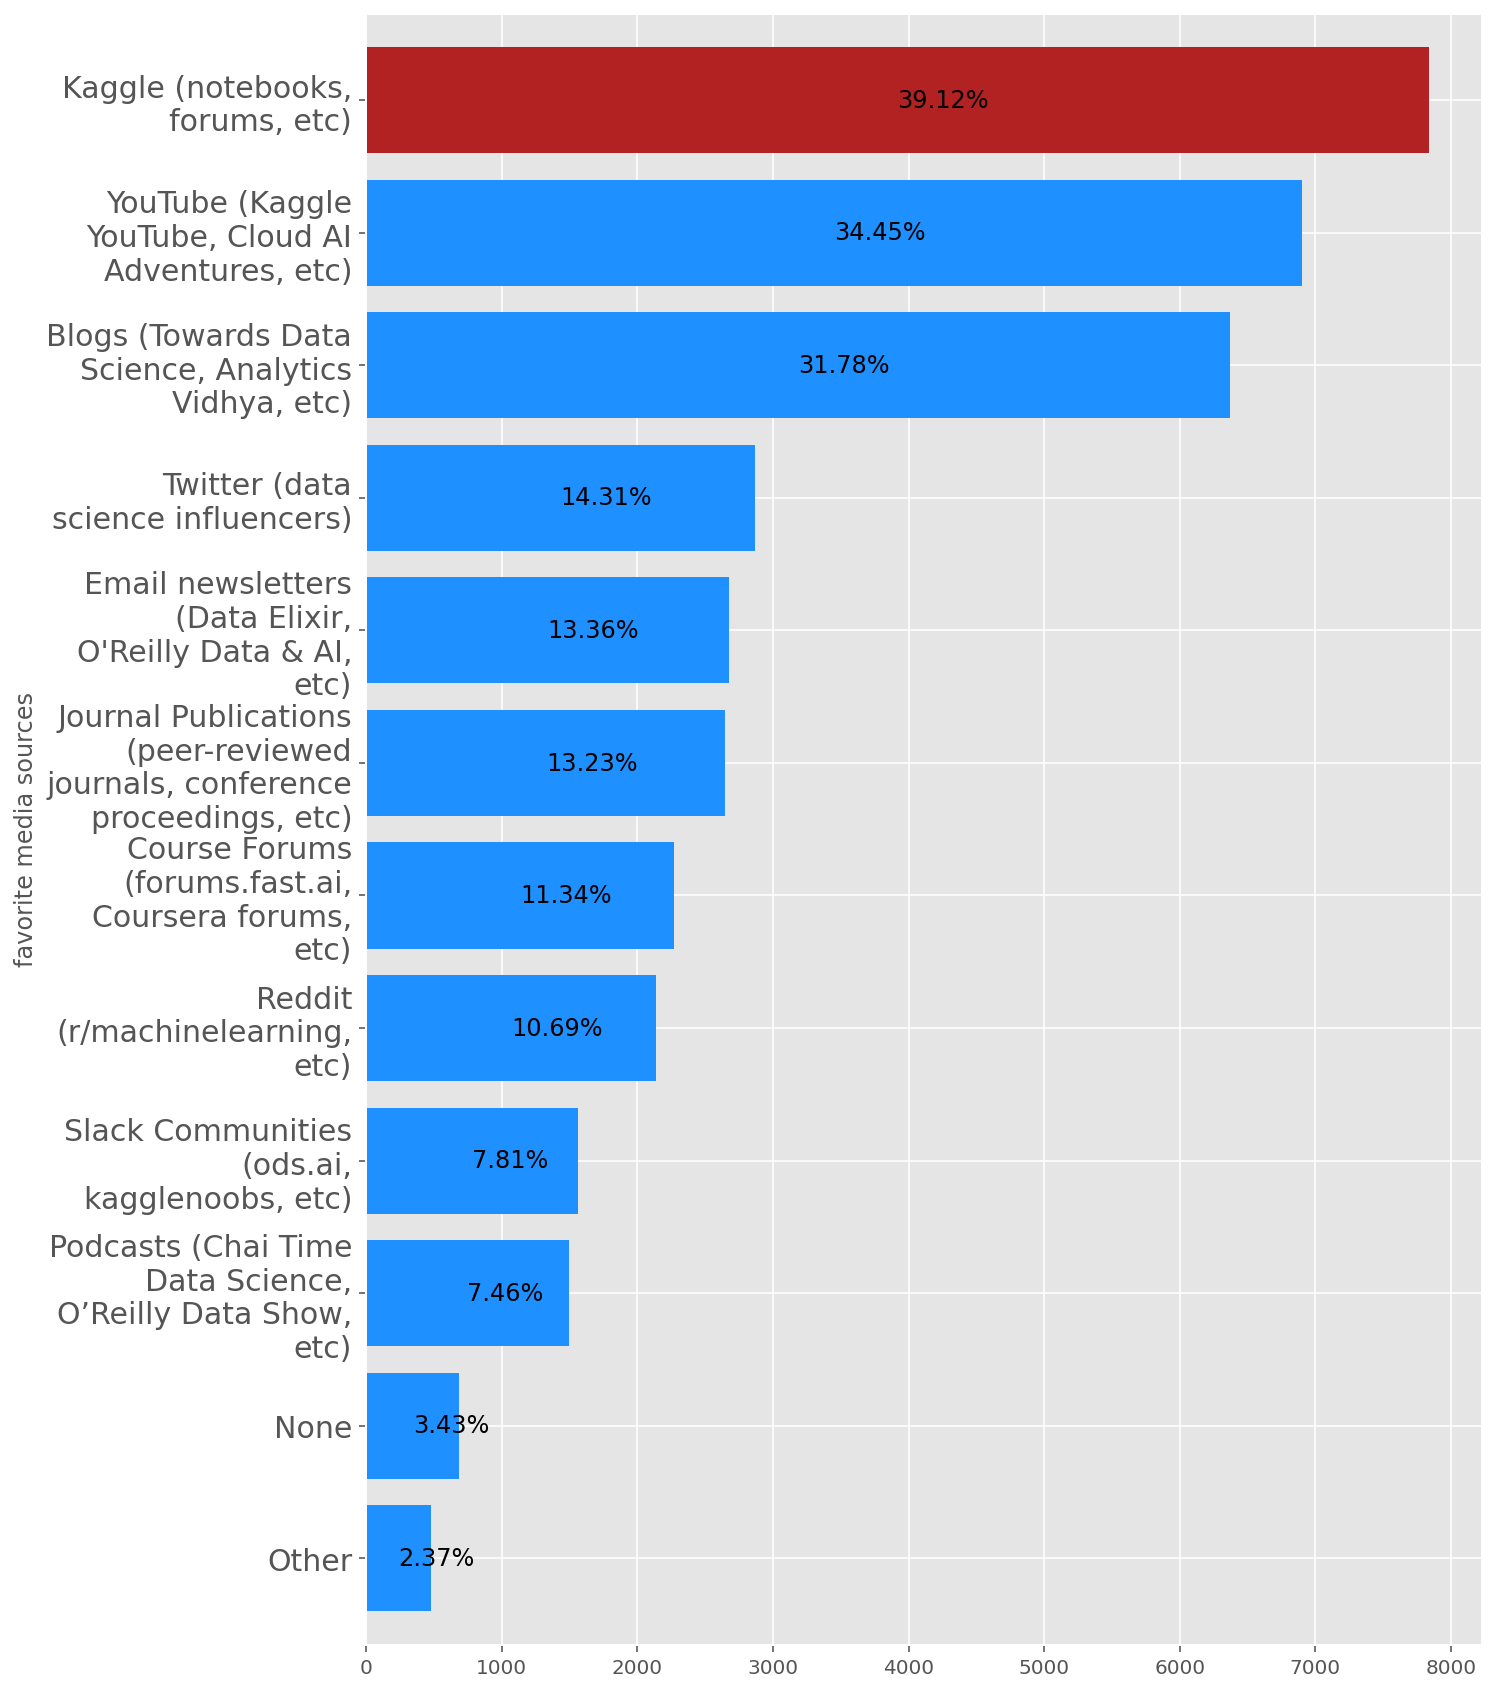

In [54]:
df = data[[i for i in data.columns if 'Q39' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 15))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q39' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('favorite media sources')

Kaggle is the most loved Data Science media source among respondents, followed close behind by Youtube and blogs. Podcasts and Slack communities are the the least loved Data Science media sources.

<div class=h2>Company Information</div>

<div class=h3>Company Size</div>

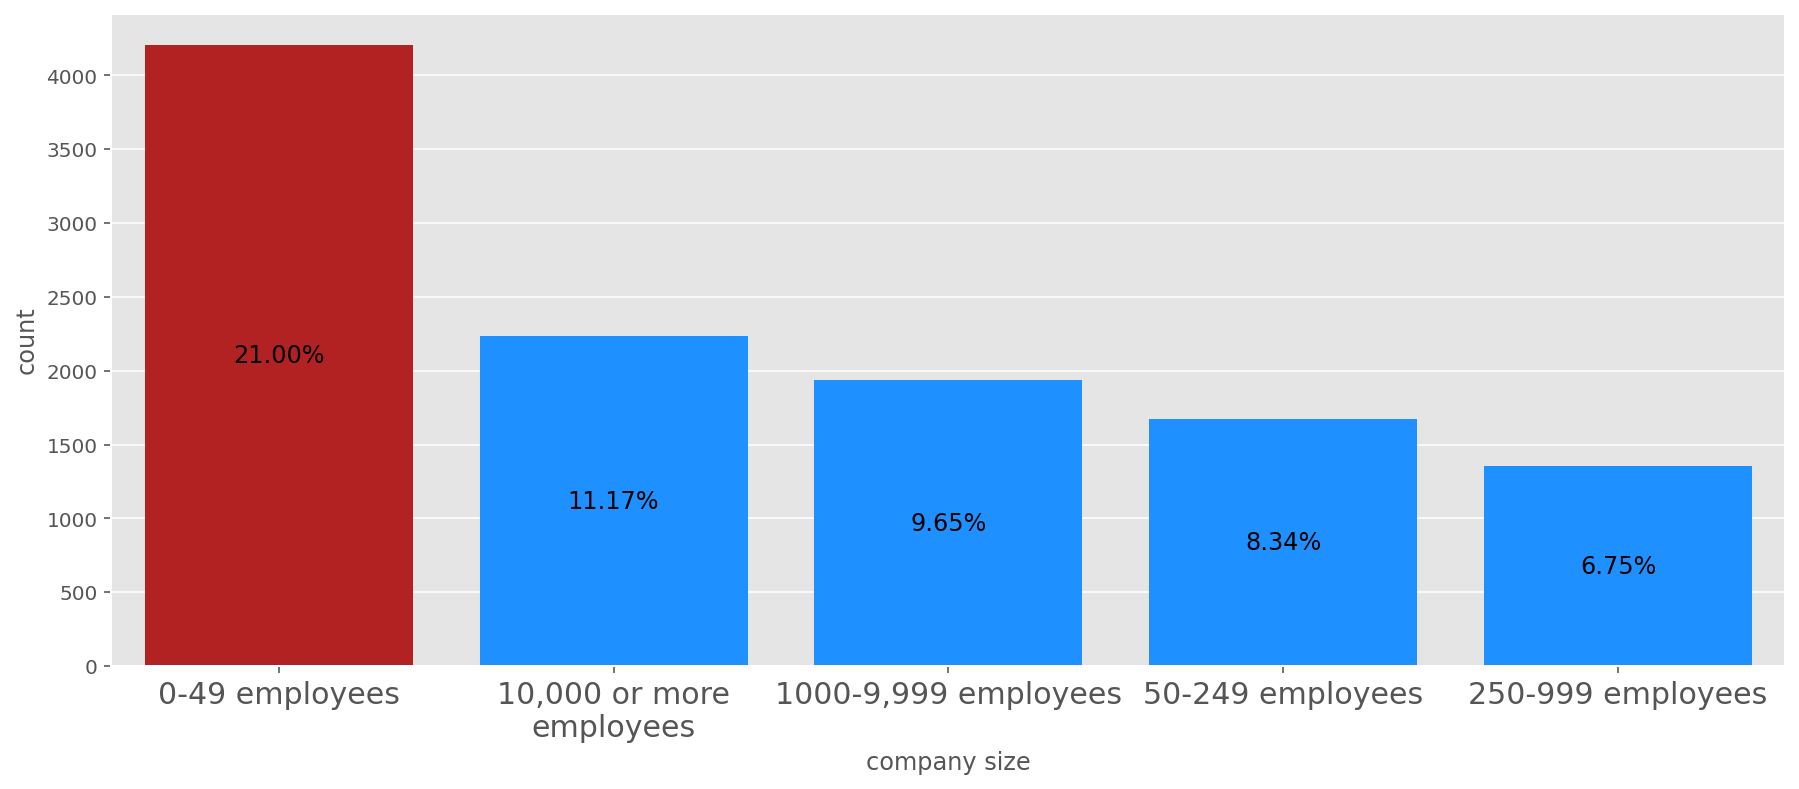

In [55]:
experience = data['Q20'].value_counts()
plt.figure(figsize=(15, 6))
color = ['dodgerblue' if (x < max(experience)) else 'firebrick' for x in experience]
ax= sns.countplot(x="Q20", data=data, order=experience.index, palette=color, saturation=1)
max_width = 20
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.xlabel('company size')
plt.xticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data['Q20'])),
                (x + width/2, y + height/2), ha='center', va='center',fontsize=12)

Kagglers work in companies of all sizes, from small to large enterprise organizations. About 30% work at small companies and more than 20% work at large companies.

<div class=h3>Activities at Work</div>

Text(0, 0.5, 'activities')

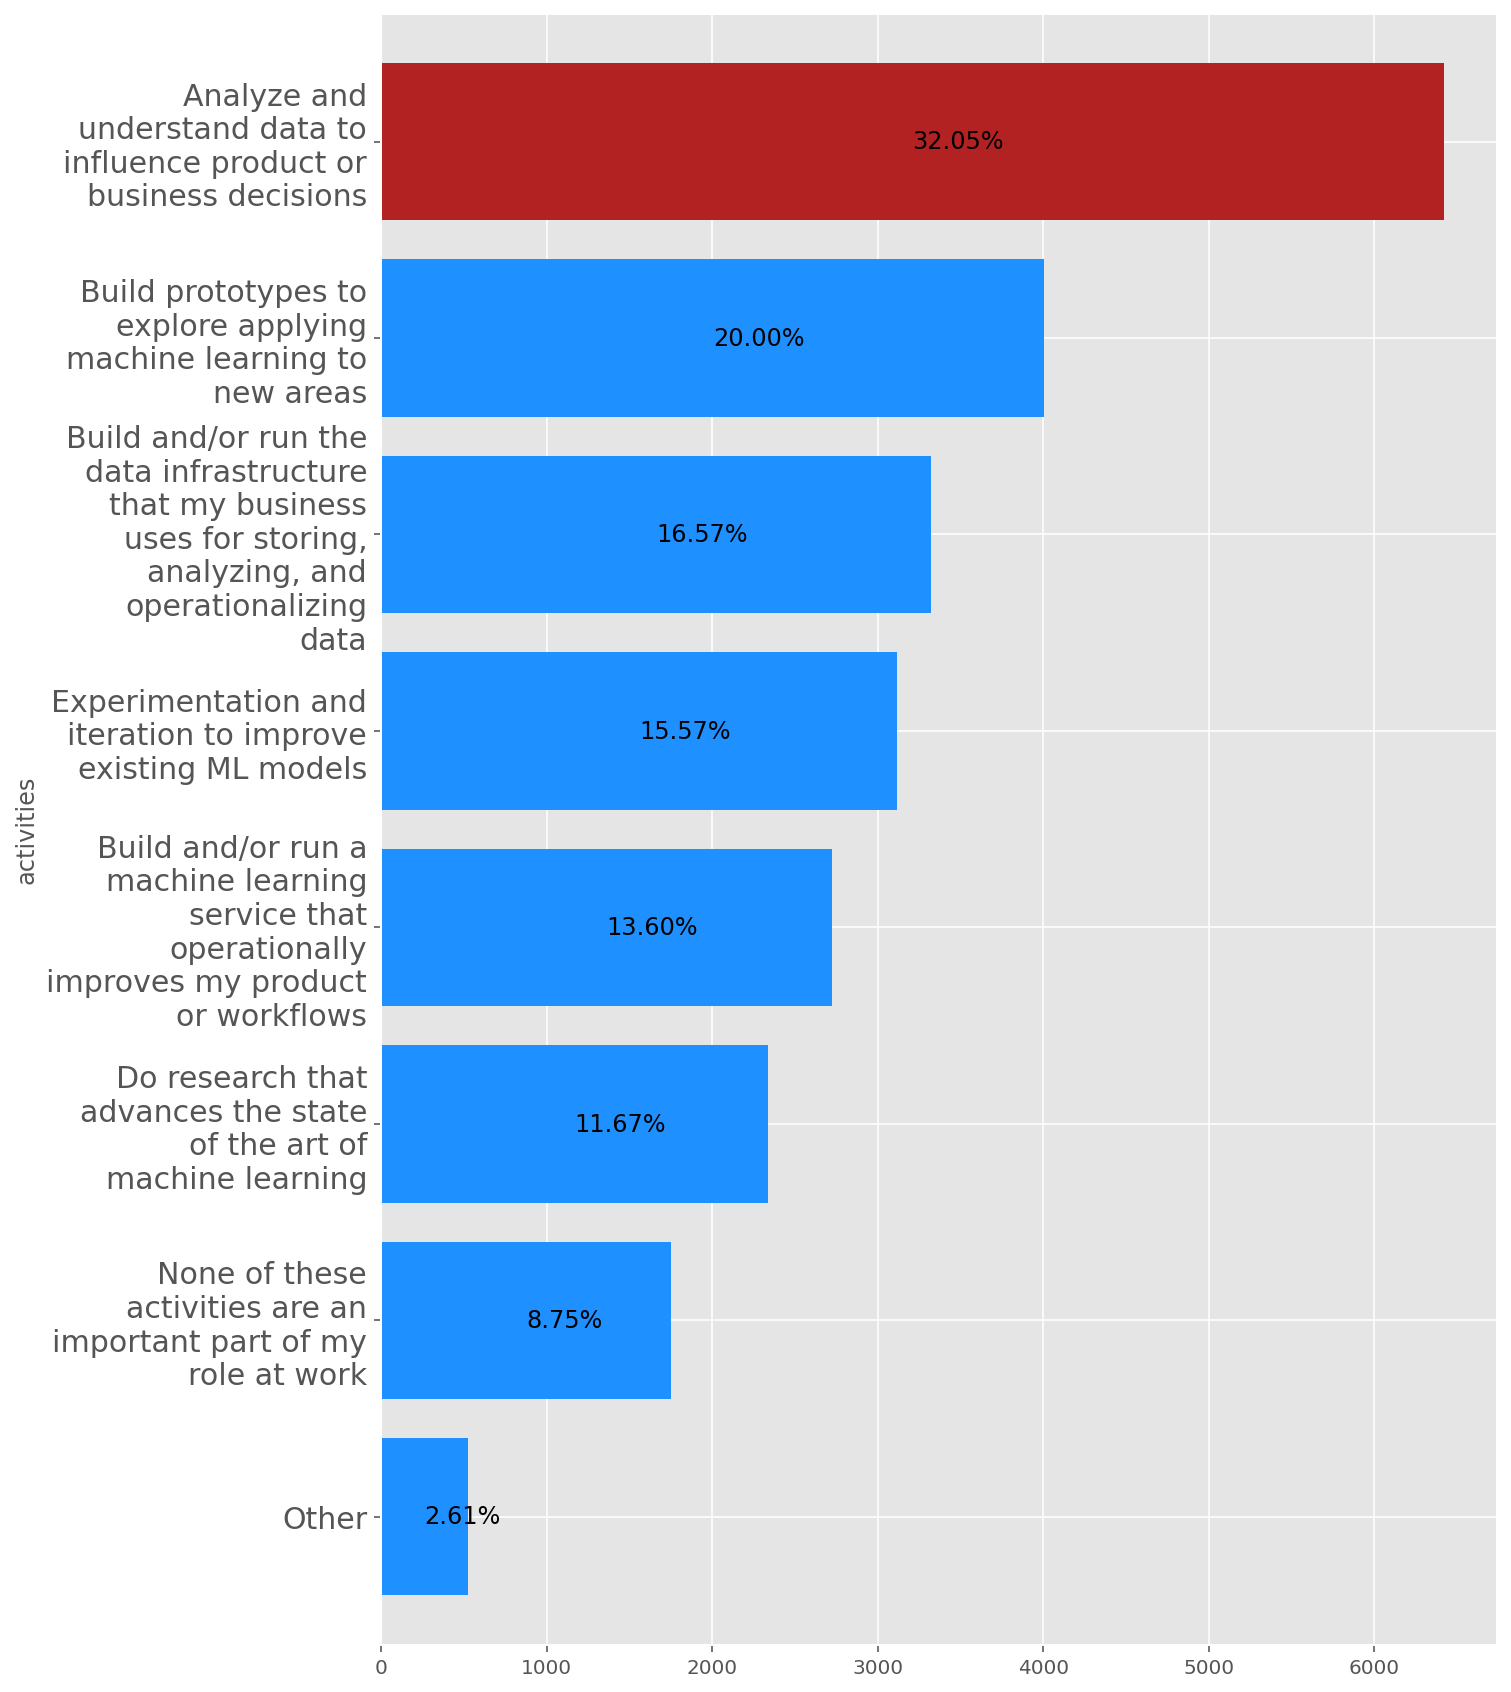

In [56]:
df = data[[i for i in data.columns if 'Q23' in i]]
df_all = pd.Series(dtype='int')
for i in df.columns:
    df_all[df[i].value_counts().index[0]] = df[i].count()
df_all = df_all.sort_values(ascending=True)
color = ['dodgerblue' if (y<max(df_all)) else 'firebrick' for y in df_all]
plt.figure(figsize=(10, 15))
ax = df_all.plot(kind='barh', color=color, alpha=1, width=0.8)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data[[i for i in data.columns if 'Q23' in i]])),
                (x + width/2, y + height/2), ha='left', va='center', fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('activities')

Different types of organizations apply different sets of activities when considering work. Over 30% of respondents analyze and understand data to influence product or business decisions.

<div class=h3>People Responsible for Data Science at Work</div>

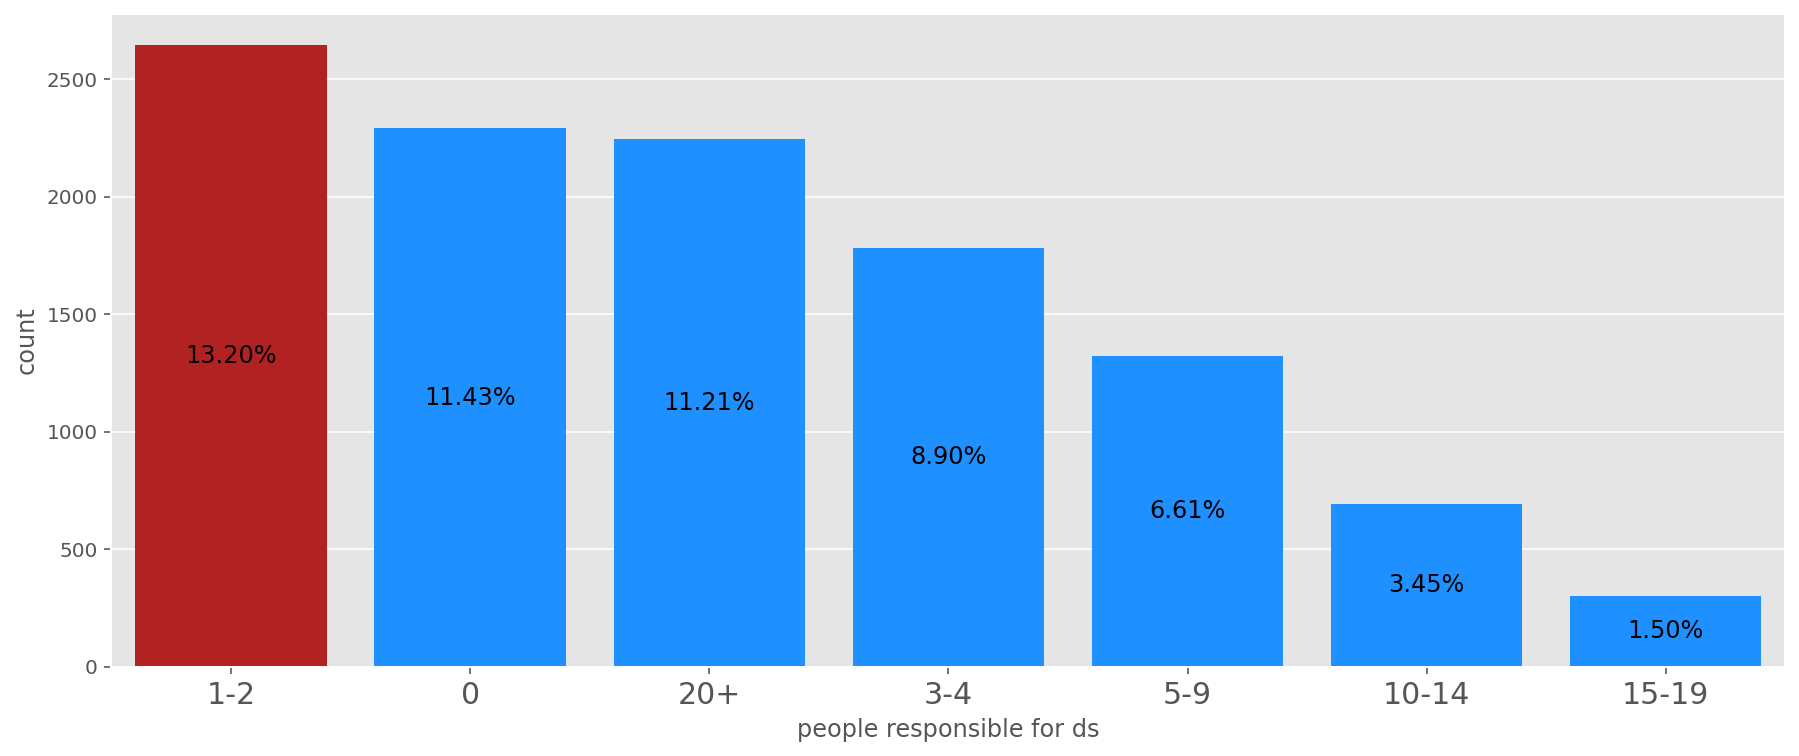

In [57]:
experience = data['Q21'].value_counts()
plt.figure(figsize=(15,6))
color = ['dodgerblue' if (x < max(experience)) else 'firebrick' for x in experience]
ax= sns.countplot(x="Q21", data=data, order=experience.index, palette=color, saturation=1)
plt.xlabel('people responsible for ds')
plt.xticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data['Q21'])),
                (x + width/2, y + height/2), ha='center', va='center',fontsize=12)

Over 40% of respondents say that there are less than 10 people responsible for Data Science at their organization.

<div class=h3>Machine Learning Incorporation at the Company</div>

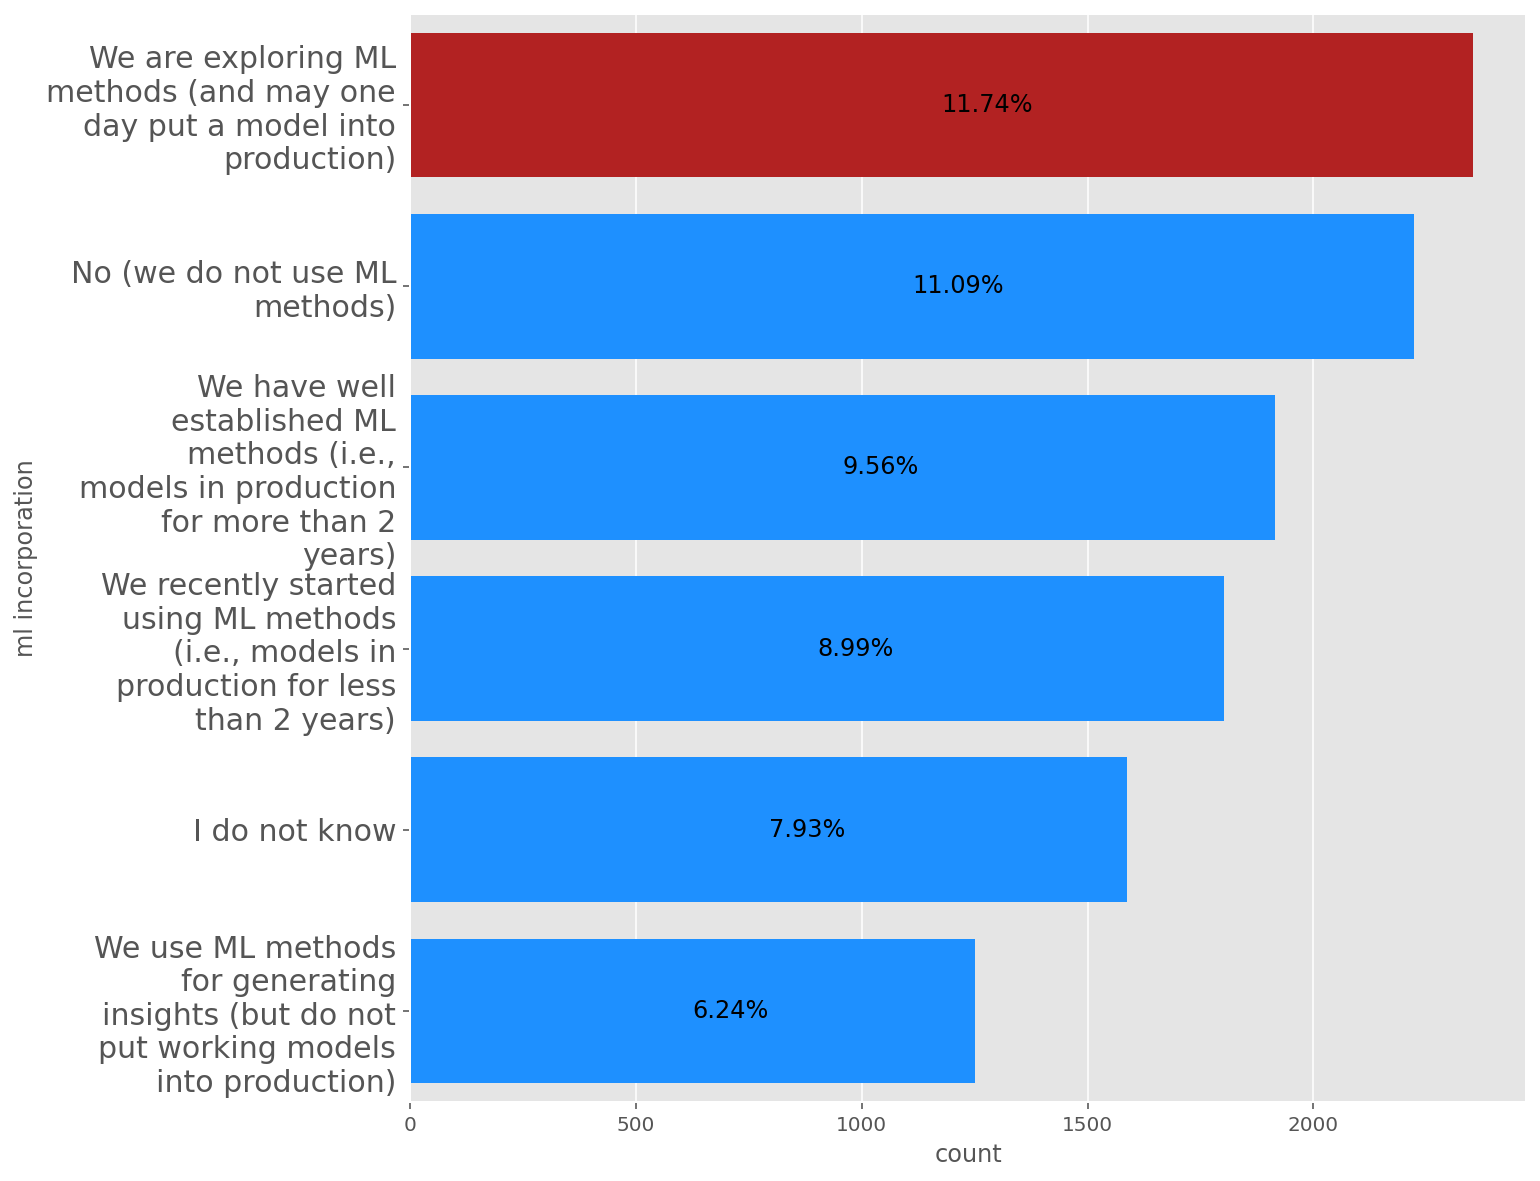

In [58]:
experience = data['Q22'].value_counts()
plt.figure(figsize=(10, 10))
color = ['dodgerblue' if (y < max(experience)) else 'firebrick' for y in experience]
ax= sns.countplot(y="Q22", data=data, order=experience.index, palette=color, saturation=1)
max_width = 20
ax.set_yticklabels(textwrap.fill(y.get_text(), max_width) for y in ax.get_yticklabels())
plt.ylabel('ml incorporation')
plt.yticks(fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_width())*100/len(data['Q22'])),
                (x + width/2, y + height/2), ha='left', va='center',fontsize=12)

Less than 20% of respondents say that their companies are using ML methods (including putting models into production), and over 20% say their companies are not using ML methods.

<div class=h3>Money Spent on Machine Learning</div>

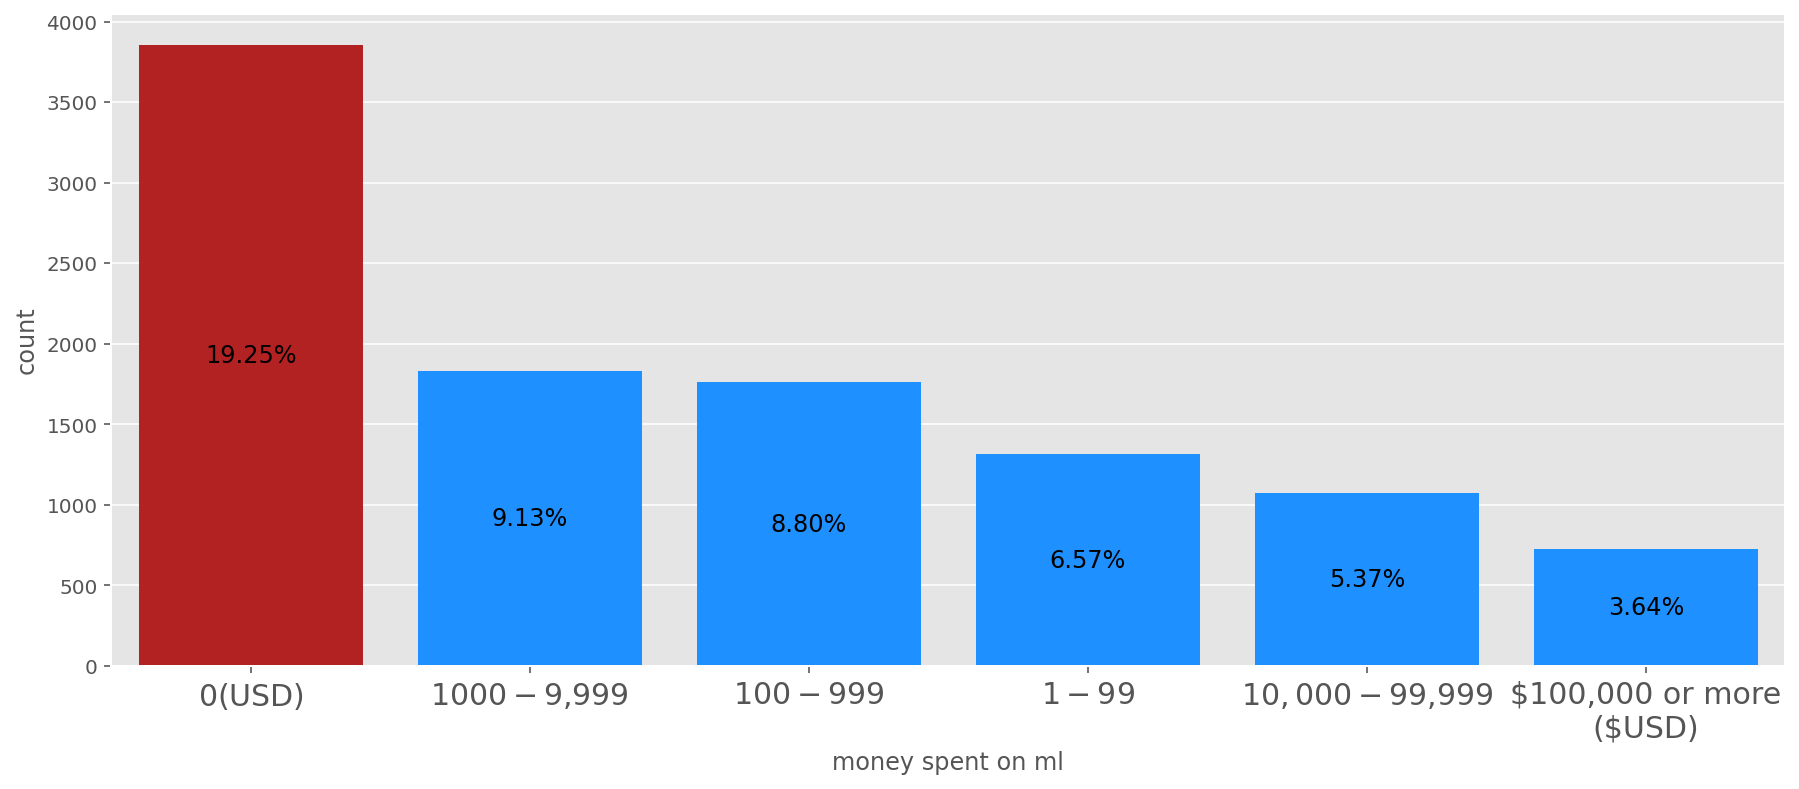

In [59]:
experience = data['Q25'].value_counts()
plt.figure(figsize=(15,6))
color = ['dodgerblue' if (x < max(experience)) else 'firebrick' for x in experience]
ax= sns.countplot(x="Q25", data=data, order=experience.index, palette=color, saturation=1)
max_width = 20
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.xlabel('money spent on ml')
plt.xticks(rotation=0, fontsize=15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.2f}%".format((p.get_height())*100/len(data['Q25'])),
                (x + width/2, y + height/2), ha='center', va='center',fontsize=12)

Most respondents on the survey say their organizations are not spending any money on ML.

# Thanks for reading! ☺